In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [41]:
x_data = np.linspace(0., 10., 1000000)
noise = np.random.randn(len(x_data))

In [42]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [43]:
noise

array([-0.23504169,  2.53442181, -0.02517333, ...,  0.40898184,
       -1.89091578, -0.10283339])

y = mx + b

b = 5

In [44]:
y_true = (0.5 * x_data) + 5 + noise

In [45]:
x_df = pd.DataFrame(data=x_data, columns = ["X Data"])
y_df = pd.DataFrame(data=y_true, columns = ["Y"])

In [46]:
y_df.head()

,Y
0,4.764958
1,7.534427
2,4.974837
3,3.055302
4,5.351040


In [47]:
my_data = pd.concat([x_df, y_df], axis=1)

In [48]:
my_data.head()

,X Data,Y
0,0.00000,4.764958
1,0.00001,7.534427
2,0.00002,4.974837
3,0.00003,3.055302
4,0.00004,5.351040


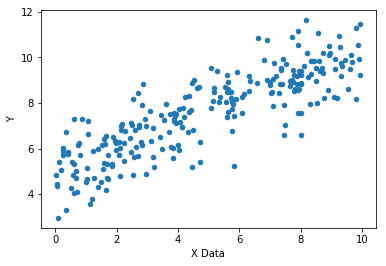

In [49]:
my_data.sample(n=250).plot(kind="scatter", x="X Data", y="Y")

In [50]:
batch_size = 8
m = tf.Variable(0.75)
b = tf.Variable(0.125)

In [51]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [52]:
y_model = m*xph + b

In [53]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [54]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = (0.001))
train = optimizer.minimize(error)

In [55]:
init = tf.global_variables_initializer()

In [56]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

In [57]:
model_m

0.46737799

In [58]:
model_b

4.9775715

In [59]:
y_hat = x_data*model_m + model_b

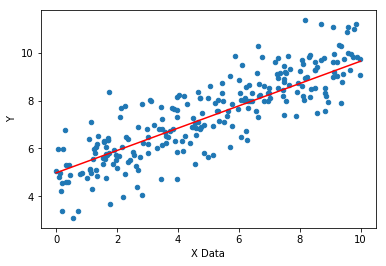

In [60]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(x_data, y_hat, "r")

In [61]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[1])]

In [62]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Juancho\\AppData\\Local\\Temp\\tmptim9e9b7', '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100}


INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Juancho\\AppData\\Local\\Temp\\tmptim9e9b7', '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100}


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [65]:
print(x_train.shape)

(700000,)


In [66]:
x_eval.shape

(300000,)

In [67]:
input_func = tf.estimator.inputs.numpy_input_fn({"x": x_train}, y_train, 
                                                batch_size=8, num_epochs=None, shuffle=True)

In [68]:
train_input_func = tf.estimator.inputs.numpy_input_fn({"x": x_train}, y_train,
                                                     batch_size=8, num_epochs=1000, shuffle=False)

In [69]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({"x": x_eval}, y_eval, 
                                                     batch_size=8, num_epochs=1000, shuffle=False)

In [70]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt.


INFO:tensorflow:loss = 335.082, step = 1


INFO:tensorflow:loss = 335.082, step = 1


INFO:tensorflow:global_step/sec: 656.477


INFO:tensorflow:global_step/sec: 656.477


INFO:tensorflow:loss = 35.562, step = 101 (0.157 sec)


INFO:tensorflow:loss = 35.562, step = 101 (0.157 sec)


INFO:tensorflow:global_step/sec: 685.597


INFO:tensorflow:global_step/sec: 685.597


INFO:tensorflow:loss = 22.4811, step = 201 (0.146 sec)


INFO:tensorflow:loss = 22.4811, step = 201 (0.146 sec)


INFO:tensorflow:global_step/sec: 813.842


INFO:tensorflow:global_step/sec: 813.842


INFO:tensorflow:loss = 10.1101, step = 301 (0.122 sec)


INFO:tensorflow:loss = 10.1101, step = 301 (0.122 sec)


INFO:tensorflow:global_step/sec: 926.879


INFO:tensorflow:global_step/sec: 926.879


INFO:tensorflow:loss = 21.1303, step = 401 (0.108 sec)


INFO:tensorflow:loss = 21.1303, step = 401 (0.108 sec)


INFO:tensorflow:global_step/sec: 1112.64


INFO:tensorflow:global_step/sec: 1112.64


INFO:tensorflow:loss = 10.6765, step = 501 (0.090 sec)


INFO:tensorflow:loss = 10.6765, step = 501 (0.090 sec)


INFO:tensorflow:global_step/sec: 862.953


INFO:tensorflow:global_step/sec: 862.953


INFO:tensorflow:loss = 3.51194, step = 601 (0.117 sec)


INFO:tensorflow:loss = 3.51194, step = 601 (0.117 sec)


INFO:tensorflow:global_step/sec: 862.949


INFO:tensorflow:global_step/sec: 862.949


INFO:tensorflow:loss = 8.96574, step = 701 (0.116 sec)


INFO:tensorflow:loss = 8.96574, step = 701 (0.116 sec)


INFO:tensorflow:global_step/sec: 820.514


INFO:tensorflow:global_step/sec: 820.514


INFO:tensorflow:loss = 14.2289, step = 801 (0.121 sec)


INFO:tensorflow:loss = 14.2289, step = 801 (0.121 sec)


INFO:tensorflow:global_step/sec: 1088.07


INFO:tensorflow:global_step/sec: 1088.07


INFO:tensorflow:loss = 7.21303, step = 901 (0.091 sec)


INFO:tensorflow:loss = 7.21303, step = 901 (0.091 sec)


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt.


INFO:tensorflow:Loss for final step: 4.88347.


INFO:tensorflow:Loss for final step: 4.88347.


In [71]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-20-22:35:50


INFO:tensorflow:Starting evaluation at 2018-07-20-22:35:50


INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt-1000


INFO:tensorflow:Evaluation [1/1000]


INFO:tensorflow:Evaluation [1/1000]


INFO:tensorflow:Evaluation [2/1000]


INFO:tensorflow:Evaluation [2/1000]


INFO:tensorflow:Evaluation [3/1000]


INFO:tensorflow:Evaluation [3/1000]


INFO:tensorflow:Evaluation [4/1000]


INFO:tensorflow:Evaluation [4/1000]


INFO:tensorflow:Evaluation [5/1000]


INFO:tensorflow:Evaluation [5/1000]


INFO:tensorflow:Evaluation [6/1000]


INFO:tensorflow:Evaluation [6/1000]


INFO:tensorflow:Evaluation [7/1000]


INFO:tensorflow:Evaluation [7/1000]


INFO:tensorflow:Evaluation [8/1000]


INFO:tensorflow:Evaluation [8/1000]


INFO:tensorflow:Evaluation [9/1000]


INFO:tensorflow:Evaluation [9/1000]


INFO:tensorflow:Evaluation [10/1000]


INFO:tensorflow:Evaluation [10/1000]


INFO:tensorflow:Evaluation [11/1000]


INFO:tensorflow:Evaluation [11/1000]


INFO:tensorflow:Evaluation [12/1000]


INFO:tensorflow:Evaluation [12/1000]


INFO:tensorflow:Evaluation [13/1000]


INFO:tensorflow:Evaluation [13/1000]


INFO:tensorflow:Evaluation [14/1000]


INFO:tensorflow:Evaluation [14/1000]


INFO:tensorflow:Evaluation [15/1000]


INFO:tensorflow:Evaluation [15/1000]


INFO:tensorflow:Evaluation [16/1000]


INFO:tensorflow:Evaluation [16/1000]


INFO:tensorflow:Evaluation [17/1000]


INFO:tensorflow:Evaluation [17/1000]


INFO:tensorflow:Evaluation [18/1000]


INFO:tensorflow:Evaluation [18/1000]


INFO:tensorflow:Evaluation [19/1000]


INFO:tensorflow:Evaluation [19/1000]


INFO:tensorflow:Evaluation [20/1000]


INFO:tensorflow:Evaluation [20/1000]


INFO:tensorflow:Evaluation [21/1000]


INFO:tensorflow:Evaluation [21/1000]


INFO:tensorflow:Evaluation [22/1000]


INFO:tensorflow:Evaluation [22/1000]


INFO:tensorflow:Evaluation [23/1000]


INFO:tensorflow:Evaluation [23/1000]


INFO:tensorflow:Evaluation [24/1000]


INFO:tensorflow:Evaluation [24/1000]


INFO:tensorflow:Evaluation [25/1000]


INFO:tensorflow:Evaluation [25/1000]


INFO:tensorflow:Evaluation [26/1000]


INFO:tensorflow:Evaluation [26/1000]


INFO:tensorflow:Evaluation [27/1000]


INFO:tensorflow:Evaluation [27/1000]


INFO:tensorflow:Evaluation [28/1000]


INFO:tensorflow:Evaluation [28/1000]


INFO:tensorflow:Evaluation [29/1000]


INFO:tensorflow:Evaluation [29/1000]


INFO:tensorflow:Evaluation [30/1000]


INFO:tensorflow:Evaluation [30/1000]


INFO:tensorflow:Evaluation [31/1000]


INFO:tensorflow:Evaluation [31/1000]


INFO:tensorflow:Evaluation [32/1000]


INFO:tensorflow:Evaluation [32/1000]


INFO:tensorflow:Evaluation [33/1000]


INFO:tensorflow:Evaluation [33/1000]


INFO:tensorflow:Evaluation [34/1000]


INFO:tensorflow:Evaluation [34/1000]


INFO:tensorflow:Evaluation [35/1000]


INFO:tensorflow:Evaluation [35/1000]


INFO:tensorflow:Evaluation [36/1000]


INFO:tensorflow:Evaluation [36/1000]


INFO:tensorflow:Evaluation [37/1000]


INFO:tensorflow:Evaluation [37/1000]


INFO:tensorflow:Evaluation [38/1000]


INFO:tensorflow:Evaluation [38/1000]


INFO:tensorflow:Evaluation [39/1000]


INFO:tensorflow:Evaluation [39/1000]


INFO:tensorflow:Evaluation [40/1000]


INFO:tensorflow:Evaluation [40/1000]


INFO:tensorflow:Evaluation [41/1000]


INFO:tensorflow:Evaluation [41/1000]


INFO:tensorflow:Evaluation [42/1000]


INFO:tensorflow:Evaluation [42/1000]


INFO:tensorflow:Evaluation [43/1000]


INFO:tensorflow:Evaluation [43/1000]


INFO:tensorflow:Evaluation [44/1000]


INFO:tensorflow:Evaluation [44/1000]


INFO:tensorflow:Evaluation [45/1000]


INFO:tensorflow:Evaluation [45/1000]


INFO:tensorflow:Evaluation [46/1000]


INFO:tensorflow:Evaluation [46/1000]


INFO:tensorflow:Evaluation [47/1000]


INFO:tensorflow:Evaluation [47/1000]


INFO:tensorflow:Evaluation [48/1000]


INFO:tensorflow:Evaluation [48/1000]


INFO:tensorflow:Evaluation [49/1000]


INFO:tensorflow:Evaluation [49/1000]


INFO:tensorflow:Evaluation [50/1000]


INFO:tensorflow:Evaluation [50/1000]


INFO:tensorflow:Evaluation [51/1000]


INFO:tensorflow:Evaluation [51/1000]


INFO:tensorflow:Evaluation [52/1000]


INFO:tensorflow:Evaluation [52/1000]


INFO:tensorflow:Evaluation [53/1000]


INFO:tensorflow:Evaluation [53/1000]


INFO:tensorflow:Evaluation [54/1000]


INFO:tensorflow:Evaluation [54/1000]


INFO:tensorflow:Evaluation [55/1000]


INFO:tensorflow:Evaluation [55/1000]


INFO:tensorflow:Evaluation [56/1000]


INFO:tensorflow:Evaluation [56/1000]


INFO:tensorflow:Evaluation [57/1000]


INFO:tensorflow:Evaluation [57/1000]


INFO:tensorflow:Evaluation [58/1000]


INFO:tensorflow:Evaluation [58/1000]


INFO:tensorflow:Evaluation [59/1000]


INFO:tensorflow:Evaluation [59/1000]


INFO:tensorflow:Evaluation [60/1000]


INFO:tensorflow:Evaluation [60/1000]


INFO:tensorflow:Evaluation [61/1000]


INFO:tensorflow:Evaluation [61/1000]


INFO:tensorflow:Evaluation [62/1000]


INFO:tensorflow:Evaluation [62/1000]


INFO:tensorflow:Evaluation [63/1000]


INFO:tensorflow:Evaluation [63/1000]


INFO:tensorflow:Evaluation [64/1000]


INFO:tensorflow:Evaluation [64/1000]


INFO:tensorflow:Evaluation [65/1000]


INFO:tensorflow:Evaluation [65/1000]


INFO:tensorflow:Evaluation [66/1000]


INFO:tensorflow:Evaluation [66/1000]


INFO:tensorflow:Evaluation [67/1000]


INFO:tensorflow:Evaluation [67/1000]


INFO:tensorflow:Evaluation [68/1000]


INFO:tensorflow:Evaluation [68/1000]


INFO:tensorflow:Evaluation [69/1000]


INFO:tensorflow:Evaluation [69/1000]


INFO:tensorflow:Evaluation [70/1000]


INFO:tensorflow:Evaluation [70/1000]


INFO:tensorflow:Evaluation [71/1000]


INFO:tensorflow:Evaluation [71/1000]


INFO:tensorflow:Evaluation [72/1000]


INFO:tensorflow:Evaluation [72/1000]


INFO:tensorflow:Evaluation [73/1000]


INFO:tensorflow:Evaluation [73/1000]


INFO:tensorflow:Evaluation [74/1000]


INFO:tensorflow:Evaluation [74/1000]


INFO:tensorflow:Evaluation [75/1000]


INFO:tensorflow:Evaluation [75/1000]


INFO:tensorflow:Evaluation [76/1000]


INFO:tensorflow:Evaluation [76/1000]


INFO:tensorflow:Evaluation [77/1000]


INFO:tensorflow:Evaluation [77/1000]


INFO:tensorflow:Evaluation [78/1000]


INFO:tensorflow:Evaluation [78/1000]


INFO:tensorflow:Evaluation [79/1000]


INFO:tensorflow:Evaluation [79/1000]


INFO:tensorflow:Evaluation [80/1000]


INFO:tensorflow:Evaluation [80/1000]


INFO:tensorflow:Evaluation [81/1000]


INFO:tensorflow:Evaluation [81/1000]


INFO:tensorflow:Evaluation [82/1000]


INFO:tensorflow:Evaluation [82/1000]


INFO:tensorflow:Evaluation [83/1000]


INFO:tensorflow:Evaluation [83/1000]


INFO:tensorflow:Evaluation [84/1000]


INFO:tensorflow:Evaluation [84/1000]


INFO:tensorflow:Evaluation [85/1000]


INFO:tensorflow:Evaluation [85/1000]


INFO:tensorflow:Evaluation [86/1000]


INFO:tensorflow:Evaluation [86/1000]


INFO:tensorflow:Evaluation [87/1000]


INFO:tensorflow:Evaluation [87/1000]


INFO:tensorflow:Evaluation [88/1000]


INFO:tensorflow:Evaluation [88/1000]


INFO:tensorflow:Evaluation [89/1000]


INFO:tensorflow:Evaluation [89/1000]


INFO:tensorflow:Evaluation [90/1000]


INFO:tensorflow:Evaluation [90/1000]


INFO:tensorflow:Evaluation [91/1000]


INFO:tensorflow:Evaluation [91/1000]


INFO:tensorflow:Evaluation [92/1000]


INFO:tensorflow:Evaluation [92/1000]


INFO:tensorflow:Evaluation [93/1000]


INFO:tensorflow:Evaluation [93/1000]


INFO:tensorflow:Evaluation [94/1000]


INFO:tensorflow:Evaluation [94/1000]


INFO:tensorflow:Evaluation [95/1000]


INFO:tensorflow:Evaluation [95/1000]


INFO:tensorflow:Evaluation [96/1000]


INFO:tensorflow:Evaluation [96/1000]


INFO:tensorflow:Evaluation [97/1000]


INFO:tensorflow:Evaluation [97/1000]


INFO:tensorflow:Evaluation [98/1000]


INFO:tensorflow:Evaluation [98/1000]


INFO:tensorflow:Evaluation [99/1000]


INFO:tensorflow:Evaluation [99/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [101/1000]


INFO:tensorflow:Evaluation [101/1000]


INFO:tensorflow:Evaluation [102/1000]


INFO:tensorflow:Evaluation [102/1000]


INFO:tensorflow:Evaluation [103/1000]


INFO:tensorflow:Evaluation [103/1000]


INFO:tensorflow:Evaluation [104/1000]


INFO:tensorflow:Evaluation [104/1000]


INFO:tensorflow:Evaluation [105/1000]


INFO:tensorflow:Evaluation [105/1000]


INFO:tensorflow:Evaluation [106/1000]


INFO:tensorflow:Evaluation [106/1000]


INFO:tensorflow:Evaluation [107/1000]


INFO:tensorflow:Evaluation [107/1000]


INFO:tensorflow:Evaluation [108/1000]


INFO:tensorflow:Evaluation [108/1000]


INFO:tensorflow:Evaluation [109/1000]


INFO:tensorflow:Evaluation [109/1000]


INFO:tensorflow:Evaluation [110/1000]


INFO:tensorflow:Evaluation [110/1000]


INFO:tensorflow:Evaluation [111/1000]


INFO:tensorflow:Evaluation [111/1000]


INFO:tensorflow:Evaluation [112/1000]


INFO:tensorflow:Evaluation [112/1000]


INFO:tensorflow:Evaluation [113/1000]


INFO:tensorflow:Evaluation [113/1000]


INFO:tensorflow:Evaluation [114/1000]


INFO:tensorflow:Evaluation [114/1000]


INFO:tensorflow:Evaluation [115/1000]


INFO:tensorflow:Evaluation [115/1000]


INFO:tensorflow:Evaluation [116/1000]


INFO:tensorflow:Evaluation [116/1000]


INFO:tensorflow:Evaluation [117/1000]


INFO:tensorflow:Evaluation [117/1000]


INFO:tensorflow:Evaluation [118/1000]


INFO:tensorflow:Evaluation [118/1000]


INFO:tensorflow:Evaluation [119/1000]


INFO:tensorflow:Evaluation [119/1000]


INFO:tensorflow:Evaluation [120/1000]


INFO:tensorflow:Evaluation [120/1000]


INFO:tensorflow:Evaluation [121/1000]


INFO:tensorflow:Evaluation [121/1000]


INFO:tensorflow:Evaluation [122/1000]


INFO:tensorflow:Evaluation [122/1000]


INFO:tensorflow:Evaluation [123/1000]


INFO:tensorflow:Evaluation [123/1000]


INFO:tensorflow:Evaluation [124/1000]


INFO:tensorflow:Evaluation [124/1000]


INFO:tensorflow:Evaluation [125/1000]


INFO:tensorflow:Evaluation [125/1000]


INFO:tensorflow:Evaluation [126/1000]


INFO:tensorflow:Evaluation [126/1000]


INFO:tensorflow:Evaluation [127/1000]


INFO:tensorflow:Evaluation [127/1000]


INFO:tensorflow:Evaluation [128/1000]


INFO:tensorflow:Evaluation [128/1000]


INFO:tensorflow:Evaluation [129/1000]


INFO:tensorflow:Evaluation [129/1000]


INFO:tensorflow:Evaluation [130/1000]


INFO:tensorflow:Evaluation [130/1000]


INFO:tensorflow:Evaluation [131/1000]


INFO:tensorflow:Evaluation [131/1000]


INFO:tensorflow:Evaluation [132/1000]


INFO:tensorflow:Evaluation [132/1000]


INFO:tensorflow:Evaluation [133/1000]


INFO:tensorflow:Evaluation [133/1000]


INFO:tensorflow:Evaluation [134/1000]


INFO:tensorflow:Evaluation [134/1000]


INFO:tensorflow:Evaluation [135/1000]


INFO:tensorflow:Evaluation [135/1000]


INFO:tensorflow:Evaluation [136/1000]


INFO:tensorflow:Evaluation [136/1000]


INFO:tensorflow:Evaluation [137/1000]


INFO:tensorflow:Evaluation [137/1000]


INFO:tensorflow:Evaluation [138/1000]


INFO:tensorflow:Evaluation [138/1000]


INFO:tensorflow:Evaluation [139/1000]


INFO:tensorflow:Evaluation [139/1000]


INFO:tensorflow:Evaluation [140/1000]


INFO:tensorflow:Evaluation [140/1000]


INFO:tensorflow:Evaluation [141/1000]


INFO:tensorflow:Evaluation [141/1000]


INFO:tensorflow:Evaluation [142/1000]


INFO:tensorflow:Evaluation [142/1000]


INFO:tensorflow:Evaluation [143/1000]


INFO:tensorflow:Evaluation [143/1000]


INFO:tensorflow:Evaluation [144/1000]


INFO:tensorflow:Evaluation [144/1000]


INFO:tensorflow:Evaluation [145/1000]


INFO:tensorflow:Evaluation [145/1000]


INFO:tensorflow:Evaluation [146/1000]


INFO:tensorflow:Evaluation [146/1000]


INFO:tensorflow:Evaluation [147/1000]


INFO:tensorflow:Evaluation [147/1000]


INFO:tensorflow:Evaluation [148/1000]


INFO:tensorflow:Evaluation [148/1000]


INFO:tensorflow:Evaluation [149/1000]


INFO:tensorflow:Evaluation [149/1000]


INFO:tensorflow:Evaluation [150/1000]


INFO:tensorflow:Evaluation [150/1000]


INFO:tensorflow:Evaluation [151/1000]


INFO:tensorflow:Evaluation [151/1000]


INFO:tensorflow:Evaluation [152/1000]


INFO:tensorflow:Evaluation [152/1000]


INFO:tensorflow:Evaluation [153/1000]


INFO:tensorflow:Evaluation [153/1000]


INFO:tensorflow:Evaluation [154/1000]


INFO:tensorflow:Evaluation [154/1000]


INFO:tensorflow:Evaluation [155/1000]


INFO:tensorflow:Evaluation [155/1000]


INFO:tensorflow:Evaluation [156/1000]


INFO:tensorflow:Evaluation [156/1000]


INFO:tensorflow:Evaluation [157/1000]


INFO:tensorflow:Evaluation [157/1000]


INFO:tensorflow:Evaluation [158/1000]


INFO:tensorflow:Evaluation [158/1000]


INFO:tensorflow:Evaluation [159/1000]


INFO:tensorflow:Evaluation [159/1000]


INFO:tensorflow:Evaluation [160/1000]


INFO:tensorflow:Evaluation [160/1000]


INFO:tensorflow:Evaluation [161/1000]


INFO:tensorflow:Evaluation [161/1000]


INFO:tensorflow:Evaluation [162/1000]


INFO:tensorflow:Evaluation [162/1000]


INFO:tensorflow:Evaluation [163/1000]


INFO:tensorflow:Evaluation [163/1000]


INFO:tensorflow:Evaluation [164/1000]


INFO:tensorflow:Evaluation [164/1000]


INFO:tensorflow:Evaluation [165/1000]


INFO:tensorflow:Evaluation [165/1000]


INFO:tensorflow:Evaluation [166/1000]


INFO:tensorflow:Evaluation [166/1000]


INFO:tensorflow:Evaluation [167/1000]


INFO:tensorflow:Evaluation [167/1000]


INFO:tensorflow:Evaluation [168/1000]


INFO:tensorflow:Evaluation [168/1000]


INFO:tensorflow:Evaluation [169/1000]


INFO:tensorflow:Evaluation [169/1000]


INFO:tensorflow:Evaluation [170/1000]


INFO:tensorflow:Evaluation [170/1000]


INFO:tensorflow:Evaluation [171/1000]


INFO:tensorflow:Evaluation [171/1000]


INFO:tensorflow:Evaluation [172/1000]


INFO:tensorflow:Evaluation [172/1000]


INFO:tensorflow:Evaluation [173/1000]


INFO:tensorflow:Evaluation [173/1000]


INFO:tensorflow:Evaluation [174/1000]


INFO:tensorflow:Evaluation [174/1000]


INFO:tensorflow:Evaluation [175/1000]


INFO:tensorflow:Evaluation [175/1000]


INFO:tensorflow:Evaluation [176/1000]


INFO:tensorflow:Evaluation [176/1000]


INFO:tensorflow:Evaluation [177/1000]


INFO:tensorflow:Evaluation [177/1000]


INFO:tensorflow:Evaluation [178/1000]


INFO:tensorflow:Evaluation [178/1000]


INFO:tensorflow:Evaluation [179/1000]


INFO:tensorflow:Evaluation [179/1000]


INFO:tensorflow:Evaluation [180/1000]


INFO:tensorflow:Evaluation [180/1000]


INFO:tensorflow:Evaluation [181/1000]


INFO:tensorflow:Evaluation [181/1000]


INFO:tensorflow:Evaluation [182/1000]


INFO:tensorflow:Evaluation [182/1000]


INFO:tensorflow:Evaluation [183/1000]


INFO:tensorflow:Evaluation [183/1000]


INFO:tensorflow:Evaluation [184/1000]


INFO:tensorflow:Evaluation [184/1000]


INFO:tensorflow:Evaluation [185/1000]


INFO:tensorflow:Evaluation [185/1000]


INFO:tensorflow:Evaluation [186/1000]


INFO:tensorflow:Evaluation [186/1000]


INFO:tensorflow:Evaluation [187/1000]


INFO:tensorflow:Evaluation [187/1000]


INFO:tensorflow:Evaluation [188/1000]


INFO:tensorflow:Evaluation [188/1000]


INFO:tensorflow:Evaluation [189/1000]


INFO:tensorflow:Evaluation [189/1000]


INFO:tensorflow:Evaluation [190/1000]


INFO:tensorflow:Evaluation [190/1000]


INFO:tensorflow:Evaluation [191/1000]


INFO:tensorflow:Evaluation [191/1000]


INFO:tensorflow:Evaluation [192/1000]


INFO:tensorflow:Evaluation [192/1000]


INFO:tensorflow:Evaluation [193/1000]


INFO:tensorflow:Evaluation [193/1000]


INFO:tensorflow:Evaluation [194/1000]


INFO:tensorflow:Evaluation [194/1000]


INFO:tensorflow:Evaluation [195/1000]


INFO:tensorflow:Evaluation [195/1000]


INFO:tensorflow:Evaluation [196/1000]


INFO:tensorflow:Evaluation [196/1000]


INFO:tensorflow:Evaluation [197/1000]


INFO:tensorflow:Evaluation [197/1000]


INFO:tensorflow:Evaluation [198/1000]


INFO:tensorflow:Evaluation [198/1000]


INFO:tensorflow:Evaluation [199/1000]


INFO:tensorflow:Evaluation [199/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [201/1000]


INFO:tensorflow:Evaluation [201/1000]


INFO:tensorflow:Evaluation [202/1000]


INFO:tensorflow:Evaluation [202/1000]


INFO:tensorflow:Evaluation [203/1000]


INFO:tensorflow:Evaluation [203/1000]


INFO:tensorflow:Evaluation [204/1000]


INFO:tensorflow:Evaluation [204/1000]


INFO:tensorflow:Evaluation [205/1000]


INFO:tensorflow:Evaluation [205/1000]


INFO:tensorflow:Evaluation [206/1000]


INFO:tensorflow:Evaluation [206/1000]


INFO:tensorflow:Evaluation [207/1000]


INFO:tensorflow:Evaluation [207/1000]


INFO:tensorflow:Evaluation [208/1000]


INFO:tensorflow:Evaluation [208/1000]


INFO:tensorflow:Evaluation [209/1000]


INFO:tensorflow:Evaluation [209/1000]


INFO:tensorflow:Evaluation [210/1000]


INFO:tensorflow:Evaluation [210/1000]


INFO:tensorflow:Evaluation [211/1000]


INFO:tensorflow:Evaluation [211/1000]


INFO:tensorflow:Evaluation [212/1000]


INFO:tensorflow:Evaluation [212/1000]


INFO:tensorflow:Evaluation [213/1000]


INFO:tensorflow:Evaluation [213/1000]


INFO:tensorflow:Evaluation [214/1000]


INFO:tensorflow:Evaluation [214/1000]


INFO:tensorflow:Evaluation [215/1000]


INFO:tensorflow:Evaluation [215/1000]


INFO:tensorflow:Evaluation [216/1000]


INFO:tensorflow:Evaluation [216/1000]


INFO:tensorflow:Evaluation [217/1000]


INFO:tensorflow:Evaluation [217/1000]


INFO:tensorflow:Evaluation [218/1000]


INFO:tensorflow:Evaluation [218/1000]


INFO:tensorflow:Evaluation [219/1000]


INFO:tensorflow:Evaluation [219/1000]


INFO:tensorflow:Evaluation [220/1000]


INFO:tensorflow:Evaluation [220/1000]


INFO:tensorflow:Evaluation [221/1000]


INFO:tensorflow:Evaluation [221/1000]


INFO:tensorflow:Evaluation [222/1000]


INFO:tensorflow:Evaluation [222/1000]


INFO:tensorflow:Evaluation [223/1000]


INFO:tensorflow:Evaluation [223/1000]


INFO:tensorflow:Evaluation [224/1000]


INFO:tensorflow:Evaluation [224/1000]


INFO:tensorflow:Evaluation [225/1000]


INFO:tensorflow:Evaluation [225/1000]


INFO:tensorflow:Evaluation [226/1000]


INFO:tensorflow:Evaluation [226/1000]


INFO:tensorflow:Evaluation [227/1000]


INFO:tensorflow:Evaluation [227/1000]


INFO:tensorflow:Evaluation [228/1000]


INFO:tensorflow:Evaluation [228/1000]


INFO:tensorflow:Evaluation [229/1000]


INFO:tensorflow:Evaluation [229/1000]


INFO:tensorflow:Evaluation [230/1000]


INFO:tensorflow:Evaluation [230/1000]


INFO:tensorflow:Evaluation [231/1000]


INFO:tensorflow:Evaluation [231/1000]


INFO:tensorflow:Evaluation [232/1000]


INFO:tensorflow:Evaluation [232/1000]


INFO:tensorflow:Evaluation [233/1000]


INFO:tensorflow:Evaluation [233/1000]


INFO:tensorflow:Evaluation [234/1000]


INFO:tensorflow:Evaluation [234/1000]


INFO:tensorflow:Evaluation [235/1000]


INFO:tensorflow:Evaluation [235/1000]


INFO:tensorflow:Evaluation [236/1000]


INFO:tensorflow:Evaluation [236/1000]


INFO:tensorflow:Evaluation [237/1000]


INFO:tensorflow:Evaluation [237/1000]


INFO:tensorflow:Evaluation [238/1000]


INFO:tensorflow:Evaluation [238/1000]


INFO:tensorflow:Evaluation [239/1000]


INFO:tensorflow:Evaluation [239/1000]


INFO:tensorflow:Evaluation [240/1000]


INFO:tensorflow:Evaluation [240/1000]


INFO:tensorflow:Evaluation [241/1000]


INFO:tensorflow:Evaluation [241/1000]


INFO:tensorflow:Evaluation [242/1000]


INFO:tensorflow:Evaluation [242/1000]


INFO:tensorflow:Evaluation [243/1000]


INFO:tensorflow:Evaluation [243/1000]


INFO:tensorflow:Evaluation [244/1000]


INFO:tensorflow:Evaluation [244/1000]


INFO:tensorflow:Evaluation [245/1000]


INFO:tensorflow:Evaluation [245/1000]


INFO:tensorflow:Evaluation [246/1000]


INFO:tensorflow:Evaluation [246/1000]


INFO:tensorflow:Evaluation [247/1000]


INFO:tensorflow:Evaluation [247/1000]


INFO:tensorflow:Evaluation [248/1000]


INFO:tensorflow:Evaluation [248/1000]


INFO:tensorflow:Evaluation [249/1000]


INFO:tensorflow:Evaluation [249/1000]


INFO:tensorflow:Evaluation [250/1000]


INFO:tensorflow:Evaluation [250/1000]


INFO:tensorflow:Evaluation [251/1000]


INFO:tensorflow:Evaluation [251/1000]


INFO:tensorflow:Evaluation [252/1000]


INFO:tensorflow:Evaluation [252/1000]


INFO:tensorflow:Evaluation [253/1000]


INFO:tensorflow:Evaluation [253/1000]


INFO:tensorflow:Evaluation [254/1000]


INFO:tensorflow:Evaluation [254/1000]


INFO:tensorflow:Evaluation [255/1000]


INFO:tensorflow:Evaluation [255/1000]


INFO:tensorflow:Evaluation [256/1000]


INFO:tensorflow:Evaluation [256/1000]


INFO:tensorflow:Evaluation [257/1000]


INFO:tensorflow:Evaluation [257/1000]


INFO:tensorflow:Evaluation [258/1000]


INFO:tensorflow:Evaluation [258/1000]


INFO:tensorflow:Evaluation [259/1000]


INFO:tensorflow:Evaluation [259/1000]


INFO:tensorflow:Evaluation [260/1000]


INFO:tensorflow:Evaluation [260/1000]


INFO:tensorflow:Evaluation [261/1000]


INFO:tensorflow:Evaluation [261/1000]


INFO:tensorflow:Evaluation [262/1000]


INFO:tensorflow:Evaluation [262/1000]


INFO:tensorflow:Evaluation [263/1000]


INFO:tensorflow:Evaluation [263/1000]


INFO:tensorflow:Evaluation [264/1000]


INFO:tensorflow:Evaluation [264/1000]


INFO:tensorflow:Evaluation [265/1000]


INFO:tensorflow:Evaluation [265/1000]


INFO:tensorflow:Evaluation [266/1000]


INFO:tensorflow:Evaluation [266/1000]


INFO:tensorflow:Evaluation [267/1000]


INFO:tensorflow:Evaluation [267/1000]


INFO:tensorflow:Evaluation [268/1000]


INFO:tensorflow:Evaluation [268/1000]


INFO:tensorflow:Evaluation [269/1000]


INFO:tensorflow:Evaluation [269/1000]


INFO:tensorflow:Evaluation [270/1000]


INFO:tensorflow:Evaluation [270/1000]


INFO:tensorflow:Evaluation [271/1000]


INFO:tensorflow:Evaluation [271/1000]


INFO:tensorflow:Evaluation [272/1000]


INFO:tensorflow:Evaluation [272/1000]


INFO:tensorflow:Evaluation [273/1000]


INFO:tensorflow:Evaluation [273/1000]


INFO:tensorflow:Evaluation [274/1000]


INFO:tensorflow:Evaluation [274/1000]


INFO:tensorflow:Evaluation [275/1000]


INFO:tensorflow:Evaluation [275/1000]


INFO:tensorflow:Evaluation [276/1000]


INFO:tensorflow:Evaluation [276/1000]


INFO:tensorflow:Evaluation [277/1000]


INFO:tensorflow:Evaluation [277/1000]


INFO:tensorflow:Evaluation [278/1000]


INFO:tensorflow:Evaluation [278/1000]


INFO:tensorflow:Evaluation [279/1000]


INFO:tensorflow:Evaluation [279/1000]


INFO:tensorflow:Evaluation [280/1000]


INFO:tensorflow:Evaluation [280/1000]


INFO:tensorflow:Evaluation [281/1000]


INFO:tensorflow:Evaluation [281/1000]


INFO:tensorflow:Evaluation [282/1000]


INFO:tensorflow:Evaluation [282/1000]


INFO:tensorflow:Evaluation [283/1000]


INFO:tensorflow:Evaluation [283/1000]


INFO:tensorflow:Evaluation [284/1000]


INFO:tensorflow:Evaluation [284/1000]


INFO:tensorflow:Evaluation [285/1000]


INFO:tensorflow:Evaluation [285/1000]


INFO:tensorflow:Evaluation [286/1000]


INFO:tensorflow:Evaluation [286/1000]


INFO:tensorflow:Evaluation [287/1000]


INFO:tensorflow:Evaluation [287/1000]


INFO:tensorflow:Evaluation [288/1000]


INFO:tensorflow:Evaluation [288/1000]


INFO:tensorflow:Evaluation [289/1000]


INFO:tensorflow:Evaluation [289/1000]


INFO:tensorflow:Evaluation [290/1000]


INFO:tensorflow:Evaluation [290/1000]


INFO:tensorflow:Evaluation [291/1000]


INFO:tensorflow:Evaluation [291/1000]


INFO:tensorflow:Evaluation [292/1000]


INFO:tensorflow:Evaluation [292/1000]


INFO:tensorflow:Evaluation [293/1000]


INFO:tensorflow:Evaluation [293/1000]


INFO:tensorflow:Evaluation [294/1000]


INFO:tensorflow:Evaluation [294/1000]


INFO:tensorflow:Evaluation [295/1000]


INFO:tensorflow:Evaluation [295/1000]


INFO:tensorflow:Evaluation [296/1000]


INFO:tensorflow:Evaluation [296/1000]


INFO:tensorflow:Evaluation [297/1000]


INFO:tensorflow:Evaluation [297/1000]


INFO:tensorflow:Evaluation [298/1000]


INFO:tensorflow:Evaluation [298/1000]


INFO:tensorflow:Evaluation [299/1000]


INFO:tensorflow:Evaluation [299/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [301/1000]


INFO:tensorflow:Evaluation [301/1000]


INFO:tensorflow:Evaluation [302/1000]


INFO:tensorflow:Evaluation [302/1000]


INFO:tensorflow:Evaluation [303/1000]


INFO:tensorflow:Evaluation [303/1000]


INFO:tensorflow:Evaluation [304/1000]


INFO:tensorflow:Evaluation [304/1000]


INFO:tensorflow:Evaluation [305/1000]


INFO:tensorflow:Evaluation [305/1000]


INFO:tensorflow:Evaluation [306/1000]


INFO:tensorflow:Evaluation [306/1000]


INFO:tensorflow:Evaluation [307/1000]


INFO:tensorflow:Evaluation [307/1000]


INFO:tensorflow:Evaluation [308/1000]


INFO:tensorflow:Evaluation [308/1000]


INFO:tensorflow:Evaluation [309/1000]


INFO:tensorflow:Evaluation [309/1000]


INFO:tensorflow:Evaluation [310/1000]


INFO:tensorflow:Evaluation [310/1000]


INFO:tensorflow:Evaluation [311/1000]


INFO:tensorflow:Evaluation [311/1000]


INFO:tensorflow:Evaluation [312/1000]


INFO:tensorflow:Evaluation [312/1000]


INFO:tensorflow:Evaluation [313/1000]


INFO:tensorflow:Evaluation [313/1000]


INFO:tensorflow:Evaluation [314/1000]


INFO:tensorflow:Evaluation [314/1000]


INFO:tensorflow:Evaluation [315/1000]


INFO:tensorflow:Evaluation [315/1000]


INFO:tensorflow:Evaluation [316/1000]


INFO:tensorflow:Evaluation [316/1000]


INFO:tensorflow:Evaluation [317/1000]


INFO:tensorflow:Evaluation [317/1000]


INFO:tensorflow:Evaluation [318/1000]


INFO:tensorflow:Evaluation [318/1000]


INFO:tensorflow:Evaluation [319/1000]


INFO:tensorflow:Evaluation [319/1000]


INFO:tensorflow:Evaluation [320/1000]


INFO:tensorflow:Evaluation [320/1000]


INFO:tensorflow:Evaluation [321/1000]


INFO:tensorflow:Evaluation [321/1000]


INFO:tensorflow:Evaluation [322/1000]


INFO:tensorflow:Evaluation [322/1000]


INFO:tensorflow:Evaluation [323/1000]


INFO:tensorflow:Evaluation [323/1000]


INFO:tensorflow:Evaluation [324/1000]


INFO:tensorflow:Evaluation [324/1000]


INFO:tensorflow:Evaluation [325/1000]


INFO:tensorflow:Evaluation [325/1000]


INFO:tensorflow:Evaluation [326/1000]


INFO:tensorflow:Evaluation [326/1000]


INFO:tensorflow:Evaluation [327/1000]


INFO:tensorflow:Evaluation [327/1000]


INFO:tensorflow:Evaluation [328/1000]


INFO:tensorflow:Evaluation [328/1000]


INFO:tensorflow:Evaluation [329/1000]


INFO:tensorflow:Evaluation [329/1000]


INFO:tensorflow:Evaluation [330/1000]


INFO:tensorflow:Evaluation [330/1000]


INFO:tensorflow:Evaluation [331/1000]


INFO:tensorflow:Evaluation [331/1000]


INFO:tensorflow:Evaluation [332/1000]


INFO:tensorflow:Evaluation [332/1000]


INFO:tensorflow:Evaluation [333/1000]


INFO:tensorflow:Evaluation [333/1000]


INFO:tensorflow:Evaluation [334/1000]


INFO:tensorflow:Evaluation [334/1000]


INFO:tensorflow:Evaluation [335/1000]


INFO:tensorflow:Evaluation [335/1000]


INFO:tensorflow:Evaluation [336/1000]


INFO:tensorflow:Evaluation [336/1000]


INFO:tensorflow:Evaluation [337/1000]


INFO:tensorflow:Evaluation [337/1000]


INFO:tensorflow:Evaluation [338/1000]


INFO:tensorflow:Evaluation [338/1000]


INFO:tensorflow:Evaluation [339/1000]


INFO:tensorflow:Evaluation [339/1000]


INFO:tensorflow:Evaluation [340/1000]


INFO:tensorflow:Evaluation [340/1000]


INFO:tensorflow:Evaluation [341/1000]


INFO:tensorflow:Evaluation [341/1000]


INFO:tensorflow:Evaluation [342/1000]


INFO:tensorflow:Evaluation [342/1000]


INFO:tensorflow:Evaluation [343/1000]


INFO:tensorflow:Evaluation [343/1000]


INFO:tensorflow:Evaluation [344/1000]


INFO:tensorflow:Evaluation [344/1000]


INFO:tensorflow:Evaluation [345/1000]


INFO:tensorflow:Evaluation [345/1000]


INFO:tensorflow:Evaluation [346/1000]


INFO:tensorflow:Evaluation [346/1000]


INFO:tensorflow:Evaluation [347/1000]


INFO:tensorflow:Evaluation [347/1000]


INFO:tensorflow:Evaluation [348/1000]


INFO:tensorflow:Evaluation [348/1000]


INFO:tensorflow:Evaluation [349/1000]


INFO:tensorflow:Evaluation [349/1000]


INFO:tensorflow:Evaluation [350/1000]


INFO:tensorflow:Evaluation [350/1000]


INFO:tensorflow:Evaluation [351/1000]


INFO:tensorflow:Evaluation [351/1000]


INFO:tensorflow:Evaluation [352/1000]


INFO:tensorflow:Evaluation [352/1000]


INFO:tensorflow:Evaluation [353/1000]


INFO:tensorflow:Evaluation [353/1000]


INFO:tensorflow:Evaluation [354/1000]


INFO:tensorflow:Evaluation [354/1000]


INFO:tensorflow:Evaluation [355/1000]


INFO:tensorflow:Evaluation [355/1000]


INFO:tensorflow:Evaluation [356/1000]


INFO:tensorflow:Evaluation [356/1000]


INFO:tensorflow:Evaluation [357/1000]


INFO:tensorflow:Evaluation [357/1000]


INFO:tensorflow:Evaluation [358/1000]


INFO:tensorflow:Evaluation [358/1000]


INFO:tensorflow:Evaluation [359/1000]


INFO:tensorflow:Evaluation [359/1000]


INFO:tensorflow:Evaluation [360/1000]


INFO:tensorflow:Evaluation [360/1000]


INFO:tensorflow:Evaluation [361/1000]


INFO:tensorflow:Evaluation [361/1000]


INFO:tensorflow:Evaluation [362/1000]


INFO:tensorflow:Evaluation [362/1000]


INFO:tensorflow:Evaluation [363/1000]


INFO:tensorflow:Evaluation [363/1000]


INFO:tensorflow:Evaluation [364/1000]


INFO:tensorflow:Evaluation [364/1000]


INFO:tensorflow:Evaluation [365/1000]


INFO:tensorflow:Evaluation [365/1000]


INFO:tensorflow:Evaluation [366/1000]


INFO:tensorflow:Evaluation [366/1000]


INFO:tensorflow:Evaluation [367/1000]


INFO:tensorflow:Evaluation [367/1000]


INFO:tensorflow:Evaluation [368/1000]


INFO:tensorflow:Evaluation [368/1000]


INFO:tensorflow:Evaluation [369/1000]


INFO:tensorflow:Evaluation [369/1000]


INFO:tensorflow:Evaluation [370/1000]


INFO:tensorflow:Evaluation [370/1000]


INFO:tensorflow:Evaluation [371/1000]


INFO:tensorflow:Evaluation [371/1000]


INFO:tensorflow:Evaluation [372/1000]


INFO:tensorflow:Evaluation [372/1000]


INFO:tensorflow:Evaluation [373/1000]


INFO:tensorflow:Evaluation [373/1000]


INFO:tensorflow:Evaluation [374/1000]


INFO:tensorflow:Evaluation [374/1000]


INFO:tensorflow:Evaluation [375/1000]


INFO:tensorflow:Evaluation [375/1000]


INFO:tensorflow:Evaluation [376/1000]


INFO:tensorflow:Evaluation [376/1000]


INFO:tensorflow:Evaluation [377/1000]


INFO:tensorflow:Evaluation [377/1000]


INFO:tensorflow:Evaluation [378/1000]


INFO:tensorflow:Evaluation [378/1000]


INFO:tensorflow:Evaluation [379/1000]


INFO:tensorflow:Evaluation [379/1000]


INFO:tensorflow:Evaluation [380/1000]


INFO:tensorflow:Evaluation [380/1000]


INFO:tensorflow:Evaluation [381/1000]


INFO:tensorflow:Evaluation [381/1000]


INFO:tensorflow:Evaluation [382/1000]


INFO:tensorflow:Evaluation [382/1000]


INFO:tensorflow:Evaluation [383/1000]


INFO:tensorflow:Evaluation [383/1000]


INFO:tensorflow:Evaluation [384/1000]


INFO:tensorflow:Evaluation [384/1000]


INFO:tensorflow:Evaluation [385/1000]


INFO:tensorflow:Evaluation [385/1000]


INFO:tensorflow:Evaluation [386/1000]


INFO:tensorflow:Evaluation [386/1000]


INFO:tensorflow:Evaluation [387/1000]


INFO:tensorflow:Evaluation [387/1000]


INFO:tensorflow:Evaluation [388/1000]


INFO:tensorflow:Evaluation [388/1000]


INFO:tensorflow:Evaluation [389/1000]


INFO:tensorflow:Evaluation [389/1000]


INFO:tensorflow:Evaluation [390/1000]


INFO:tensorflow:Evaluation [390/1000]


INFO:tensorflow:Evaluation [391/1000]


INFO:tensorflow:Evaluation [391/1000]


INFO:tensorflow:Evaluation [392/1000]


INFO:tensorflow:Evaluation [392/1000]


INFO:tensorflow:Evaluation [393/1000]


INFO:tensorflow:Evaluation [393/1000]


INFO:tensorflow:Evaluation [394/1000]


INFO:tensorflow:Evaluation [394/1000]


INFO:tensorflow:Evaluation [395/1000]


INFO:tensorflow:Evaluation [395/1000]


INFO:tensorflow:Evaluation [396/1000]


INFO:tensorflow:Evaluation [396/1000]


INFO:tensorflow:Evaluation [397/1000]


INFO:tensorflow:Evaluation [397/1000]


INFO:tensorflow:Evaluation [398/1000]


INFO:tensorflow:Evaluation [398/1000]


INFO:tensorflow:Evaluation [399/1000]


INFO:tensorflow:Evaluation [399/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [401/1000]


INFO:tensorflow:Evaluation [401/1000]


INFO:tensorflow:Evaluation [402/1000]


INFO:tensorflow:Evaluation [402/1000]


INFO:tensorflow:Evaluation [403/1000]


INFO:tensorflow:Evaluation [403/1000]


INFO:tensorflow:Evaluation [404/1000]


INFO:tensorflow:Evaluation [404/1000]


INFO:tensorflow:Evaluation [405/1000]


INFO:tensorflow:Evaluation [405/1000]


INFO:tensorflow:Evaluation [406/1000]


INFO:tensorflow:Evaluation [406/1000]


INFO:tensorflow:Evaluation [407/1000]


INFO:tensorflow:Evaluation [407/1000]


INFO:tensorflow:Evaluation [408/1000]


INFO:tensorflow:Evaluation [408/1000]


INFO:tensorflow:Evaluation [409/1000]


INFO:tensorflow:Evaluation [409/1000]


INFO:tensorflow:Evaluation [410/1000]


INFO:tensorflow:Evaluation [410/1000]


INFO:tensorflow:Evaluation [411/1000]


INFO:tensorflow:Evaluation [411/1000]


INFO:tensorflow:Evaluation [412/1000]


INFO:tensorflow:Evaluation [412/1000]


INFO:tensorflow:Evaluation [413/1000]


INFO:tensorflow:Evaluation [413/1000]


INFO:tensorflow:Evaluation [414/1000]


INFO:tensorflow:Evaluation [414/1000]


INFO:tensorflow:Evaluation [415/1000]


INFO:tensorflow:Evaluation [415/1000]


INFO:tensorflow:Evaluation [416/1000]


INFO:tensorflow:Evaluation [416/1000]


INFO:tensorflow:Evaluation [417/1000]


INFO:tensorflow:Evaluation [417/1000]


INFO:tensorflow:Evaluation [418/1000]


INFO:tensorflow:Evaluation [418/1000]


INFO:tensorflow:Evaluation [419/1000]


INFO:tensorflow:Evaluation [419/1000]


INFO:tensorflow:Evaluation [420/1000]


INFO:tensorflow:Evaluation [420/1000]


INFO:tensorflow:Evaluation [421/1000]


INFO:tensorflow:Evaluation [421/1000]


INFO:tensorflow:Evaluation [422/1000]


INFO:tensorflow:Evaluation [422/1000]


INFO:tensorflow:Evaluation [423/1000]


INFO:tensorflow:Evaluation [423/1000]


INFO:tensorflow:Evaluation [424/1000]


INFO:tensorflow:Evaluation [424/1000]


INFO:tensorflow:Evaluation [425/1000]


INFO:tensorflow:Evaluation [425/1000]


INFO:tensorflow:Evaluation [426/1000]


INFO:tensorflow:Evaluation [426/1000]


INFO:tensorflow:Evaluation [427/1000]


INFO:tensorflow:Evaluation [427/1000]


INFO:tensorflow:Evaluation [428/1000]


INFO:tensorflow:Evaluation [428/1000]


INFO:tensorflow:Evaluation [429/1000]


INFO:tensorflow:Evaluation [429/1000]


INFO:tensorflow:Evaluation [430/1000]


INFO:tensorflow:Evaluation [430/1000]


INFO:tensorflow:Evaluation [431/1000]


INFO:tensorflow:Evaluation [431/1000]


INFO:tensorflow:Evaluation [432/1000]


INFO:tensorflow:Evaluation [432/1000]


INFO:tensorflow:Evaluation [433/1000]


INFO:tensorflow:Evaluation [433/1000]


INFO:tensorflow:Evaluation [434/1000]


INFO:tensorflow:Evaluation [434/1000]


INFO:tensorflow:Evaluation [435/1000]


INFO:tensorflow:Evaluation [435/1000]


INFO:tensorflow:Evaluation [436/1000]


INFO:tensorflow:Evaluation [436/1000]


INFO:tensorflow:Evaluation [437/1000]


INFO:tensorflow:Evaluation [437/1000]


INFO:tensorflow:Evaluation [438/1000]


INFO:tensorflow:Evaluation [438/1000]


INFO:tensorflow:Evaluation [439/1000]


INFO:tensorflow:Evaluation [439/1000]


INFO:tensorflow:Evaluation [440/1000]


INFO:tensorflow:Evaluation [440/1000]


INFO:tensorflow:Evaluation [441/1000]


INFO:tensorflow:Evaluation [441/1000]


INFO:tensorflow:Evaluation [442/1000]


INFO:tensorflow:Evaluation [442/1000]


INFO:tensorflow:Evaluation [443/1000]


INFO:tensorflow:Evaluation [443/1000]


INFO:tensorflow:Evaluation [444/1000]


INFO:tensorflow:Evaluation [444/1000]


INFO:tensorflow:Evaluation [445/1000]


INFO:tensorflow:Evaluation [445/1000]


INFO:tensorflow:Evaluation [446/1000]


INFO:tensorflow:Evaluation [446/1000]


INFO:tensorflow:Evaluation [447/1000]


INFO:tensorflow:Evaluation [447/1000]


INFO:tensorflow:Evaluation [448/1000]


INFO:tensorflow:Evaluation [448/1000]


INFO:tensorflow:Evaluation [449/1000]


INFO:tensorflow:Evaluation [449/1000]


INFO:tensorflow:Evaluation [450/1000]


INFO:tensorflow:Evaluation [450/1000]


INFO:tensorflow:Evaluation [451/1000]


INFO:tensorflow:Evaluation [451/1000]


INFO:tensorflow:Evaluation [452/1000]


INFO:tensorflow:Evaluation [452/1000]


INFO:tensorflow:Evaluation [453/1000]


INFO:tensorflow:Evaluation [453/1000]


INFO:tensorflow:Evaluation [454/1000]


INFO:tensorflow:Evaluation [454/1000]


INFO:tensorflow:Evaluation [455/1000]


INFO:tensorflow:Evaluation [455/1000]


INFO:tensorflow:Evaluation [456/1000]


INFO:tensorflow:Evaluation [456/1000]


INFO:tensorflow:Evaluation [457/1000]


INFO:tensorflow:Evaluation [457/1000]


INFO:tensorflow:Evaluation [458/1000]


INFO:tensorflow:Evaluation [458/1000]


INFO:tensorflow:Evaluation [459/1000]


INFO:tensorflow:Evaluation [459/1000]


INFO:tensorflow:Evaluation [460/1000]


INFO:tensorflow:Evaluation [460/1000]


INFO:tensorflow:Evaluation [461/1000]


INFO:tensorflow:Evaluation [461/1000]


INFO:tensorflow:Evaluation [462/1000]


INFO:tensorflow:Evaluation [462/1000]


INFO:tensorflow:Evaluation [463/1000]


INFO:tensorflow:Evaluation [463/1000]


INFO:tensorflow:Evaluation [464/1000]


INFO:tensorflow:Evaluation [464/1000]


INFO:tensorflow:Evaluation [465/1000]


INFO:tensorflow:Evaluation [465/1000]


INFO:tensorflow:Evaluation [466/1000]


INFO:tensorflow:Evaluation [466/1000]


INFO:tensorflow:Evaluation [467/1000]


INFO:tensorflow:Evaluation [467/1000]


INFO:tensorflow:Evaluation [468/1000]


INFO:tensorflow:Evaluation [468/1000]


INFO:tensorflow:Evaluation [469/1000]


INFO:tensorflow:Evaluation [469/1000]


INFO:tensorflow:Evaluation [470/1000]


INFO:tensorflow:Evaluation [470/1000]


INFO:tensorflow:Evaluation [471/1000]


INFO:tensorflow:Evaluation [471/1000]


INFO:tensorflow:Evaluation [472/1000]


INFO:tensorflow:Evaluation [472/1000]


INFO:tensorflow:Evaluation [473/1000]


INFO:tensorflow:Evaluation [473/1000]


INFO:tensorflow:Evaluation [474/1000]


INFO:tensorflow:Evaluation [474/1000]


INFO:tensorflow:Evaluation [475/1000]


INFO:tensorflow:Evaluation [475/1000]


INFO:tensorflow:Evaluation [476/1000]


INFO:tensorflow:Evaluation [476/1000]


INFO:tensorflow:Evaluation [477/1000]


INFO:tensorflow:Evaluation [477/1000]


INFO:tensorflow:Evaluation [478/1000]


INFO:tensorflow:Evaluation [478/1000]


INFO:tensorflow:Evaluation [479/1000]


INFO:tensorflow:Evaluation [479/1000]


INFO:tensorflow:Evaluation [480/1000]


INFO:tensorflow:Evaluation [480/1000]


INFO:tensorflow:Evaluation [481/1000]


INFO:tensorflow:Evaluation [481/1000]


INFO:tensorflow:Evaluation [482/1000]


INFO:tensorflow:Evaluation [482/1000]


INFO:tensorflow:Evaluation [483/1000]


INFO:tensorflow:Evaluation [483/1000]


INFO:tensorflow:Evaluation [484/1000]


INFO:tensorflow:Evaluation [484/1000]


INFO:tensorflow:Evaluation [485/1000]


INFO:tensorflow:Evaluation [485/1000]


INFO:tensorflow:Evaluation [486/1000]


INFO:tensorflow:Evaluation [486/1000]


INFO:tensorflow:Evaluation [487/1000]


INFO:tensorflow:Evaluation [487/1000]


INFO:tensorflow:Evaluation [488/1000]


INFO:tensorflow:Evaluation [488/1000]


INFO:tensorflow:Evaluation [489/1000]


INFO:tensorflow:Evaluation [489/1000]


INFO:tensorflow:Evaluation [490/1000]


INFO:tensorflow:Evaluation [490/1000]


INFO:tensorflow:Evaluation [491/1000]


INFO:tensorflow:Evaluation [491/1000]


INFO:tensorflow:Evaluation [492/1000]


INFO:tensorflow:Evaluation [492/1000]


INFO:tensorflow:Evaluation [493/1000]


INFO:tensorflow:Evaluation [493/1000]


INFO:tensorflow:Evaluation [494/1000]


INFO:tensorflow:Evaluation [494/1000]


INFO:tensorflow:Evaluation [495/1000]


INFO:tensorflow:Evaluation [495/1000]


INFO:tensorflow:Evaluation [496/1000]


INFO:tensorflow:Evaluation [496/1000]


INFO:tensorflow:Evaluation [497/1000]


INFO:tensorflow:Evaluation [497/1000]


INFO:tensorflow:Evaluation [498/1000]


INFO:tensorflow:Evaluation [498/1000]


INFO:tensorflow:Evaluation [499/1000]


INFO:tensorflow:Evaluation [499/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [501/1000]


INFO:tensorflow:Evaluation [501/1000]


INFO:tensorflow:Evaluation [502/1000]


INFO:tensorflow:Evaluation [502/1000]


INFO:tensorflow:Evaluation [503/1000]


INFO:tensorflow:Evaluation [503/1000]


INFO:tensorflow:Evaluation [504/1000]


INFO:tensorflow:Evaluation [504/1000]


INFO:tensorflow:Evaluation [505/1000]


INFO:tensorflow:Evaluation [505/1000]


INFO:tensorflow:Evaluation [506/1000]


INFO:tensorflow:Evaluation [506/1000]


INFO:tensorflow:Evaluation [507/1000]


INFO:tensorflow:Evaluation [507/1000]


INFO:tensorflow:Evaluation [508/1000]


INFO:tensorflow:Evaluation [508/1000]


INFO:tensorflow:Evaluation [509/1000]


INFO:tensorflow:Evaluation [509/1000]


INFO:tensorflow:Evaluation [510/1000]


INFO:tensorflow:Evaluation [510/1000]


INFO:tensorflow:Evaluation [511/1000]


INFO:tensorflow:Evaluation [511/1000]


INFO:tensorflow:Evaluation [512/1000]


INFO:tensorflow:Evaluation [512/1000]


INFO:tensorflow:Evaluation [513/1000]


INFO:tensorflow:Evaluation [513/1000]


INFO:tensorflow:Evaluation [514/1000]


INFO:tensorflow:Evaluation [514/1000]


INFO:tensorflow:Evaluation [515/1000]


INFO:tensorflow:Evaluation [515/1000]


INFO:tensorflow:Evaluation [516/1000]


INFO:tensorflow:Evaluation [516/1000]


INFO:tensorflow:Evaluation [517/1000]


INFO:tensorflow:Evaluation [517/1000]


INFO:tensorflow:Evaluation [518/1000]


INFO:tensorflow:Evaluation [518/1000]


INFO:tensorflow:Evaluation [519/1000]


INFO:tensorflow:Evaluation [519/1000]


INFO:tensorflow:Evaluation [520/1000]


INFO:tensorflow:Evaluation [520/1000]


INFO:tensorflow:Evaluation [521/1000]


INFO:tensorflow:Evaluation [521/1000]


INFO:tensorflow:Evaluation [522/1000]


INFO:tensorflow:Evaluation [522/1000]


INFO:tensorflow:Evaluation [523/1000]


INFO:tensorflow:Evaluation [523/1000]


INFO:tensorflow:Evaluation [524/1000]


INFO:tensorflow:Evaluation [524/1000]


INFO:tensorflow:Evaluation [525/1000]


INFO:tensorflow:Evaluation [525/1000]


INFO:tensorflow:Evaluation [526/1000]


INFO:tensorflow:Evaluation [526/1000]


INFO:tensorflow:Evaluation [527/1000]


INFO:tensorflow:Evaluation [527/1000]


INFO:tensorflow:Evaluation [528/1000]


INFO:tensorflow:Evaluation [528/1000]


INFO:tensorflow:Evaluation [529/1000]


INFO:tensorflow:Evaluation [529/1000]


INFO:tensorflow:Evaluation [530/1000]


INFO:tensorflow:Evaluation [530/1000]


INFO:tensorflow:Evaluation [531/1000]


INFO:tensorflow:Evaluation [531/1000]


INFO:tensorflow:Evaluation [532/1000]


INFO:tensorflow:Evaluation [532/1000]


INFO:tensorflow:Evaluation [533/1000]


INFO:tensorflow:Evaluation [533/1000]


INFO:tensorflow:Evaluation [534/1000]


INFO:tensorflow:Evaluation [534/1000]


INFO:tensorflow:Evaluation [535/1000]


INFO:tensorflow:Evaluation [535/1000]


INFO:tensorflow:Evaluation [536/1000]


INFO:tensorflow:Evaluation [536/1000]


INFO:tensorflow:Evaluation [537/1000]


INFO:tensorflow:Evaluation [537/1000]


INFO:tensorflow:Evaluation [538/1000]


INFO:tensorflow:Evaluation [538/1000]


INFO:tensorflow:Evaluation [539/1000]


INFO:tensorflow:Evaluation [539/1000]


INFO:tensorflow:Evaluation [540/1000]


INFO:tensorflow:Evaluation [540/1000]


INFO:tensorflow:Evaluation [541/1000]


INFO:tensorflow:Evaluation [541/1000]


INFO:tensorflow:Evaluation [542/1000]


INFO:tensorflow:Evaluation [542/1000]


INFO:tensorflow:Evaluation [543/1000]


INFO:tensorflow:Evaluation [543/1000]


INFO:tensorflow:Evaluation [544/1000]


INFO:tensorflow:Evaluation [544/1000]


INFO:tensorflow:Evaluation [545/1000]


INFO:tensorflow:Evaluation [545/1000]


INFO:tensorflow:Evaluation [546/1000]


INFO:tensorflow:Evaluation [546/1000]


INFO:tensorflow:Evaluation [547/1000]


INFO:tensorflow:Evaluation [547/1000]


INFO:tensorflow:Evaluation [548/1000]


INFO:tensorflow:Evaluation [548/1000]


INFO:tensorflow:Evaluation [549/1000]


INFO:tensorflow:Evaluation [549/1000]


INFO:tensorflow:Evaluation [550/1000]


INFO:tensorflow:Evaluation [550/1000]


INFO:tensorflow:Evaluation [551/1000]


INFO:tensorflow:Evaluation [551/1000]


INFO:tensorflow:Evaluation [552/1000]


INFO:tensorflow:Evaluation [552/1000]


INFO:tensorflow:Evaluation [553/1000]


INFO:tensorflow:Evaluation [553/1000]


INFO:tensorflow:Evaluation [554/1000]


INFO:tensorflow:Evaluation [554/1000]


INFO:tensorflow:Evaluation [555/1000]


INFO:tensorflow:Evaluation [555/1000]


INFO:tensorflow:Evaluation [556/1000]


INFO:tensorflow:Evaluation [556/1000]


INFO:tensorflow:Evaluation [557/1000]


INFO:tensorflow:Evaluation [557/1000]


INFO:tensorflow:Evaluation [558/1000]


INFO:tensorflow:Evaluation [558/1000]


INFO:tensorflow:Evaluation [559/1000]


INFO:tensorflow:Evaluation [559/1000]


INFO:tensorflow:Evaluation [560/1000]


INFO:tensorflow:Evaluation [560/1000]


INFO:tensorflow:Evaluation [561/1000]


INFO:tensorflow:Evaluation [561/1000]


INFO:tensorflow:Evaluation [562/1000]


INFO:tensorflow:Evaluation [562/1000]


INFO:tensorflow:Evaluation [563/1000]


INFO:tensorflow:Evaluation [563/1000]


INFO:tensorflow:Evaluation [564/1000]


INFO:tensorflow:Evaluation [564/1000]


INFO:tensorflow:Evaluation [565/1000]


INFO:tensorflow:Evaluation [565/1000]


INFO:tensorflow:Evaluation [566/1000]


INFO:tensorflow:Evaluation [566/1000]


INFO:tensorflow:Evaluation [567/1000]


INFO:tensorflow:Evaluation [567/1000]


INFO:tensorflow:Evaluation [568/1000]


INFO:tensorflow:Evaluation [568/1000]


INFO:tensorflow:Evaluation [569/1000]


INFO:tensorflow:Evaluation [569/1000]


INFO:tensorflow:Evaluation [570/1000]


INFO:tensorflow:Evaluation [570/1000]


INFO:tensorflow:Evaluation [571/1000]


INFO:tensorflow:Evaluation [571/1000]


INFO:tensorflow:Evaluation [572/1000]


INFO:tensorflow:Evaluation [572/1000]


INFO:tensorflow:Evaluation [573/1000]


INFO:tensorflow:Evaluation [573/1000]


INFO:tensorflow:Evaluation [574/1000]


INFO:tensorflow:Evaluation [574/1000]


INFO:tensorflow:Evaluation [575/1000]


INFO:tensorflow:Evaluation [575/1000]


INFO:tensorflow:Evaluation [576/1000]


INFO:tensorflow:Evaluation [576/1000]


INFO:tensorflow:Evaluation [577/1000]


INFO:tensorflow:Evaluation [577/1000]


INFO:tensorflow:Evaluation [578/1000]


INFO:tensorflow:Evaluation [578/1000]


INFO:tensorflow:Evaluation [579/1000]


INFO:tensorflow:Evaluation [579/1000]


INFO:tensorflow:Evaluation [580/1000]


INFO:tensorflow:Evaluation [580/1000]


INFO:tensorflow:Evaluation [581/1000]


INFO:tensorflow:Evaluation [581/1000]


INFO:tensorflow:Evaluation [582/1000]


INFO:tensorflow:Evaluation [582/1000]


INFO:tensorflow:Evaluation [583/1000]


INFO:tensorflow:Evaluation [583/1000]


INFO:tensorflow:Evaluation [584/1000]


INFO:tensorflow:Evaluation [584/1000]


INFO:tensorflow:Evaluation [585/1000]


INFO:tensorflow:Evaluation [585/1000]


INFO:tensorflow:Evaluation [586/1000]


INFO:tensorflow:Evaluation [586/1000]


INFO:tensorflow:Evaluation [587/1000]


INFO:tensorflow:Evaluation [587/1000]


INFO:tensorflow:Evaluation [588/1000]


INFO:tensorflow:Evaluation [588/1000]


INFO:tensorflow:Evaluation [589/1000]


INFO:tensorflow:Evaluation [589/1000]


INFO:tensorflow:Evaluation [590/1000]


INFO:tensorflow:Evaluation [590/1000]


INFO:tensorflow:Evaluation [591/1000]


INFO:tensorflow:Evaluation [591/1000]


INFO:tensorflow:Evaluation [592/1000]


INFO:tensorflow:Evaluation [592/1000]


INFO:tensorflow:Evaluation [593/1000]


INFO:tensorflow:Evaluation [593/1000]


INFO:tensorflow:Evaluation [594/1000]


INFO:tensorflow:Evaluation [594/1000]


INFO:tensorflow:Evaluation [595/1000]


INFO:tensorflow:Evaluation [595/1000]


INFO:tensorflow:Evaluation [596/1000]


INFO:tensorflow:Evaluation [596/1000]


INFO:tensorflow:Evaluation [597/1000]


INFO:tensorflow:Evaluation [597/1000]


INFO:tensorflow:Evaluation [598/1000]


INFO:tensorflow:Evaluation [598/1000]


INFO:tensorflow:Evaluation [599/1000]


INFO:tensorflow:Evaluation [599/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [601/1000]


INFO:tensorflow:Evaluation [601/1000]


INFO:tensorflow:Evaluation [602/1000]


INFO:tensorflow:Evaluation [602/1000]


INFO:tensorflow:Evaluation [603/1000]


INFO:tensorflow:Evaluation [603/1000]


INFO:tensorflow:Evaluation [604/1000]


INFO:tensorflow:Evaluation [604/1000]


INFO:tensorflow:Evaluation [605/1000]


INFO:tensorflow:Evaluation [605/1000]


INFO:tensorflow:Evaluation [606/1000]


INFO:tensorflow:Evaluation [606/1000]


INFO:tensorflow:Evaluation [607/1000]


INFO:tensorflow:Evaluation [607/1000]


INFO:tensorflow:Evaluation [608/1000]


INFO:tensorflow:Evaluation [608/1000]


INFO:tensorflow:Evaluation [609/1000]


INFO:tensorflow:Evaluation [609/1000]


INFO:tensorflow:Evaluation [610/1000]


INFO:tensorflow:Evaluation [610/1000]


INFO:tensorflow:Evaluation [611/1000]


INFO:tensorflow:Evaluation [611/1000]


INFO:tensorflow:Evaluation [612/1000]


INFO:tensorflow:Evaluation [612/1000]


INFO:tensorflow:Evaluation [613/1000]


INFO:tensorflow:Evaluation [613/1000]


INFO:tensorflow:Evaluation [614/1000]


INFO:tensorflow:Evaluation [614/1000]


INFO:tensorflow:Evaluation [615/1000]


INFO:tensorflow:Evaluation [615/1000]


INFO:tensorflow:Evaluation [616/1000]


INFO:tensorflow:Evaluation [616/1000]


INFO:tensorflow:Evaluation [617/1000]


INFO:tensorflow:Evaluation [617/1000]


INFO:tensorflow:Evaluation [618/1000]


INFO:tensorflow:Evaluation [618/1000]


INFO:tensorflow:Evaluation [619/1000]


INFO:tensorflow:Evaluation [619/1000]


INFO:tensorflow:Evaluation [620/1000]


INFO:tensorflow:Evaluation [620/1000]


INFO:tensorflow:Evaluation [621/1000]


INFO:tensorflow:Evaluation [621/1000]


INFO:tensorflow:Evaluation [622/1000]


INFO:tensorflow:Evaluation [622/1000]


INFO:tensorflow:Evaluation [623/1000]


INFO:tensorflow:Evaluation [623/1000]


INFO:tensorflow:Evaluation [624/1000]


INFO:tensorflow:Evaluation [624/1000]


INFO:tensorflow:Evaluation [625/1000]


INFO:tensorflow:Evaluation [625/1000]


INFO:tensorflow:Evaluation [626/1000]


INFO:tensorflow:Evaluation [626/1000]


INFO:tensorflow:Evaluation [627/1000]


INFO:tensorflow:Evaluation [627/1000]


INFO:tensorflow:Evaluation [628/1000]


INFO:tensorflow:Evaluation [628/1000]


INFO:tensorflow:Evaluation [629/1000]


INFO:tensorflow:Evaluation [629/1000]


INFO:tensorflow:Evaluation [630/1000]


INFO:tensorflow:Evaluation [630/1000]


INFO:tensorflow:Evaluation [631/1000]


INFO:tensorflow:Evaluation [631/1000]


INFO:tensorflow:Evaluation [632/1000]


INFO:tensorflow:Evaluation [632/1000]


INFO:tensorflow:Evaluation [633/1000]


INFO:tensorflow:Evaluation [633/1000]


INFO:tensorflow:Evaluation [634/1000]


INFO:tensorflow:Evaluation [634/1000]


INFO:tensorflow:Evaluation [635/1000]


INFO:tensorflow:Evaluation [635/1000]


INFO:tensorflow:Evaluation [636/1000]


INFO:tensorflow:Evaluation [636/1000]


INFO:tensorflow:Evaluation [637/1000]


INFO:tensorflow:Evaluation [637/1000]


INFO:tensorflow:Evaluation [638/1000]


INFO:tensorflow:Evaluation [638/1000]


INFO:tensorflow:Evaluation [639/1000]


INFO:tensorflow:Evaluation [639/1000]


INFO:tensorflow:Evaluation [640/1000]


INFO:tensorflow:Evaluation [640/1000]


INFO:tensorflow:Evaluation [641/1000]


INFO:tensorflow:Evaluation [641/1000]


INFO:tensorflow:Evaluation [642/1000]


INFO:tensorflow:Evaluation [642/1000]


INFO:tensorflow:Evaluation [643/1000]


INFO:tensorflow:Evaluation [643/1000]


INFO:tensorflow:Evaluation [644/1000]


INFO:tensorflow:Evaluation [644/1000]


INFO:tensorflow:Evaluation [645/1000]


INFO:tensorflow:Evaluation [645/1000]


INFO:tensorflow:Evaluation [646/1000]


INFO:tensorflow:Evaluation [646/1000]


INFO:tensorflow:Evaluation [647/1000]


INFO:tensorflow:Evaluation [647/1000]


INFO:tensorflow:Evaluation [648/1000]


INFO:tensorflow:Evaluation [648/1000]


INFO:tensorflow:Evaluation [649/1000]


INFO:tensorflow:Evaluation [649/1000]


INFO:tensorflow:Evaluation [650/1000]


INFO:tensorflow:Evaluation [650/1000]


INFO:tensorflow:Evaluation [651/1000]


INFO:tensorflow:Evaluation [651/1000]


INFO:tensorflow:Evaluation [652/1000]


INFO:tensorflow:Evaluation [652/1000]


INFO:tensorflow:Evaluation [653/1000]


INFO:tensorflow:Evaluation [653/1000]


INFO:tensorflow:Evaluation [654/1000]


INFO:tensorflow:Evaluation [654/1000]


INFO:tensorflow:Evaluation [655/1000]


INFO:tensorflow:Evaluation [655/1000]


INFO:tensorflow:Evaluation [656/1000]


INFO:tensorflow:Evaluation [656/1000]


INFO:tensorflow:Evaluation [657/1000]


INFO:tensorflow:Evaluation [657/1000]


INFO:tensorflow:Evaluation [658/1000]


INFO:tensorflow:Evaluation [658/1000]


INFO:tensorflow:Evaluation [659/1000]


INFO:tensorflow:Evaluation [659/1000]


INFO:tensorflow:Evaluation [660/1000]


INFO:tensorflow:Evaluation [660/1000]


INFO:tensorflow:Evaluation [661/1000]


INFO:tensorflow:Evaluation [661/1000]


INFO:tensorflow:Evaluation [662/1000]


INFO:tensorflow:Evaluation [662/1000]


INFO:tensorflow:Evaluation [663/1000]


INFO:tensorflow:Evaluation [663/1000]


INFO:tensorflow:Evaluation [664/1000]


INFO:tensorflow:Evaluation [664/1000]


INFO:tensorflow:Evaluation [665/1000]


INFO:tensorflow:Evaluation [665/1000]


INFO:tensorflow:Evaluation [666/1000]


INFO:tensorflow:Evaluation [666/1000]


INFO:tensorflow:Evaluation [667/1000]


INFO:tensorflow:Evaluation [667/1000]


INFO:tensorflow:Evaluation [668/1000]


INFO:tensorflow:Evaluation [668/1000]


INFO:tensorflow:Evaluation [669/1000]


INFO:tensorflow:Evaluation [669/1000]


INFO:tensorflow:Evaluation [670/1000]


INFO:tensorflow:Evaluation [670/1000]


INFO:tensorflow:Evaluation [671/1000]


INFO:tensorflow:Evaluation [671/1000]


INFO:tensorflow:Evaluation [672/1000]


INFO:tensorflow:Evaluation [672/1000]


INFO:tensorflow:Evaluation [673/1000]


INFO:tensorflow:Evaluation [673/1000]


INFO:tensorflow:Evaluation [674/1000]


INFO:tensorflow:Evaluation [674/1000]


INFO:tensorflow:Evaluation [675/1000]


INFO:tensorflow:Evaluation [675/1000]


INFO:tensorflow:Evaluation [676/1000]


INFO:tensorflow:Evaluation [676/1000]


INFO:tensorflow:Evaluation [677/1000]


INFO:tensorflow:Evaluation [677/1000]


INFO:tensorflow:Evaluation [678/1000]


INFO:tensorflow:Evaluation [678/1000]


INFO:tensorflow:Evaluation [679/1000]


INFO:tensorflow:Evaluation [679/1000]


INFO:tensorflow:Evaluation [680/1000]


INFO:tensorflow:Evaluation [680/1000]


INFO:tensorflow:Evaluation [681/1000]


INFO:tensorflow:Evaluation [681/1000]


INFO:tensorflow:Evaluation [682/1000]


INFO:tensorflow:Evaluation [682/1000]


INFO:tensorflow:Evaluation [683/1000]


INFO:tensorflow:Evaluation [683/1000]


INFO:tensorflow:Evaluation [684/1000]


INFO:tensorflow:Evaluation [684/1000]


INFO:tensorflow:Evaluation [685/1000]


INFO:tensorflow:Evaluation [685/1000]


INFO:tensorflow:Evaluation [686/1000]


INFO:tensorflow:Evaluation [686/1000]


INFO:tensorflow:Evaluation [687/1000]


INFO:tensorflow:Evaluation [687/1000]


INFO:tensorflow:Evaluation [688/1000]


INFO:tensorflow:Evaluation [688/1000]


INFO:tensorflow:Evaluation [689/1000]


INFO:tensorflow:Evaluation [689/1000]


INFO:tensorflow:Evaluation [690/1000]


INFO:tensorflow:Evaluation [690/1000]


INFO:tensorflow:Evaluation [691/1000]


INFO:tensorflow:Evaluation [691/1000]


INFO:tensorflow:Evaluation [692/1000]


INFO:tensorflow:Evaluation [692/1000]


INFO:tensorflow:Evaluation [693/1000]


INFO:tensorflow:Evaluation [693/1000]


INFO:tensorflow:Evaluation [694/1000]


INFO:tensorflow:Evaluation [694/1000]


INFO:tensorflow:Evaluation [695/1000]


INFO:tensorflow:Evaluation [695/1000]


INFO:tensorflow:Evaluation [696/1000]


INFO:tensorflow:Evaluation [696/1000]


INFO:tensorflow:Evaluation [697/1000]


INFO:tensorflow:Evaluation [697/1000]


INFO:tensorflow:Evaluation [698/1000]


INFO:tensorflow:Evaluation [698/1000]


INFO:tensorflow:Evaluation [699/1000]


INFO:tensorflow:Evaluation [699/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [701/1000]


INFO:tensorflow:Evaluation [701/1000]


INFO:tensorflow:Evaluation [702/1000]


INFO:tensorflow:Evaluation [702/1000]


INFO:tensorflow:Evaluation [703/1000]


INFO:tensorflow:Evaluation [703/1000]


INFO:tensorflow:Evaluation [704/1000]


INFO:tensorflow:Evaluation [704/1000]


INFO:tensorflow:Evaluation [705/1000]


INFO:tensorflow:Evaluation [705/1000]


INFO:tensorflow:Evaluation [706/1000]


INFO:tensorflow:Evaluation [706/1000]


INFO:tensorflow:Evaluation [707/1000]


INFO:tensorflow:Evaluation [707/1000]


INFO:tensorflow:Evaluation [708/1000]


INFO:tensorflow:Evaluation [708/1000]


INFO:tensorflow:Evaluation [709/1000]


INFO:tensorflow:Evaluation [709/1000]


INFO:tensorflow:Evaluation [710/1000]


INFO:tensorflow:Evaluation [710/1000]


INFO:tensorflow:Evaluation [711/1000]


INFO:tensorflow:Evaluation [711/1000]


INFO:tensorflow:Evaluation [712/1000]


INFO:tensorflow:Evaluation [712/1000]


INFO:tensorflow:Evaluation [713/1000]


INFO:tensorflow:Evaluation [713/1000]


INFO:tensorflow:Evaluation [714/1000]


INFO:tensorflow:Evaluation [714/1000]


INFO:tensorflow:Evaluation [715/1000]


INFO:tensorflow:Evaluation [715/1000]


INFO:tensorflow:Evaluation [716/1000]


INFO:tensorflow:Evaluation [716/1000]


INFO:tensorflow:Evaluation [717/1000]


INFO:tensorflow:Evaluation [717/1000]


INFO:tensorflow:Evaluation [718/1000]


INFO:tensorflow:Evaluation [718/1000]


INFO:tensorflow:Evaluation [719/1000]


INFO:tensorflow:Evaluation [719/1000]


INFO:tensorflow:Evaluation [720/1000]


INFO:tensorflow:Evaluation [720/1000]


INFO:tensorflow:Evaluation [721/1000]


INFO:tensorflow:Evaluation [721/1000]


INFO:tensorflow:Evaluation [722/1000]


INFO:tensorflow:Evaluation [722/1000]


INFO:tensorflow:Evaluation [723/1000]


INFO:tensorflow:Evaluation [723/1000]


INFO:tensorflow:Evaluation [724/1000]


INFO:tensorflow:Evaluation [724/1000]


INFO:tensorflow:Evaluation [725/1000]


INFO:tensorflow:Evaluation [725/1000]


INFO:tensorflow:Evaluation [726/1000]


INFO:tensorflow:Evaluation [726/1000]


INFO:tensorflow:Evaluation [727/1000]


INFO:tensorflow:Evaluation [727/1000]


INFO:tensorflow:Evaluation [728/1000]


INFO:tensorflow:Evaluation [728/1000]


INFO:tensorflow:Evaluation [729/1000]


INFO:tensorflow:Evaluation [729/1000]


INFO:tensorflow:Evaluation [730/1000]


INFO:tensorflow:Evaluation [730/1000]


INFO:tensorflow:Evaluation [731/1000]


INFO:tensorflow:Evaluation [731/1000]


INFO:tensorflow:Evaluation [732/1000]


INFO:tensorflow:Evaluation [732/1000]


INFO:tensorflow:Evaluation [733/1000]


INFO:tensorflow:Evaluation [733/1000]


INFO:tensorflow:Evaluation [734/1000]


INFO:tensorflow:Evaluation [734/1000]


INFO:tensorflow:Evaluation [735/1000]


INFO:tensorflow:Evaluation [735/1000]


INFO:tensorflow:Evaluation [736/1000]


INFO:tensorflow:Evaluation [736/1000]


INFO:tensorflow:Evaluation [737/1000]


INFO:tensorflow:Evaluation [737/1000]


INFO:tensorflow:Evaluation [738/1000]


INFO:tensorflow:Evaluation [738/1000]


INFO:tensorflow:Evaluation [739/1000]


INFO:tensorflow:Evaluation [739/1000]


INFO:tensorflow:Evaluation [740/1000]


INFO:tensorflow:Evaluation [740/1000]


INFO:tensorflow:Evaluation [741/1000]


INFO:tensorflow:Evaluation [741/1000]


INFO:tensorflow:Evaluation [742/1000]


INFO:tensorflow:Evaluation [742/1000]


INFO:tensorflow:Evaluation [743/1000]


INFO:tensorflow:Evaluation [743/1000]


INFO:tensorflow:Evaluation [744/1000]


INFO:tensorflow:Evaluation [744/1000]


INFO:tensorflow:Evaluation [745/1000]


INFO:tensorflow:Evaluation [745/1000]


INFO:tensorflow:Evaluation [746/1000]


INFO:tensorflow:Evaluation [746/1000]


INFO:tensorflow:Evaluation [747/1000]


INFO:tensorflow:Evaluation [747/1000]


INFO:tensorflow:Evaluation [748/1000]


INFO:tensorflow:Evaluation [748/1000]


INFO:tensorflow:Evaluation [749/1000]


INFO:tensorflow:Evaluation [749/1000]


INFO:tensorflow:Evaluation [750/1000]


INFO:tensorflow:Evaluation [750/1000]


INFO:tensorflow:Evaluation [751/1000]


INFO:tensorflow:Evaluation [751/1000]


INFO:tensorflow:Evaluation [752/1000]


INFO:tensorflow:Evaluation [752/1000]


INFO:tensorflow:Evaluation [753/1000]


INFO:tensorflow:Evaluation [753/1000]


INFO:tensorflow:Evaluation [754/1000]


INFO:tensorflow:Evaluation [754/1000]


INFO:tensorflow:Evaluation [755/1000]


INFO:tensorflow:Evaluation [755/1000]


INFO:tensorflow:Evaluation [756/1000]


INFO:tensorflow:Evaluation [756/1000]


INFO:tensorflow:Evaluation [757/1000]


INFO:tensorflow:Evaluation [757/1000]


INFO:tensorflow:Evaluation [758/1000]


INFO:tensorflow:Evaluation [758/1000]


INFO:tensorflow:Evaluation [759/1000]


INFO:tensorflow:Evaluation [759/1000]


INFO:tensorflow:Evaluation [760/1000]


INFO:tensorflow:Evaluation [760/1000]


INFO:tensorflow:Evaluation [761/1000]


INFO:tensorflow:Evaluation [761/1000]


INFO:tensorflow:Evaluation [762/1000]


INFO:tensorflow:Evaluation [762/1000]


INFO:tensorflow:Evaluation [763/1000]


INFO:tensorflow:Evaluation [763/1000]


INFO:tensorflow:Evaluation [764/1000]


INFO:tensorflow:Evaluation [764/1000]


INFO:tensorflow:Evaluation [765/1000]


INFO:tensorflow:Evaluation [765/1000]


INFO:tensorflow:Evaluation [766/1000]


INFO:tensorflow:Evaluation [766/1000]


INFO:tensorflow:Evaluation [767/1000]


INFO:tensorflow:Evaluation [767/1000]


INFO:tensorflow:Evaluation [768/1000]


INFO:tensorflow:Evaluation [768/1000]


INFO:tensorflow:Evaluation [769/1000]


INFO:tensorflow:Evaluation [769/1000]


INFO:tensorflow:Evaluation [770/1000]


INFO:tensorflow:Evaluation [770/1000]


INFO:tensorflow:Evaluation [771/1000]


INFO:tensorflow:Evaluation [771/1000]


INFO:tensorflow:Evaluation [772/1000]


INFO:tensorflow:Evaluation [772/1000]


INFO:tensorflow:Evaluation [773/1000]


INFO:tensorflow:Evaluation [773/1000]


INFO:tensorflow:Evaluation [774/1000]


INFO:tensorflow:Evaluation [774/1000]


INFO:tensorflow:Evaluation [775/1000]


INFO:tensorflow:Evaluation [775/1000]


INFO:tensorflow:Evaluation [776/1000]


INFO:tensorflow:Evaluation [776/1000]


INFO:tensorflow:Evaluation [777/1000]


INFO:tensorflow:Evaluation [777/1000]


INFO:tensorflow:Evaluation [778/1000]


INFO:tensorflow:Evaluation [778/1000]


INFO:tensorflow:Evaluation [779/1000]


INFO:tensorflow:Evaluation [779/1000]


INFO:tensorflow:Evaluation [780/1000]


INFO:tensorflow:Evaluation [780/1000]


INFO:tensorflow:Evaluation [781/1000]


INFO:tensorflow:Evaluation [781/1000]


INFO:tensorflow:Evaluation [782/1000]


INFO:tensorflow:Evaluation [782/1000]


INFO:tensorflow:Evaluation [783/1000]


INFO:tensorflow:Evaluation [783/1000]


INFO:tensorflow:Evaluation [784/1000]


INFO:tensorflow:Evaluation [784/1000]


INFO:tensorflow:Evaluation [785/1000]


INFO:tensorflow:Evaluation [785/1000]


INFO:tensorflow:Evaluation [786/1000]


INFO:tensorflow:Evaluation [786/1000]


INFO:tensorflow:Evaluation [787/1000]


INFO:tensorflow:Evaluation [787/1000]


INFO:tensorflow:Evaluation [788/1000]


INFO:tensorflow:Evaluation [788/1000]


INFO:tensorflow:Evaluation [789/1000]


INFO:tensorflow:Evaluation [789/1000]


INFO:tensorflow:Evaluation [790/1000]


INFO:tensorflow:Evaluation [790/1000]


INFO:tensorflow:Evaluation [791/1000]


INFO:tensorflow:Evaluation [791/1000]


INFO:tensorflow:Evaluation [792/1000]


INFO:tensorflow:Evaluation [792/1000]


INFO:tensorflow:Evaluation [793/1000]


INFO:tensorflow:Evaluation [793/1000]


INFO:tensorflow:Evaluation [794/1000]


INFO:tensorflow:Evaluation [794/1000]


INFO:tensorflow:Evaluation [795/1000]


INFO:tensorflow:Evaluation [795/1000]


INFO:tensorflow:Evaluation [796/1000]


INFO:tensorflow:Evaluation [796/1000]


INFO:tensorflow:Evaluation [797/1000]


INFO:tensorflow:Evaluation [797/1000]


INFO:tensorflow:Evaluation [798/1000]


INFO:tensorflow:Evaluation [798/1000]


INFO:tensorflow:Evaluation [799/1000]


INFO:tensorflow:Evaluation [799/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [801/1000]


INFO:tensorflow:Evaluation [801/1000]


INFO:tensorflow:Evaluation [802/1000]


INFO:tensorflow:Evaluation [802/1000]


INFO:tensorflow:Evaluation [803/1000]


INFO:tensorflow:Evaluation [803/1000]


INFO:tensorflow:Evaluation [804/1000]


INFO:tensorflow:Evaluation [804/1000]


INFO:tensorflow:Evaluation [805/1000]


INFO:tensorflow:Evaluation [805/1000]


INFO:tensorflow:Evaluation [806/1000]


INFO:tensorflow:Evaluation [806/1000]


INFO:tensorflow:Evaluation [807/1000]


INFO:tensorflow:Evaluation [807/1000]


INFO:tensorflow:Evaluation [808/1000]


INFO:tensorflow:Evaluation [808/1000]


INFO:tensorflow:Evaluation [809/1000]


INFO:tensorflow:Evaluation [809/1000]


INFO:tensorflow:Evaluation [810/1000]


INFO:tensorflow:Evaluation [810/1000]


INFO:tensorflow:Evaluation [811/1000]


INFO:tensorflow:Evaluation [811/1000]


INFO:tensorflow:Evaluation [812/1000]


INFO:tensorflow:Evaluation [812/1000]


INFO:tensorflow:Evaluation [813/1000]


INFO:tensorflow:Evaluation [813/1000]


INFO:tensorflow:Evaluation [814/1000]


INFO:tensorflow:Evaluation [814/1000]


INFO:tensorflow:Evaluation [815/1000]


INFO:tensorflow:Evaluation [815/1000]


INFO:tensorflow:Evaluation [816/1000]


INFO:tensorflow:Evaluation [816/1000]


INFO:tensorflow:Evaluation [817/1000]


INFO:tensorflow:Evaluation [817/1000]


INFO:tensorflow:Evaluation [818/1000]


INFO:tensorflow:Evaluation [818/1000]


INFO:tensorflow:Evaluation [819/1000]


INFO:tensorflow:Evaluation [819/1000]


INFO:tensorflow:Evaluation [820/1000]


INFO:tensorflow:Evaluation [820/1000]


INFO:tensorflow:Evaluation [821/1000]


INFO:tensorflow:Evaluation [821/1000]


INFO:tensorflow:Evaluation [822/1000]


INFO:tensorflow:Evaluation [822/1000]


INFO:tensorflow:Evaluation [823/1000]


INFO:tensorflow:Evaluation [823/1000]


INFO:tensorflow:Evaluation [824/1000]


INFO:tensorflow:Evaluation [824/1000]


INFO:tensorflow:Evaluation [825/1000]


INFO:tensorflow:Evaluation [825/1000]


INFO:tensorflow:Evaluation [826/1000]


INFO:tensorflow:Evaluation [826/1000]


INFO:tensorflow:Evaluation [827/1000]


INFO:tensorflow:Evaluation [827/1000]


INFO:tensorflow:Evaluation [828/1000]


INFO:tensorflow:Evaluation [828/1000]


INFO:tensorflow:Evaluation [829/1000]


INFO:tensorflow:Evaluation [829/1000]


INFO:tensorflow:Evaluation [830/1000]


INFO:tensorflow:Evaluation [830/1000]


INFO:tensorflow:Evaluation [831/1000]


INFO:tensorflow:Evaluation [831/1000]


INFO:tensorflow:Evaluation [832/1000]


INFO:tensorflow:Evaluation [832/1000]


INFO:tensorflow:Evaluation [833/1000]


INFO:tensorflow:Evaluation [833/1000]


INFO:tensorflow:Evaluation [834/1000]


INFO:tensorflow:Evaluation [834/1000]


INFO:tensorflow:Evaluation [835/1000]


INFO:tensorflow:Evaluation [835/1000]


INFO:tensorflow:Evaluation [836/1000]


INFO:tensorflow:Evaluation [836/1000]


INFO:tensorflow:Evaluation [837/1000]


INFO:tensorflow:Evaluation [837/1000]


INFO:tensorflow:Evaluation [838/1000]


INFO:tensorflow:Evaluation [838/1000]


INFO:tensorflow:Evaluation [839/1000]


INFO:tensorflow:Evaluation [839/1000]


INFO:tensorflow:Evaluation [840/1000]


INFO:tensorflow:Evaluation [840/1000]


INFO:tensorflow:Evaluation [841/1000]


INFO:tensorflow:Evaluation [841/1000]


INFO:tensorflow:Evaluation [842/1000]


INFO:tensorflow:Evaluation [842/1000]


INFO:tensorflow:Evaluation [843/1000]


INFO:tensorflow:Evaluation [843/1000]


INFO:tensorflow:Evaluation [844/1000]


INFO:tensorflow:Evaluation [844/1000]


INFO:tensorflow:Evaluation [845/1000]


INFO:tensorflow:Evaluation [845/1000]


INFO:tensorflow:Evaluation [846/1000]


INFO:tensorflow:Evaluation [846/1000]


INFO:tensorflow:Evaluation [847/1000]


INFO:tensorflow:Evaluation [847/1000]


INFO:tensorflow:Evaluation [848/1000]


INFO:tensorflow:Evaluation [848/1000]


INFO:tensorflow:Evaluation [849/1000]


INFO:tensorflow:Evaluation [849/1000]


INFO:tensorflow:Evaluation [850/1000]


INFO:tensorflow:Evaluation [850/1000]


INFO:tensorflow:Evaluation [851/1000]


INFO:tensorflow:Evaluation [851/1000]


INFO:tensorflow:Evaluation [852/1000]


INFO:tensorflow:Evaluation [852/1000]


INFO:tensorflow:Evaluation [853/1000]


INFO:tensorflow:Evaluation [853/1000]


INFO:tensorflow:Evaluation [854/1000]


INFO:tensorflow:Evaluation [854/1000]


INFO:tensorflow:Evaluation [855/1000]


INFO:tensorflow:Evaluation [855/1000]


INFO:tensorflow:Evaluation [856/1000]


INFO:tensorflow:Evaluation [856/1000]


INFO:tensorflow:Evaluation [857/1000]


INFO:tensorflow:Evaluation [857/1000]


INFO:tensorflow:Evaluation [858/1000]


INFO:tensorflow:Evaluation [858/1000]


INFO:tensorflow:Evaluation [859/1000]


INFO:tensorflow:Evaluation [859/1000]


INFO:tensorflow:Evaluation [860/1000]


INFO:tensorflow:Evaluation [860/1000]


INFO:tensorflow:Evaluation [861/1000]


INFO:tensorflow:Evaluation [861/1000]


INFO:tensorflow:Evaluation [862/1000]


INFO:tensorflow:Evaluation [862/1000]


INFO:tensorflow:Evaluation [863/1000]


INFO:tensorflow:Evaluation [863/1000]


INFO:tensorflow:Evaluation [864/1000]


INFO:tensorflow:Evaluation [864/1000]


INFO:tensorflow:Evaluation [865/1000]


INFO:tensorflow:Evaluation [865/1000]


INFO:tensorflow:Evaluation [866/1000]


INFO:tensorflow:Evaluation [866/1000]


INFO:tensorflow:Evaluation [867/1000]


INFO:tensorflow:Evaluation [867/1000]


INFO:tensorflow:Evaluation [868/1000]


INFO:tensorflow:Evaluation [868/1000]


INFO:tensorflow:Evaluation [869/1000]


INFO:tensorflow:Evaluation [869/1000]


INFO:tensorflow:Evaluation [870/1000]


INFO:tensorflow:Evaluation [870/1000]


INFO:tensorflow:Evaluation [871/1000]


INFO:tensorflow:Evaluation [871/1000]


INFO:tensorflow:Evaluation [872/1000]


INFO:tensorflow:Evaluation [872/1000]


INFO:tensorflow:Evaluation [873/1000]


INFO:tensorflow:Evaluation [873/1000]


INFO:tensorflow:Evaluation [874/1000]


INFO:tensorflow:Evaluation [874/1000]


INFO:tensorflow:Evaluation [875/1000]


INFO:tensorflow:Evaluation [875/1000]


INFO:tensorflow:Evaluation [876/1000]


INFO:tensorflow:Evaluation [876/1000]


INFO:tensorflow:Evaluation [877/1000]


INFO:tensorflow:Evaluation [877/1000]


INFO:tensorflow:Evaluation [878/1000]


INFO:tensorflow:Evaluation [878/1000]


INFO:tensorflow:Evaluation [879/1000]


INFO:tensorflow:Evaluation [879/1000]


INFO:tensorflow:Evaluation [880/1000]


INFO:tensorflow:Evaluation [880/1000]


INFO:tensorflow:Evaluation [881/1000]


INFO:tensorflow:Evaluation [881/1000]


INFO:tensorflow:Evaluation [882/1000]


INFO:tensorflow:Evaluation [882/1000]


INFO:tensorflow:Evaluation [883/1000]


INFO:tensorflow:Evaluation [883/1000]


INFO:tensorflow:Evaluation [884/1000]


INFO:tensorflow:Evaluation [884/1000]


INFO:tensorflow:Evaluation [885/1000]


INFO:tensorflow:Evaluation [885/1000]


INFO:tensorflow:Evaluation [886/1000]


INFO:tensorflow:Evaluation [886/1000]


INFO:tensorflow:Evaluation [887/1000]


INFO:tensorflow:Evaluation [887/1000]


INFO:tensorflow:Evaluation [888/1000]


INFO:tensorflow:Evaluation [888/1000]


INFO:tensorflow:Evaluation [889/1000]


INFO:tensorflow:Evaluation [889/1000]


INFO:tensorflow:Evaluation [890/1000]


INFO:tensorflow:Evaluation [890/1000]


INFO:tensorflow:Evaluation [891/1000]


INFO:tensorflow:Evaluation [891/1000]


INFO:tensorflow:Evaluation [892/1000]


INFO:tensorflow:Evaluation [892/1000]


INFO:tensorflow:Evaluation [893/1000]


INFO:tensorflow:Evaluation [893/1000]


INFO:tensorflow:Evaluation [894/1000]


INFO:tensorflow:Evaluation [894/1000]


INFO:tensorflow:Evaluation [895/1000]


INFO:tensorflow:Evaluation [895/1000]


INFO:tensorflow:Evaluation [896/1000]


INFO:tensorflow:Evaluation [896/1000]


INFO:tensorflow:Evaluation [897/1000]


INFO:tensorflow:Evaluation [897/1000]


INFO:tensorflow:Evaluation [898/1000]


INFO:tensorflow:Evaluation [898/1000]


INFO:tensorflow:Evaluation [899/1000]


INFO:tensorflow:Evaluation [899/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [901/1000]


INFO:tensorflow:Evaluation [901/1000]


INFO:tensorflow:Evaluation [902/1000]


INFO:tensorflow:Evaluation [902/1000]


INFO:tensorflow:Evaluation [903/1000]


INFO:tensorflow:Evaluation [903/1000]


INFO:tensorflow:Evaluation [904/1000]


INFO:tensorflow:Evaluation [904/1000]


INFO:tensorflow:Evaluation [905/1000]


INFO:tensorflow:Evaluation [905/1000]


INFO:tensorflow:Evaluation [906/1000]


INFO:tensorflow:Evaluation [906/1000]


INFO:tensorflow:Evaluation [907/1000]


INFO:tensorflow:Evaluation [907/1000]


INFO:tensorflow:Evaluation [908/1000]


INFO:tensorflow:Evaluation [908/1000]


INFO:tensorflow:Evaluation [909/1000]


INFO:tensorflow:Evaluation [909/1000]


INFO:tensorflow:Evaluation [910/1000]


INFO:tensorflow:Evaluation [910/1000]


INFO:tensorflow:Evaluation [911/1000]


INFO:tensorflow:Evaluation [911/1000]


INFO:tensorflow:Evaluation [912/1000]


INFO:tensorflow:Evaluation [912/1000]


INFO:tensorflow:Evaluation [913/1000]


INFO:tensorflow:Evaluation [913/1000]


INFO:tensorflow:Evaluation [914/1000]


INFO:tensorflow:Evaluation [914/1000]


INFO:tensorflow:Evaluation [915/1000]


INFO:tensorflow:Evaluation [915/1000]


INFO:tensorflow:Evaluation [916/1000]


INFO:tensorflow:Evaluation [916/1000]


INFO:tensorflow:Evaluation [917/1000]


INFO:tensorflow:Evaluation [917/1000]


INFO:tensorflow:Evaluation [918/1000]


INFO:tensorflow:Evaluation [918/1000]


INFO:tensorflow:Evaluation [919/1000]


INFO:tensorflow:Evaluation [919/1000]


INFO:tensorflow:Evaluation [920/1000]


INFO:tensorflow:Evaluation [920/1000]


INFO:tensorflow:Evaluation [921/1000]


INFO:tensorflow:Evaluation [921/1000]


INFO:tensorflow:Evaluation [922/1000]


INFO:tensorflow:Evaluation [922/1000]


INFO:tensorflow:Evaluation [923/1000]


INFO:tensorflow:Evaluation [923/1000]


INFO:tensorflow:Evaluation [924/1000]


INFO:tensorflow:Evaluation [924/1000]


INFO:tensorflow:Evaluation [925/1000]


INFO:tensorflow:Evaluation [925/1000]


INFO:tensorflow:Evaluation [926/1000]


INFO:tensorflow:Evaluation [926/1000]


INFO:tensorflow:Evaluation [927/1000]


INFO:tensorflow:Evaluation [927/1000]


INFO:tensorflow:Evaluation [928/1000]


INFO:tensorflow:Evaluation [928/1000]


INFO:tensorflow:Evaluation [929/1000]


INFO:tensorflow:Evaluation [929/1000]


INFO:tensorflow:Evaluation [930/1000]


INFO:tensorflow:Evaluation [930/1000]


INFO:tensorflow:Evaluation [931/1000]


INFO:tensorflow:Evaluation [931/1000]


INFO:tensorflow:Evaluation [932/1000]


INFO:tensorflow:Evaluation [932/1000]


INFO:tensorflow:Evaluation [933/1000]


INFO:tensorflow:Evaluation [933/1000]


INFO:tensorflow:Evaluation [934/1000]


INFO:tensorflow:Evaluation [934/1000]


INFO:tensorflow:Evaluation [935/1000]


INFO:tensorflow:Evaluation [935/1000]


INFO:tensorflow:Evaluation [936/1000]


INFO:tensorflow:Evaluation [936/1000]


INFO:tensorflow:Evaluation [937/1000]


INFO:tensorflow:Evaluation [937/1000]


INFO:tensorflow:Evaluation [938/1000]


INFO:tensorflow:Evaluation [938/1000]


INFO:tensorflow:Evaluation [939/1000]


INFO:tensorflow:Evaluation [939/1000]


INFO:tensorflow:Evaluation [940/1000]


INFO:tensorflow:Evaluation [940/1000]


INFO:tensorflow:Evaluation [941/1000]


INFO:tensorflow:Evaluation [941/1000]


INFO:tensorflow:Evaluation [942/1000]


INFO:tensorflow:Evaluation [942/1000]


INFO:tensorflow:Evaluation [943/1000]


INFO:tensorflow:Evaluation [943/1000]


INFO:tensorflow:Evaluation [944/1000]


INFO:tensorflow:Evaluation [944/1000]


INFO:tensorflow:Evaluation [945/1000]


INFO:tensorflow:Evaluation [945/1000]


INFO:tensorflow:Evaluation [946/1000]


INFO:tensorflow:Evaluation [946/1000]


INFO:tensorflow:Evaluation [947/1000]


INFO:tensorflow:Evaluation [947/1000]


INFO:tensorflow:Evaluation [948/1000]


INFO:tensorflow:Evaluation [948/1000]


INFO:tensorflow:Evaluation [949/1000]


INFO:tensorflow:Evaluation [949/1000]


INFO:tensorflow:Evaluation [950/1000]


INFO:tensorflow:Evaluation [950/1000]


INFO:tensorflow:Evaluation [951/1000]


INFO:tensorflow:Evaluation [951/1000]


INFO:tensorflow:Evaluation [952/1000]


INFO:tensorflow:Evaluation [952/1000]


INFO:tensorflow:Evaluation [953/1000]


INFO:tensorflow:Evaluation [953/1000]


INFO:tensorflow:Evaluation [954/1000]


INFO:tensorflow:Evaluation [954/1000]


INFO:tensorflow:Evaluation [955/1000]


INFO:tensorflow:Evaluation [955/1000]


INFO:tensorflow:Evaluation [956/1000]


INFO:tensorflow:Evaluation [956/1000]


INFO:tensorflow:Evaluation [957/1000]


INFO:tensorflow:Evaluation [957/1000]


INFO:tensorflow:Evaluation [958/1000]


INFO:tensorflow:Evaluation [958/1000]


INFO:tensorflow:Evaluation [959/1000]


INFO:tensorflow:Evaluation [959/1000]


INFO:tensorflow:Evaluation [960/1000]


INFO:tensorflow:Evaluation [960/1000]


INFO:tensorflow:Evaluation [961/1000]


INFO:tensorflow:Evaluation [961/1000]


INFO:tensorflow:Evaluation [962/1000]


INFO:tensorflow:Evaluation [962/1000]


INFO:tensorflow:Evaluation [963/1000]


INFO:tensorflow:Evaluation [963/1000]


INFO:tensorflow:Evaluation [964/1000]


INFO:tensorflow:Evaluation [964/1000]


INFO:tensorflow:Evaluation [965/1000]


INFO:tensorflow:Evaluation [965/1000]


INFO:tensorflow:Evaluation [966/1000]


INFO:tensorflow:Evaluation [966/1000]


INFO:tensorflow:Evaluation [967/1000]


INFO:tensorflow:Evaluation [967/1000]


INFO:tensorflow:Evaluation [968/1000]


INFO:tensorflow:Evaluation [968/1000]


INFO:tensorflow:Evaluation [969/1000]


INFO:tensorflow:Evaluation [969/1000]


INFO:tensorflow:Evaluation [970/1000]


INFO:tensorflow:Evaluation [970/1000]


INFO:tensorflow:Evaluation [971/1000]


INFO:tensorflow:Evaluation [971/1000]


INFO:tensorflow:Evaluation [972/1000]


INFO:tensorflow:Evaluation [972/1000]


INFO:tensorflow:Evaluation [973/1000]


INFO:tensorflow:Evaluation [973/1000]


INFO:tensorflow:Evaluation [974/1000]


INFO:tensorflow:Evaluation [974/1000]


INFO:tensorflow:Evaluation [975/1000]


INFO:tensorflow:Evaluation [975/1000]


INFO:tensorflow:Evaluation [976/1000]


INFO:tensorflow:Evaluation [976/1000]


INFO:tensorflow:Evaluation [977/1000]


INFO:tensorflow:Evaluation [977/1000]


INFO:tensorflow:Evaluation [978/1000]


INFO:tensorflow:Evaluation [978/1000]


INFO:tensorflow:Evaluation [979/1000]


INFO:tensorflow:Evaluation [979/1000]


INFO:tensorflow:Evaluation [980/1000]


INFO:tensorflow:Evaluation [980/1000]


INFO:tensorflow:Evaluation [981/1000]


INFO:tensorflow:Evaluation [981/1000]


INFO:tensorflow:Evaluation [982/1000]


INFO:tensorflow:Evaluation [982/1000]


INFO:tensorflow:Evaluation [983/1000]


INFO:tensorflow:Evaluation [983/1000]


INFO:tensorflow:Evaluation [984/1000]


INFO:tensorflow:Evaluation [984/1000]


INFO:tensorflow:Evaluation [985/1000]


INFO:tensorflow:Evaluation [985/1000]


INFO:tensorflow:Evaluation [986/1000]


INFO:tensorflow:Evaluation [986/1000]


INFO:tensorflow:Evaluation [987/1000]


INFO:tensorflow:Evaluation [987/1000]


INFO:tensorflow:Evaluation [988/1000]


INFO:tensorflow:Evaluation [988/1000]


INFO:tensorflow:Evaluation [989/1000]


INFO:tensorflow:Evaluation [989/1000]


INFO:tensorflow:Evaluation [990/1000]


INFO:tensorflow:Evaluation [990/1000]


INFO:tensorflow:Evaluation [991/1000]


INFO:tensorflow:Evaluation [991/1000]


INFO:tensorflow:Evaluation [992/1000]


INFO:tensorflow:Evaluation [992/1000]


INFO:tensorflow:Evaluation [993/1000]


INFO:tensorflow:Evaluation [993/1000]


INFO:tensorflow:Evaluation [994/1000]


INFO:tensorflow:Evaluation [994/1000]


INFO:tensorflow:Evaluation [995/1000]


INFO:tensorflow:Evaluation [995/1000]


INFO:tensorflow:Evaluation [996/1000]


INFO:tensorflow:Evaluation [996/1000]


INFO:tensorflow:Evaluation [997/1000]


INFO:tensorflow:Evaluation [997/1000]


INFO:tensorflow:Evaluation [998/1000]


INFO:tensorflow:Evaluation [998/1000]


INFO:tensorflow:Evaluation [999/1000]


INFO:tensorflow:Evaluation [999/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2018-07-20-22:35:52


INFO:tensorflow:Finished evaluation at 2018-07-20-22:35:52


INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.05051, global_step = 1000, loss = 8.40409


INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.05051, global_step = 1000, loss = 8.40409


In [72]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-20-22:36:39


INFO:tensorflow:Starting evaluation at 2018-07-20-22:36:39


INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt-1000


INFO:tensorflow:Evaluation [1/1000]


INFO:tensorflow:Evaluation [1/1000]


INFO:tensorflow:Evaluation [2/1000]


INFO:tensorflow:Evaluation [2/1000]


INFO:tensorflow:Evaluation [3/1000]


INFO:tensorflow:Evaluation [3/1000]


INFO:tensorflow:Evaluation [4/1000]


INFO:tensorflow:Evaluation [4/1000]


INFO:tensorflow:Evaluation [5/1000]


INFO:tensorflow:Evaluation [5/1000]


INFO:tensorflow:Evaluation [6/1000]


INFO:tensorflow:Evaluation [6/1000]


INFO:tensorflow:Evaluation [7/1000]


INFO:tensorflow:Evaluation [7/1000]


INFO:tensorflow:Evaluation [8/1000]


INFO:tensorflow:Evaluation [8/1000]


INFO:tensorflow:Evaluation [9/1000]


INFO:tensorflow:Evaluation [9/1000]


INFO:tensorflow:Evaluation [10/1000]


INFO:tensorflow:Evaluation [10/1000]


INFO:tensorflow:Evaluation [11/1000]


INFO:tensorflow:Evaluation [11/1000]


INFO:tensorflow:Evaluation [12/1000]


INFO:tensorflow:Evaluation [12/1000]


INFO:tensorflow:Evaluation [13/1000]


INFO:tensorflow:Evaluation [13/1000]


INFO:tensorflow:Evaluation [14/1000]


INFO:tensorflow:Evaluation [14/1000]


INFO:tensorflow:Evaluation [15/1000]


INFO:tensorflow:Evaluation [15/1000]


INFO:tensorflow:Evaluation [16/1000]


INFO:tensorflow:Evaluation [16/1000]


INFO:tensorflow:Evaluation [17/1000]


INFO:tensorflow:Evaluation [17/1000]


INFO:tensorflow:Evaluation [18/1000]


INFO:tensorflow:Evaluation [18/1000]


INFO:tensorflow:Evaluation [19/1000]


INFO:tensorflow:Evaluation [19/1000]


INFO:tensorflow:Evaluation [20/1000]


INFO:tensorflow:Evaluation [20/1000]


INFO:tensorflow:Evaluation [21/1000]


INFO:tensorflow:Evaluation [21/1000]


INFO:tensorflow:Evaluation [22/1000]


INFO:tensorflow:Evaluation [22/1000]


INFO:tensorflow:Evaluation [23/1000]


INFO:tensorflow:Evaluation [23/1000]


INFO:tensorflow:Evaluation [24/1000]


INFO:tensorflow:Evaluation [24/1000]


INFO:tensorflow:Evaluation [25/1000]


INFO:tensorflow:Evaluation [25/1000]


INFO:tensorflow:Evaluation [26/1000]


INFO:tensorflow:Evaluation [26/1000]


INFO:tensorflow:Evaluation [27/1000]


INFO:tensorflow:Evaluation [27/1000]


INFO:tensorflow:Evaluation [28/1000]


INFO:tensorflow:Evaluation [28/1000]


INFO:tensorflow:Evaluation [29/1000]


INFO:tensorflow:Evaluation [29/1000]


INFO:tensorflow:Evaluation [30/1000]


INFO:tensorflow:Evaluation [30/1000]


INFO:tensorflow:Evaluation [31/1000]


INFO:tensorflow:Evaluation [31/1000]


INFO:tensorflow:Evaluation [32/1000]


INFO:tensorflow:Evaluation [32/1000]


INFO:tensorflow:Evaluation [33/1000]


INFO:tensorflow:Evaluation [33/1000]


INFO:tensorflow:Evaluation [34/1000]


INFO:tensorflow:Evaluation [34/1000]


INFO:tensorflow:Evaluation [35/1000]


INFO:tensorflow:Evaluation [35/1000]


INFO:tensorflow:Evaluation [36/1000]


INFO:tensorflow:Evaluation [36/1000]


INFO:tensorflow:Evaluation [37/1000]


INFO:tensorflow:Evaluation [37/1000]


INFO:tensorflow:Evaluation [38/1000]


INFO:tensorflow:Evaluation [38/1000]


INFO:tensorflow:Evaluation [39/1000]


INFO:tensorflow:Evaluation [39/1000]


INFO:tensorflow:Evaluation [40/1000]


INFO:tensorflow:Evaluation [40/1000]


INFO:tensorflow:Evaluation [41/1000]


INFO:tensorflow:Evaluation [41/1000]


INFO:tensorflow:Evaluation [42/1000]


INFO:tensorflow:Evaluation [42/1000]


INFO:tensorflow:Evaluation [43/1000]


INFO:tensorflow:Evaluation [43/1000]


INFO:tensorflow:Evaluation [44/1000]


INFO:tensorflow:Evaluation [44/1000]


INFO:tensorflow:Evaluation [45/1000]


INFO:tensorflow:Evaluation [45/1000]


INFO:tensorflow:Evaluation [46/1000]


INFO:tensorflow:Evaluation [46/1000]


INFO:tensorflow:Evaluation [47/1000]


INFO:tensorflow:Evaluation [47/1000]


INFO:tensorflow:Evaluation [48/1000]


INFO:tensorflow:Evaluation [48/1000]


INFO:tensorflow:Evaluation [49/1000]


INFO:tensorflow:Evaluation [49/1000]


INFO:tensorflow:Evaluation [50/1000]


INFO:tensorflow:Evaluation [50/1000]


INFO:tensorflow:Evaluation [51/1000]


INFO:tensorflow:Evaluation [51/1000]


INFO:tensorflow:Evaluation [52/1000]


INFO:tensorflow:Evaluation [52/1000]


INFO:tensorflow:Evaluation [53/1000]


INFO:tensorflow:Evaluation [53/1000]


INFO:tensorflow:Evaluation [54/1000]


INFO:tensorflow:Evaluation [54/1000]


INFO:tensorflow:Evaluation [55/1000]


INFO:tensorflow:Evaluation [55/1000]


INFO:tensorflow:Evaluation [56/1000]


INFO:tensorflow:Evaluation [56/1000]


INFO:tensorflow:Evaluation [57/1000]


INFO:tensorflow:Evaluation [57/1000]


INFO:tensorflow:Evaluation [58/1000]


INFO:tensorflow:Evaluation [58/1000]


INFO:tensorflow:Evaluation [59/1000]


INFO:tensorflow:Evaluation [59/1000]


INFO:tensorflow:Evaluation [60/1000]


INFO:tensorflow:Evaluation [60/1000]


INFO:tensorflow:Evaluation [61/1000]


INFO:tensorflow:Evaluation [61/1000]


INFO:tensorflow:Evaluation [62/1000]


INFO:tensorflow:Evaluation [62/1000]


INFO:tensorflow:Evaluation [63/1000]


INFO:tensorflow:Evaluation [63/1000]


INFO:tensorflow:Evaluation [64/1000]


INFO:tensorflow:Evaluation [64/1000]


INFO:tensorflow:Evaluation [65/1000]


INFO:tensorflow:Evaluation [65/1000]


INFO:tensorflow:Evaluation [66/1000]


INFO:tensorflow:Evaluation [66/1000]


INFO:tensorflow:Evaluation [67/1000]


INFO:tensorflow:Evaluation [67/1000]


INFO:tensorflow:Evaluation [68/1000]


INFO:tensorflow:Evaluation [68/1000]


INFO:tensorflow:Evaluation [69/1000]


INFO:tensorflow:Evaluation [69/1000]


INFO:tensorflow:Evaluation [70/1000]


INFO:tensorflow:Evaluation [70/1000]


INFO:tensorflow:Evaluation [71/1000]


INFO:tensorflow:Evaluation [71/1000]


INFO:tensorflow:Evaluation [72/1000]


INFO:tensorflow:Evaluation [72/1000]


INFO:tensorflow:Evaluation [73/1000]


INFO:tensorflow:Evaluation [73/1000]


INFO:tensorflow:Evaluation [74/1000]


INFO:tensorflow:Evaluation [74/1000]


INFO:tensorflow:Evaluation [75/1000]


INFO:tensorflow:Evaluation [75/1000]


INFO:tensorflow:Evaluation [76/1000]


INFO:tensorflow:Evaluation [76/1000]


INFO:tensorflow:Evaluation [77/1000]


INFO:tensorflow:Evaluation [77/1000]


INFO:tensorflow:Evaluation [78/1000]


INFO:tensorflow:Evaluation [78/1000]


INFO:tensorflow:Evaluation [79/1000]


INFO:tensorflow:Evaluation [79/1000]


INFO:tensorflow:Evaluation [80/1000]


INFO:tensorflow:Evaluation [80/1000]


INFO:tensorflow:Evaluation [81/1000]


INFO:tensorflow:Evaluation [81/1000]


INFO:tensorflow:Evaluation [82/1000]


INFO:tensorflow:Evaluation [82/1000]


INFO:tensorflow:Evaluation [83/1000]


INFO:tensorflow:Evaluation [83/1000]


INFO:tensorflow:Evaluation [84/1000]


INFO:tensorflow:Evaluation [84/1000]


INFO:tensorflow:Evaluation [85/1000]


INFO:tensorflow:Evaluation [85/1000]


INFO:tensorflow:Evaluation [86/1000]


INFO:tensorflow:Evaluation [86/1000]


INFO:tensorflow:Evaluation [87/1000]


INFO:tensorflow:Evaluation [87/1000]


INFO:tensorflow:Evaluation [88/1000]


INFO:tensorflow:Evaluation [88/1000]


INFO:tensorflow:Evaluation [89/1000]


INFO:tensorflow:Evaluation [89/1000]


INFO:tensorflow:Evaluation [90/1000]


INFO:tensorflow:Evaluation [90/1000]


INFO:tensorflow:Evaluation [91/1000]


INFO:tensorflow:Evaluation [91/1000]


INFO:tensorflow:Evaluation [92/1000]


INFO:tensorflow:Evaluation [92/1000]


INFO:tensorflow:Evaluation [93/1000]


INFO:tensorflow:Evaluation [93/1000]


INFO:tensorflow:Evaluation [94/1000]


INFO:tensorflow:Evaluation [94/1000]


INFO:tensorflow:Evaluation [95/1000]


INFO:tensorflow:Evaluation [95/1000]


INFO:tensorflow:Evaluation [96/1000]


INFO:tensorflow:Evaluation [96/1000]


INFO:tensorflow:Evaluation [97/1000]


INFO:tensorflow:Evaluation [97/1000]


INFO:tensorflow:Evaluation [98/1000]


INFO:tensorflow:Evaluation [98/1000]


INFO:tensorflow:Evaluation [99/1000]


INFO:tensorflow:Evaluation [99/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [101/1000]


INFO:tensorflow:Evaluation [101/1000]


INFO:tensorflow:Evaluation [102/1000]


INFO:tensorflow:Evaluation [102/1000]


INFO:tensorflow:Evaluation [103/1000]


INFO:tensorflow:Evaluation [103/1000]


INFO:tensorflow:Evaluation [104/1000]


INFO:tensorflow:Evaluation [104/1000]


INFO:tensorflow:Evaluation [105/1000]


INFO:tensorflow:Evaluation [105/1000]


INFO:tensorflow:Evaluation [106/1000]


INFO:tensorflow:Evaluation [106/1000]


INFO:tensorflow:Evaluation [107/1000]


INFO:tensorflow:Evaluation [107/1000]


INFO:tensorflow:Evaluation [108/1000]


INFO:tensorflow:Evaluation [108/1000]


INFO:tensorflow:Evaluation [109/1000]


INFO:tensorflow:Evaluation [109/1000]


INFO:tensorflow:Evaluation [110/1000]


INFO:tensorflow:Evaluation [110/1000]


INFO:tensorflow:Evaluation [111/1000]


INFO:tensorflow:Evaluation [111/1000]


INFO:tensorflow:Evaluation [112/1000]


INFO:tensorflow:Evaluation [112/1000]


INFO:tensorflow:Evaluation [113/1000]


INFO:tensorflow:Evaluation [113/1000]


INFO:tensorflow:Evaluation [114/1000]


INFO:tensorflow:Evaluation [114/1000]


INFO:tensorflow:Evaluation [115/1000]


INFO:tensorflow:Evaluation [115/1000]


INFO:tensorflow:Evaluation [116/1000]


INFO:tensorflow:Evaluation [116/1000]


INFO:tensorflow:Evaluation [117/1000]


INFO:tensorflow:Evaluation [117/1000]


INFO:tensorflow:Evaluation [118/1000]


INFO:tensorflow:Evaluation [118/1000]


INFO:tensorflow:Evaluation [119/1000]


INFO:tensorflow:Evaluation [119/1000]


INFO:tensorflow:Evaluation [120/1000]


INFO:tensorflow:Evaluation [120/1000]


INFO:tensorflow:Evaluation [121/1000]


INFO:tensorflow:Evaluation [121/1000]


INFO:tensorflow:Evaluation [122/1000]


INFO:tensorflow:Evaluation [122/1000]


INFO:tensorflow:Evaluation [123/1000]


INFO:tensorflow:Evaluation [123/1000]


INFO:tensorflow:Evaluation [124/1000]


INFO:tensorflow:Evaluation [124/1000]


INFO:tensorflow:Evaluation [125/1000]


INFO:tensorflow:Evaluation [125/1000]


INFO:tensorflow:Evaluation [126/1000]


INFO:tensorflow:Evaluation [126/1000]


INFO:tensorflow:Evaluation [127/1000]


INFO:tensorflow:Evaluation [127/1000]


INFO:tensorflow:Evaluation [128/1000]


INFO:tensorflow:Evaluation [128/1000]


INFO:tensorflow:Evaluation [129/1000]


INFO:tensorflow:Evaluation [129/1000]


INFO:tensorflow:Evaluation [130/1000]


INFO:tensorflow:Evaluation [130/1000]


INFO:tensorflow:Evaluation [131/1000]


INFO:tensorflow:Evaluation [131/1000]


INFO:tensorflow:Evaluation [132/1000]


INFO:tensorflow:Evaluation [132/1000]


INFO:tensorflow:Evaluation [133/1000]


INFO:tensorflow:Evaluation [133/1000]


INFO:tensorflow:Evaluation [134/1000]


INFO:tensorflow:Evaluation [134/1000]


INFO:tensorflow:Evaluation [135/1000]


INFO:tensorflow:Evaluation [135/1000]


INFO:tensorflow:Evaluation [136/1000]


INFO:tensorflow:Evaluation [136/1000]


INFO:tensorflow:Evaluation [137/1000]


INFO:tensorflow:Evaluation [137/1000]


INFO:tensorflow:Evaluation [138/1000]


INFO:tensorflow:Evaluation [138/1000]


INFO:tensorflow:Evaluation [139/1000]


INFO:tensorflow:Evaluation [139/1000]


INFO:tensorflow:Evaluation [140/1000]


INFO:tensorflow:Evaluation [140/1000]


INFO:tensorflow:Evaluation [141/1000]


INFO:tensorflow:Evaluation [141/1000]


INFO:tensorflow:Evaluation [142/1000]


INFO:tensorflow:Evaluation [142/1000]


INFO:tensorflow:Evaluation [143/1000]


INFO:tensorflow:Evaluation [143/1000]


INFO:tensorflow:Evaluation [144/1000]


INFO:tensorflow:Evaluation [144/1000]


INFO:tensorflow:Evaluation [145/1000]


INFO:tensorflow:Evaluation [145/1000]


INFO:tensorflow:Evaluation [146/1000]


INFO:tensorflow:Evaluation [146/1000]


INFO:tensorflow:Evaluation [147/1000]


INFO:tensorflow:Evaluation [147/1000]


INFO:tensorflow:Evaluation [148/1000]


INFO:tensorflow:Evaluation [148/1000]


INFO:tensorflow:Evaluation [149/1000]


INFO:tensorflow:Evaluation [149/1000]


INFO:tensorflow:Evaluation [150/1000]


INFO:tensorflow:Evaluation [150/1000]


INFO:tensorflow:Evaluation [151/1000]


INFO:tensorflow:Evaluation [151/1000]


INFO:tensorflow:Evaluation [152/1000]


INFO:tensorflow:Evaluation [152/1000]


INFO:tensorflow:Evaluation [153/1000]


INFO:tensorflow:Evaluation [153/1000]


INFO:tensorflow:Evaluation [154/1000]


INFO:tensorflow:Evaluation [154/1000]


INFO:tensorflow:Evaluation [155/1000]


INFO:tensorflow:Evaluation [155/1000]


INFO:tensorflow:Evaluation [156/1000]


INFO:tensorflow:Evaluation [156/1000]


INFO:tensorflow:Evaluation [157/1000]


INFO:tensorflow:Evaluation [157/1000]


INFO:tensorflow:Evaluation [158/1000]


INFO:tensorflow:Evaluation [158/1000]


INFO:tensorflow:Evaluation [159/1000]


INFO:tensorflow:Evaluation [159/1000]


INFO:tensorflow:Evaluation [160/1000]


INFO:tensorflow:Evaluation [160/1000]


INFO:tensorflow:Evaluation [161/1000]


INFO:tensorflow:Evaluation [161/1000]


INFO:tensorflow:Evaluation [162/1000]


INFO:tensorflow:Evaluation [162/1000]


INFO:tensorflow:Evaluation [163/1000]


INFO:tensorflow:Evaluation [163/1000]


INFO:tensorflow:Evaluation [164/1000]


INFO:tensorflow:Evaluation [164/1000]


INFO:tensorflow:Evaluation [165/1000]


INFO:tensorflow:Evaluation [165/1000]


INFO:tensorflow:Evaluation [166/1000]


INFO:tensorflow:Evaluation [166/1000]


INFO:tensorflow:Evaluation [167/1000]


INFO:tensorflow:Evaluation [167/1000]


INFO:tensorflow:Evaluation [168/1000]


INFO:tensorflow:Evaluation [168/1000]


INFO:tensorflow:Evaluation [169/1000]


INFO:tensorflow:Evaluation [169/1000]


INFO:tensorflow:Evaluation [170/1000]


INFO:tensorflow:Evaluation [170/1000]


INFO:tensorflow:Evaluation [171/1000]


INFO:tensorflow:Evaluation [171/1000]


INFO:tensorflow:Evaluation [172/1000]


INFO:tensorflow:Evaluation [172/1000]


INFO:tensorflow:Evaluation [173/1000]


INFO:tensorflow:Evaluation [173/1000]


INFO:tensorflow:Evaluation [174/1000]


INFO:tensorflow:Evaluation [174/1000]


INFO:tensorflow:Evaluation [175/1000]


INFO:tensorflow:Evaluation [175/1000]


INFO:tensorflow:Evaluation [176/1000]


INFO:tensorflow:Evaluation [176/1000]


INFO:tensorflow:Evaluation [177/1000]


INFO:tensorflow:Evaluation [177/1000]


INFO:tensorflow:Evaluation [178/1000]


INFO:tensorflow:Evaluation [178/1000]


INFO:tensorflow:Evaluation [179/1000]


INFO:tensorflow:Evaluation [179/1000]


INFO:tensorflow:Evaluation [180/1000]


INFO:tensorflow:Evaluation [180/1000]


INFO:tensorflow:Evaluation [181/1000]


INFO:tensorflow:Evaluation [181/1000]


INFO:tensorflow:Evaluation [182/1000]


INFO:tensorflow:Evaluation [182/1000]


INFO:tensorflow:Evaluation [183/1000]


INFO:tensorflow:Evaluation [183/1000]


INFO:tensorflow:Evaluation [184/1000]


INFO:tensorflow:Evaluation [184/1000]


INFO:tensorflow:Evaluation [185/1000]


INFO:tensorflow:Evaluation [185/1000]


INFO:tensorflow:Evaluation [186/1000]


INFO:tensorflow:Evaluation [186/1000]


INFO:tensorflow:Evaluation [187/1000]


INFO:tensorflow:Evaluation [187/1000]


INFO:tensorflow:Evaluation [188/1000]


INFO:tensorflow:Evaluation [188/1000]


INFO:tensorflow:Evaluation [189/1000]


INFO:tensorflow:Evaluation [189/1000]


INFO:tensorflow:Evaluation [190/1000]


INFO:tensorflow:Evaluation [190/1000]


INFO:tensorflow:Evaluation [191/1000]


INFO:tensorflow:Evaluation [191/1000]


INFO:tensorflow:Evaluation [192/1000]


INFO:tensorflow:Evaluation [192/1000]


INFO:tensorflow:Evaluation [193/1000]


INFO:tensorflow:Evaluation [193/1000]


INFO:tensorflow:Evaluation [194/1000]


INFO:tensorflow:Evaluation [194/1000]


INFO:tensorflow:Evaluation [195/1000]


INFO:tensorflow:Evaluation [195/1000]


INFO:tensorflow:Evaluation [196/1000]


INFO:tensorflow:Evaluation [196/1000]


INFO:tensorflow:Evaluation [197/1000]


INFO:tensorflow:Evaluation [197/1000]


INFO:tensorflow:Evaluation [198/1000]


INFO:tensorflow:Evaluation [198/1000]


INFO:tensorflow:Evaluation [199/1000]


INFO:tensorflow:Evaluation [199/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [201/1000]


INFO:tensorflow:Evaluation [201/1000]


INFO:tensorflow:Evaluation [202/1000]


INFO:tensorflow:Evaluation [202/1000]


INFO:tensorflow:Evaluation [203/1000]


INFO:tensorflow:Evaluation [203/1000]


INFO:tensorflow:Evaluation [204/1000]


INFO:tensorflow:Evaluation [204/1000]


INFO:tensorflow:Evaluation [205/1000]


INFO:tensorflow:Evaluation [205/1000]


INFO:tensorflow:Evaluation [206/1000]


INFO:tensorflow:Evaluation [206/1000]


INFO:tensorflow:Evaluation [207/1000]


INFO:tensorflow:Evaluation [207/1000]


INFO:tensorflow:Evaluation [208/1000]


INFO:tensorflow:Evaluation [208/1000]


INFO:tensorflow:Evaluation [209/1000]


INFO:tensorflow:Evaluation [209/1000]


INFO:tensorflow:Evaluation [210/1000]


INFO:tensorflow:Evaluation [210/1000]


INFO:tensorflow:Evaluation [211/1000]


INFO:tensorflow:Evaluation [211/1000]


INFO:tensorflow:Evaluation [212/1000]


INFO:tensorflow:Evaluation [212/1000]


INFO:tensorflow:Evaluation [213/1000]


INFO:tensorflow:Evaluation [213/1000]


INFO:tensorflow:Evaluation [214/1000]


INFO:tensorflow:Evaluation [214/1000]


INFO:tensorflow:Evaluation [215/1000]


INFO:tensorflow:Evaluation [215/1000]


INFO:tensorflow:Evaluation [216/1000]


INFO:tensorflow:Evaluation [216/1000]


INFO:tensorflow:Evaluation [217/1000]


INFO:tensorflow:Evaluation [217/1000]


INFO:tensorflow:Evaluation [218/1000]


INFO:tensorflow:Evaluation [218/1000]


INFO:tensorflow:Evaluation [219/1000]


INFO:tensorflow:Evaluation [219/1000]


INFO:tensorflow:Evaluation [220/1000]


INFO:tensorflow:Evaluation [220/1000]


INFO:tensorflow:Evaluation [221/1000]


INFO:tensorflow:Evaluation [221/1000]


INFO:tensorflow:Evaluation [222/1000]


INFO:tensorflow:Evaluation [222/1000]


INFO:tensorflow:Evaluation [223/1000]


INFO:tensorflow:Evaluation [223/1000]


INFO:tensorflow:Evaluation [224/1000]


INFO:tensorflow:Evaluation [224/1000]


INFO:tensorflow:Evaluation [225/1000]


INFO:tensorflow:Evaluation [225/1000]


INFO:tensorflow:Evaluation [226/1000]


INFO:tensorflow:Evaluation [226/1000]


INFO:tensorflow:Evaluation [227/1000]


INFO:tensorflow:Evaluation [227/1000]


INFO:tensorflow:Evaluation [228/1000]


INFO:tensorflow:Evaluation [228/1000]


INFO:tensorflow:Evaluation [229/1000]


INFO:tensorflow:Evaluation [229/1000]


INFO:tensorflow:Evaluation [230/1000]


INFO:tensorflow:Evaluation [230/1000]


INFO:tensorflow:Evaluation [231/1000]


INFO:tensorflow:Evaluation [231/1000]


INFO:tensorflow:Evaluation [232/1000]


INFO:tensorflow:Evaluation [232/1000]


INFO:tensorflow:Evaluation [233/1000]


INFO:tensorflow:Evaluation [233/1000]


INFO:tensorflow:Evaluation [234/1000]


INFO:tensorflow:Evaluation [234/1000]


INFO:tensorflow:Evaluation [235/1000]


INFO:tensorflow:Evaluation [235/1000]


INFO:tensorflow:Evaluation [236/1000]


INFO:tensorflow:Evaluation [236/1000]


INFO:tensorflow:Evaluation [237/1000]


INFO:tensorflow:Evaluation [237/1000]


INFO:tensorflow:Evaluation [238/1000]


INFO:tensorflow:Evaluation [238/1000]


INFO:tensorflow:Evaluation [239/1000]


INFO:tensorflow:Evaluation [239/1000]


INFO:tensorflow:Evaluation [240/1000]


INFO:tensorflow:Evaluation [240/1000]


INFO:tensorflow:Evaluation [241/1000]


INFO:tensorflow:Evaluation [241/1000]


INFO:tensorflow:Evaluation [242/1000]


INFO:tensorflow:Evaluation [242/1000]


INFO:tensorflow:Evaluation [243/1000]


INFO:tensorflow:Evaluation [243/1000]


INFO:tensorflow:Evaluation [244/1000]


INFO:tensorflow:Evaluation [244/1000]


INFO:tensorflow:Evaluation [245/1000]


INFO:tensorflow:Evaluation [245/1000]


INFO:tensorflow:Evaluation [246/1000]


INFO:tensorflow:Evaluation [246/1000]


INFO:tensorflow:Evaluation [247/1000]


INFO:tensorflow:Evaluation [247/1000]


INFO:tensorflow:Evaluation [248/1000]


INFO:tensorflow:Evaluation [248/1000]


INFO:tensorflow:Evaluation [249/1000]


INFO:tensorflow:Evaluation [249/1000]


INFO:tensorflow:Evaluation [250/1000]


INFO:tensorflow:Evaluation [250/1000]


INFO:tensorflow:Evaluation [251/1000]


INFO:tensorflow:Evaluation [251/1000]


INFO:tensorflow:Evaluation [252/1000]


INFO:tensorflow:Evaluation [252/1000]


INFO:tensorflow:Evaluation [253/1000]


INFO:tensorflow:Evaluation [253/1000]


INFO:tensorflow:Evaluation [254/1000]


INFO:tensorflow:Evaluation [254/1000]


INFO:tensorflow:Evaluation [255/1000]


INFO:tensorflow:Evaluation [255/1000]


INFO:tensorflow:Evaluation [256/1000]


INFO:tensorflow:Evaluation [256/1000]


INFO:tensorflow:Evaluation [257/1000]


INFO:tensorflow:Evaluation [257/1000]


INFO:tensorflow:Evaluation [258/1000]


INFO:tensorflow:Evaluation [258/1000]


INFO:tensorflow:Evaluation [259/1000]


INFO:tensorflow:Evaluation [259/1000]


INFO:tensorflow:Evaluation [260/1000]


INFO:tensorflow:Evaluation [260/1000]


INFO:tensorflow:Evaluation [261/1000]


INFO:tensorflow:Evaluation [261/1000]


INFO:tensorflow:Evaluation [262/1000]


INFO:tensorflow:Evaluation [262/1000]


INFO:tensorflow:Evaluation [263/1000]


INFO:tensorflow:Evaluation [263/1000]


INFO:tensorflow:Evaluation [264/1000]


INFO:tensorflow:Evaluation [264/1000]


INFO:tensorflow:Evaluation [265/1000]


INFO:tensorflow:Evaluation [265/1000]


INFO:tensorflow:Evaluation [266/1000]


INFO:tensorflow:Evaluation [266/1000]


INFO:tensorflow:Evaluation [267/1000]


INFO:tensorflow:Evaluation [267/1000]


INFO:tensorflow:Evaluation [268/1000]


INFO:tensorflow:Evaluation [268/1000]


INFO:tensorflow:Evaluation [269/1000]


INFO:tensorflow:Evaluation [269/1000]


INFO:tensorflow:Evaluation [270/1000]


INFO:tensorflow:Evaluation [270/1000]


INFO:tensorflow:Evaluation [271/1000]


INFO:tensorflow:Evaluation [271/1000]


INFO:tensorflow:Evaluation [272/1000]


INFO:tensorflow:Evaluation [272/1000]


INFO:tensorflow:Evaluation [273/1000]


INFO:tensorflow:Evaluation [273/1000]


INFO:tensorflow:Evaluation [274/1000]


INFO:tensorflow:Evaluation [274/1000]


INFO:tensorflow:Evaluation [275/1000]


INFO:tensorflow:Evaluation [275/1000]


INFO:tensorflow:Evaluation [276/1000]


INFO:tensorflow:Evaluation [276/1000]


INFO:tensorflow:Evaluation [277/1000]


INFO:tensorflow:Evaluation [277/1000]


INFO:tensorflow:Evaluation [278/1000]


INFO:tensorflow:Evaluation [278/1000]


INFO:tensorflow:Evaluation [279/1000]


INFO:tensorflow:Evaluation [279/1000]


INFO:tensorflow:Evaluation [280/1000]


INFO:tensorflow:Evaluation [280/1000]


INFO:tensorflow:Evaluation [281/1000]


INFO:tensorflow:Evaluation [281/1000]


INFO:tensorflow:Evaluation [282/1000]


INFO:tensorflow:Evaluation [282/1000]


INFO:tensorflow:Evaluation [283/1000]


INFO:tensorflow:Evaluation [283/1000]


INFO:tensorflow:Evaluation [284/1000]


INFO:tensorflow:Evaluation [284/1000]


INFO:tensorflow:Evaluation [285/1000]


INFO:tensorflow:Evaluation [285/1000]


INFO:tensorflow:Evaluation [286/1000]


INFO:tensorflow:Evaluation [286/1000]


INFO:tensorflow:Evaluation [287/1000]


INFO:tensorflow:Evaluation [287/1000]


INFO:tensorflow:Evaluation [288/1000]


INFO:tensorflow:Evaluation [288/1000]


INFO:tensorflow:Evaluation [289/1000]


INFO:tensorflow:Evaluation [289/1000]


INFO:tensorflow:Evaluation [290/1000]


INFO:tensorflow:Evaluation [290/1000]


INFO:tensorflow:Evaluation [291/1000]


INFO:tensorflow:Evaluation [291/1000]


INFO:tensorflow:Evaluation [292/1000]


INFO:tensorflow:Evaluation [292/1000]


INFO:tensorflow:Evaluation [293/1000]


INFO:tensorflow:Evaluation [293/1000]


INFO:tensorflow:Evaluation [294/1000]


INFO:tensorflow:Evaluation [294/1000]


INFO:tensorflow:Evaluation [295/1000]


INFO:tensorflow:Evaluation [295/1000]


INFO:tensorflow:Evaluation [296/1000]


INFO:tensorflow:Evaluation [296/1000]


INFO:tensorflow:Evaluation [297/1000]


INFO:tensorflow:Evaluation [297/1000]


INFO:tensorflow:Evaluation [298/1000]


INFO:tensorflow:Evaluation [298/1000]


INFO:tensorflow:Evaluation [299/1000]


INFO:tensorflow:Evaluation [299/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [301/1000]


INFO:tensorflow:Evaluation [301/1000]


INFO:tensorflow:Evaluation [302/1000]


INFO:tensorflow:Evaluation [302/1000]


INFO:tensorflow:Evaluation [303/1000]


INFO:tensorflow:Evaluation [303/1000]


INFO:tensorflow:Evaluation [304/1000]


INFO:tensorflow:Evaluation [304/1000]


INFO:tensorflow:Evaluation [305/1000]


INFO:tensorflow:Evaluation [305/1000]


INFO:tensorflow:Evaluation [306/1000]


INFO:tensorflow:Evaluation [306/1000]


INFO:tensorflow:Evaluation [307/1000]


INFO:tensorflow:Evaluation [307/1000]


INFO:tensorflow:Evaluation [308/1000]


INFO:tensorflow:Evaluation [308/1000]


INFO:tensorflow:Evaluation [309/1000]


INFO:tensorflow:Evaluation [309/1000]


INFO:tensorflow:Evaluation [310/1000]


INFO:tensorflow:Evaluation [310/1000]


INFO:tensorflow:Evaluation [311/1000]


INFO:tensorflow:Evaluation [311/1000]


INFO:tensorflow:Evaluation [312/1000]


INFO:tensorflow:Evaluation [312/1000]


INFO:tensorflow:Evaluation [313/1000]


INFO:tensorflow:Evaluation [313/1000]


INFO:tensorflow:Evaluation [314/1000]


INFO:tensorflow:Evaluation [314/1000]


INFO:tensorflow:Evaluation [315/1000]


INFO:tensorflow:Evaluation [315/1000]


INFO:tensorflow:Evaluation [316/1000]


INFO:tensorflow:Evaluation [316/1000]


INFO:tensorflow:Evaluation [317/1000]


INFO:tensorflow:Evaluation [317/1000]


INFO:tensorflow:Evaluation [318/1000]


INFO:tensorflow:Evaluation [318/1000]


INFO:tensorflow:Evaluation [319/1000]


INFO:tensorflow:Evaluation [319/1000]


INFO:tensorflow:Evaluation [320/1000]


INFO:tensorflow:Evaluation [320/1000]


INFO:tensorflow:Evaluation [321/1000]


INFO:tensorflow:Evaluation [321/1000]


INFO:tensorflow:Evaluation [322/1000]


INFO:tensorflow:Evaluation [322/1000]


INFO:tensorflow:Evaluation [323/1000]


INFO:tensorflow:Evaluation [323/1000]


INFO:tensorflow:Evaluation [324/1000]


INFO:tensorflow:Evaluation [324/1000]


INFO:tensorflow:Evaluation [325/1000]


INFO:tensorflow:Evaluation [325/1000]


INFO:tensorflow:Evaluation [326/1000]


INFO:tensorflow:Evaluation [326/1000]


INFO:tensorflow:Evaluation [327/1000]


INFO:tensorflow:Evaluation [327/1000]


INFO:tensorflow:Evaluation [328/1000]


INFO:tensorflow:Evaluation [328/1000]


INFO:tensorflow:Evaluation [329/1000]


INFO:tensorflow:Evaluation [329/1000]


INFO:tensorflow:Evaluation [330/1000]


INFO:tensorflow:Evaluation [330/1000]


INFO:tensorflow:Evaluation [331/1000]


INFO:tensorflow:Evaluation [331/1000]


INFO:tensorflow:Evaluation [332/1000]


INFO:tensorflow:Evaluation [332/1000]


INFO:tensorflow:Evaluation [333/1000]


INFO:tensorflow:Evaluation [333/1000]


INFO:tensorflow:Evaluation [334/1000]


INFO:tensorflow:Evaluation [334/1000]


INFO:tensorflow:Evaluation [335/1000]


INFO:tensorflow:Evaluation [335/1000]


INFO:tensorflow:Evaluation [336/1000]


INFO:tensorflow:Evaluation [336/1000]


INFO:tensorflow:Evaluation [337/1000]


INFO:tensorflow:Evaluation [337/1000]


INFO:tensorflow:Evaluation [338/1000]


INFO:tensorflow:Evaluation [338/1000]


INFO:tensorflow:Evaluation [339/1000]


INFO:tensorflow:Evaluation [339/1000]


INFO:tensorflow:Evaluation [340/1000]


INFO:tensorflow:Evaluation [340/1000]


INFO:tensorflow:Evaluation [341/1000]


INFO:tensorflow:Evaluation [341/1000]


INFO:tensorflow:Evaluation [342/1000]


INFO:tensorflow:Evaluation [342/1000]


INFO:tensorflow:Evaluation [343/1000]


INFO:tensorflow:Evaluation [343/1000]


INFO:tensorflow:Evaluation [344/1000]


INFO:tensorflow:Evaluation [344/1000]


INFO:tensorflow:Evaluation [345/1000]


INFO:tensorflow:Evaluation [345/1000]


INFO:tensorflow:Evaluation [346/1000]


INFO:tensorflow:Evaluation [346/1000]


INFO:tensorflow:Evaluation [347/1000]


INFO:tensorflow:Evaluation [347/1000]


INFO:tensorflow:Evaluation [348/1000]


INFO:tensorflow:Evaluation [348/1000]


INFO:tensorflow:Evaluation [349/1000]


INFO:tensorflow:Evaluation [349/1000]


INFO:tensorflow:Evaluation [350/1000]


INFO:tensorflow:Evaluation [350/1000]


INFO:tensorflow:Evaluation [351/1000]


INFO:tensorflow:Evaluation [351/1000]


INFO:tensorflow:Evaluation [352/1000]


INFO:tensorflow:Evaluation [352/1000]


INFO:tensorflow:Evaluation [353/1000]


INFO:tensorflow:Evaluation [353/1000]


INFO:tensorflow:Evaluation [354/1000]


INFO:tensorflow:Evaluation [354/1000]


INFO:tensorflow:Evaluation [355/1000]


INFO:tensorflow:Evaluation [355/1000]


INFO:tensorflow:Evaluation [356/1000]


INFO:tensorflow:Evaluation [356/1000]


INFO:tensorflow:Evaluation [357/1000]


INFO:tensorflow:Evaluation [357/1000]


INFO:tensorflow:Evaluation [358/1000]


INFO:tensorflow:Evaluation [358/1000]


INFO:tensorflow:Evaluation [359/1000]


INFO:tensorflow:Evaluation [359/1000]


INFO:tensorflow:Evaluation [360/1000]


INFO:tensorflow:Evaluation [360/1000]


INFO:tensorflow:Evaluation [361/1000]


INFO:tensorflow:Evaluation [361/1000]


INFO:tensorflow:Evaluation [362/1000]


INFO:tensorflow:Evaluation [362/1000]


INFO:tensorflow:Evaluation [363/1000]


INFO:tensorflow:Evaluation [363/1000]


INFO:tensorflow:Evaluation [364/1000]


INFO:tensorflow:Evaluation [364/1000]


INFO:tensorflow:Evaluation [365/1000]


INFO:tensorflow:Evaluation [365/1000]


INFO:tensorflow:Evaluation [366/1000]


INFO:tensorflow:Evaluation [366/1000]


INFO:tensorflow:Evaluation [367/1000]


INFO:tensorflow:Evaluation [367/1000]


INFO:tensorflow:Evaluation [368/1000]


INFO:tensorflow:Evaluation [368/1000]


INFO:tensorflow:Evaluation [369/1000]


INFO:tensorflow:Evaluation [369/1000]


INFO:tensorflow:Evaluation [370/1000]


INFO:tensorflow:Evaluation [370/1000]


INFO:tensorflow:Evaluation [371/1000]


INFO:tensorflow:Evaluation [371/1000]


INFO:tensorflow:Evaluation [372/1000]


INFO:tensorflow:Evaluation [372/1000]


INFO:tensorflow:Evaluation [373/1000]


INFO:tensorflow:Evaluation [373/1000]


INFO:tensorflow:Evaluation [374/1000]


INFO:tensorflow:Evaluation [374/1000]


INFO:tensorflow:Evaluation [375/1000]


INFO:tensorflow:Evaluation [375/1000]


INFO:tensorflow:Evaluation [376/1000]


INFO:tensorflow:Evaluation [376/1000]


INFO:tensorflow:Evaluation [377/1000]


INFO:tensorflow:Evaluation [377/1000]


INFO:tensorflow:Evaluation [378/1000]


INFO:tensorflow:Evaluation [378/1000]


INFO:tensorflow:Evaluation [379/1000]


INFO:tensorflow:Evaluation [379/1000]


INFO:tensorflow:Evaluation [380/1000]


INFO:tensorflow:Evaluation [380/1000]


INFO:tensorflow:Evaluation [381/1000]


INFO:tensorflow:Evaluation [381/1000]


INFO:tensorflow:Evaluation [382/1000]


INFO:tensorflow:Evaluation [382/1000]


INFO:tensorflow:Evaluation [383/1000]


INFO:tensorflow:Evaluation [383/1000]


INFO:tensorflow:Evaluation [384/1000]


INFO:tensorflow:Evaluation [384/1000]


INFO:tensorflow:Evaluation [385/1000]


INFO:tensorflow:Evaluation [385/1000]


INFO:tensorflow:Evaluation [386/1000]


INFO:tensorflow:Evaluation [386/1000]


INFO:tensorflow:Evaluation [387/1000]


INFO:tensorflow:Evaluation [387/1000]


INFO:tensorflow:Evaluation [388/1000]


INFO:tensorflow:Evaluation [388/1000]


INFO:tensorflow:Evaluation [389/1000]


INFO:tensorflow:Evaluation [389/1000]


INFO:tensorflow:Evaluation [390/1000]


INFO:tensorflow:Evaluation [390/1000]


INFO:tensorflow:Evaluation [391/1000]


INFO:tensorflow:Evaluation [391/1000]


INFO:tensorflow:Evaluation [392/1000]


INFO:tensorflow:Evaluation [392/1000]


INFO:tensorflow:Evaluation [393/1000]


INFO:tensorflow:Evaluation [393/1000]


INFO:tensorflow:Evaluation [394/1000]


INFO:tensorflow:Evaluation [394/1000]


INFO:tensorflow:Evaluation [395/1000]


INFO:tensorflow:Evaluation [395/1000]


INFO:tensorflow:Evaluation [396/1000]


INFO:tensorflow:Evaluation [396/1000]


INFO:tensorflow:Evaluation [397/1000]


INFO:tensorflow:Evaluation [397/1000]


INFO:tensorflow:Evaluation [398/1000]


INFO:tensorflow:Evaluation [398/1000]


INFO:tensorflow:Evaluation [399/1000]


INFO:tensorflow:Evaluation [399/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [401/1000]


INFO:tensorflow:Evaluation [401/1000]


INFO:tensorflow:Evaluation [402/1000]


INFO:tensorflow:Evaluation [402/1000]


INFO:tensorflow:Evaluation [403/1000]


INFO:tensorflow:Evaluation [403/1000]


INFO:tensorflow:Evaluation [404/1000]


INFO:tensorflow:Evaluation [404/1000]


INFO:tensorflow:Evaluation [405/1000]


INFO:tensorflow:Evaluation [405/1000]


INFO:tensorflow:Evaluation [406/1000]


INFO:tensorflow:Evaluation [406/1000]


INFO:tensorflow:Evaluation [407/1000]


INFO:tensorflow:Evaluation [407/1000]


INFO:tensorflow:Evaluation [408/1000]


INFO:tensorflow:Evaluation [408/1000]


INFO:tensorflow:Evaluation [409/1000]


INFO:tensorflow:Evaluation [409/1000]


INFO:tensorflow:Evaluation [410/1000]


INFO:tensorflow:Evaluation [410/1000]


INFO:tensorflow:Evaluation [411/1000]


INFO:tensorflow:Evaluation [411/1000]


INFO:tensorflow:Evaluation [412/1000]


INFO:tensorflow:Evaluation [412/1000]


INFO:tensorflow:Evaluation [413/1000]


INFO:tensorflow:Evaluation [413/1000]


INFO:tensorflow:Evaluation [414/1000]


INFO:tensorflow:Evaluation [414/1000]


INFO:tensorflow:Evaluation [415/1000]


INFO:tensorflow:Evaluation [415/1000]


INFO:tensorflow:Evaluation [416/1000]


INFO:tensorflow:Evaluation [416/1000]


INFO:tensorflow:Evaluation [417/1000]


INFO:tensorflow:Evaluation [417/1000]


INFO:tensorflow:Evaluation [418/1000]


INFO:tensorflow:Evaluation [418/1000]


INFO:tensorflow:Evaluation [419/1000]


INFO:tensorflow:Evaluation [419/1000]


INFO:tensorflow:Evaluation [420/1000]


INFO:tensorflow:Evaluation [420/1000]


INFO:tensorflow:Evaluation [421/1000]


INFO:tensorflow:Evaluation [421/1000]


INFO:tensorflow:Evaluation [422/1000]


INFO:tensorflow:Evaluation [422/1000]


INFO:tensorflow:Evaluation [423/1000]


INFO:tensorflow:Evaluation [423/1000]


INFO:tensorflow:Evaluation [424/1000]


INFO:tensorflow:Evaluation [424/1000]


INFO:tensorflow:Evaluation [425/1000]


INFO:tensorflow:Evaluation [425/1000]


INFO:tensorflow:Evaluation [426/1000]


INFO:tensorflow:Evaluation [426/1000]


INFO:tensorflow:Evaluation [427/1000]


INFO:tensorflow:Evaluation [427/1000]


INFO:tensorflow:Evaluation [428/1000]


INFO:tensorflow:Evaluation [428/1000]


INFO:tensorflow:Evaluation [429/1000]


INFO:tensorflow:Evaluation [429/1000]


INFO:tensorflow:Evaluation [430/1000]


INFO:tensorflow:Evaluation [430/1000]


INFO:tensorflow:Evaluation [431/1000]


INFO:tensorflow:Evaluation [431/1000]


INFO:tensorflow:Evaluation [432/1000]


INFO:tensorflow:Evaluation [432/1000]


INFO:tensorflow:Evaluation [433/1000]


INFO:tensorflow:Evaluation [433/1000]


INFO:tensorflow:Evaluation [434/1000]


INFO:tensorflow:Evaluation [434/1000]


INFO:tensorflow:Evaluation [435/1000]


INFO:tensorflow:Evaluation [435/1000]


INFO:tensorflow:Evaluation [436/1000]


INFO:tensorflow:Evaluation [436/1000]


INFO:tensorflow:Evaluation [437/1000]


INFO:tensorflow:Evaluation [437/1000]


INFO:tensorflow:Evaluation [438/1000]


INFO:tensorflow:Evaluation [438/1000]


INFO:tensorflow:Evaluation [439/1000]


INFO:tensorflow:Evaluation [439/1000]


INFO:tensorflow:Evaluation [440/1000]


INFO:tensorflow:Evaluation [440/1000]


INFO:tensorflow:Evaluation [441/1000]


INFO:tensorflow:Evaluation [441/1000]


INFO:tensorflow:Evaluation [442/1000]


INFO:tensorflow:Evaluation [442/1000]


INFO:tensorflow:Evaluation [443/1000]


INFO:tensorflow:Evaluation [443/1000]


INFO:tensorflow:Evaluation [444/1000]


INFO:tensorflow:Evaluation [444/1000]


INFO:tensorflow:Evaluation [445/1000]


INFO:tensorflow:Evaluation [445/1000]


INFO:tensorflow:Evaluation [446/1000]


INFO:tensorflow:Evaluation [446/1000]


INFO:tensorflow:Evaluation [447/1000]


INFO:tensorflow:Evaluation [447/1000]


INFO:tensorflow:Evaluation [448/1000]


INFO:tensorflow:Evaluation [448/1000]


INFO:tensorflow:Evaluation [449/1000]


INFO:tensorflow:Evaluation [449/1000]


INFO:tensorflow:Evaluation [450/1000]


INFO:tensorflow:Evaluation [450/1000]


INFO:tensorflow:Evaluation [451/1000]


INFO:tensorflow:Evaluation [451/1000]


INFO:tensorflow:Evaluation [452/1000]


INFO:tensorflow:Evaluation [452/1000]


INFO:tensorflow:Evaluation [453/1000]


INFO:tensorflow:Evaluation [453/1000]


INFO:tensorflow:Evaluation [454/1000]


INFO:tensorflow:Evaluation [454/1000]


INFO:tensorflow:Evaluation [455/1000]


INFO:tensorflow:Evaluation [455/1000]


INFO:tensorflow:Evaluation [456/1000]


INFO:tensorflow:Evaluation [456/1000]


INFO:tensorflow:Evaluation [457/1000]


INFO:tensorflow:Evaluation [457/1000]


INFO:tensorflow:Evaluation [458/1000]


INFO:tensorflow:Evaluation [458/1000]


INFO:tensorflow:Evaluation [459/1000]


INFO:tensorflow:Evaluation [459/1000]


INFO:tensorflow:Evaluation [460/1000]


INFO:tensorflow:Evaluation [460/1000]


INFO:tensorflow:Evaluation [461/1000]


INFO:tensorflow:Evaluation [461/1000]


INFO:tensorflow:Evaluation [462/1000]


INFO:tensorflow:Evaluation [462/1000]


INFO:tensorflow:Evaluation [463/1000]


INFO:tensorflow:Evaluation [463/1000]


INFO:tensorflow:Evaluation [464/1000]


INFO:tensorflow:Evaluation [464/1000]


INFO:tensorflow:Evaluation [465/1000]


INFO:tensorflow:Evaluation [465/1000]


INFO:tensorflow:Evaluation [466/1000]


INFO:tensorflow:Evaluation [466/1000]


INFO:tensorflow:Evaluation [467/1000]


INFO:tensorflow:Evaluation [467/1000]


INFO:tensorflow:Evaluation [468/1000]


INFO:tensorflow:Evaluation [468/1000]


INFO:tensorflow:Evaluation [469/1000]


INFO:tensorflow:Evaluation [469/1000]


INFO:tensorflow:Evaluation [470/1000]


INFO:tensorflow:Evaluation [470/1000]


INFO:tensorflow:Evaluation [471/1000]


INFO:tensorflow:Evaluation [471/1000]


INFO:tensorflow:Evaluation [472/1000]


INFO:tensorflow:Evaluation [472/1000]


INFO:tensorflow:Evaluation [473/1000]


INFO:tensorflow:Evaluation [473/1000]


INFO:tensorflow:Evaluation [474/1000]


INFO:tensorflow:Evaluation [474/1000]


INFO:tensorflow:Evaluation [475/1000]


INFO:tensorflow:Evaluation [475/1000]


INFO:tensorflow:Evaluation [476/1000]


INFO:tensorflow:Evaluation [476/1000]


INFO:tensorflow:Evaluation [477/1000]


INFO:tensorflow:Evaluation [477/1000]


INFO:tensorflow:Evaluation [478/1000]


INFO:tensorflow:Evaluation [478/1000]


INFO:tensorflow:Evaluation [479/1000]


INFO:tensorflow:Evaluation [479/1000]


INFO:tensorflow:Evaluation [480/1000]


INFO:tensorflow:Evaluation [480/1000]


INFO:tensorflow:Evaluation [481/1000]


INFO:tensorflow:Evaluation [481/1000]


INFO:tensorflow:Evaluation [482/1000]


INFO:tensorflow:Evaluation [482/1000]


INFO:tensorflow:Evaluation [483/1000]


INFO:tensorflow:Evaluation [483/1000]


INFO:tensorflow:Evaluation [484/1000]


INFO:tensorflow:Evaluation [484/1000]


INFO:tensorflow:Evaluation [485/1000]


INFO:tensorflow:Evaluation [485/1000]


INFO:tensorflow:Evaluation [486/1000]


INFO:tensorflow:Evaluation [486/1000]


INFO:tensorflow:Evaluation [487/1000]


INFO:tensorflow:Evaluation [487/1000]


INFO:tensorflow:Evaluation [488/1000]


INFO:tensorflow:Evaluation [488/1000]


INFO:tensorflow:Evaluation [489/1000]


INFO:tensorflow:Evaluation [489/1000]


INFO:tensorflow:Evaluation [490/1000]


INFO:tensorflow:Evaluation [490/1000]


INFO:tensorflow:Evaluation [491/1000]


INFO:tensorflow:Evaluation [491/1000]


INFO:tensorflow:Evaluation [492/1000]


INFO:tensorflow:Evaluation [492/1000]


INFO:tensorflow:Evaluation [493/1000]


INFO:tensorflow:Evaluation [493/1000]


INFO:tensorflow:Evaluation [494/1000]


INFO:tensorflow:Evaluation [494/1000]


INFO:tensorflow:Evaluation [495/1000]


INFO:tensorflow:Evaluation [495/1000]


INFO:tensorflow:Evaluation [496/1000]


INFO:tensorflow:Evaluation [496/1000]


INFO:tensorflow:Evaluation [497/1000]


INFO:tensorflow:Evaluation [497/1000]


INFO:tensorflow:Evaluation [498/1000]


INFO:tensorflow:Evaluation [498/1000]


INFO:tensorflow:Evaluation [499/1000]


INFO:tensorflow:Evaluation [499/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [501/1000]


INFO:tensorflow:Evaluation [501/1000]


INFO:tensorflow:Evaluation [502/1000]


INFO:tensorflow:Evaluation [502/1000]


INFO:tensorflow:Evaluation [503/1000]


INFO:tensorflow:Evaluation [503/1000]


INFO:tensorflow:Evaluation [504/1000]


INFO:tensorflow:Evaluation [504/1000]


INFO:tensorflow:Evaluation [505/1000]


INFO:tensorflow:Evaluation [505/1000]


INFO:tensorflow:Evaluation [506/1000]


INFO:tensorflow:Evaluation [506/1000]


INFO:tensorflow:Evaluation [507/1000]


INFO:tensorflow:Evaluation [507/1000]


INFO:tensorflow:Evaluation [508/1000]


INFO:tensorflow:Evaluation [508/1000]


INFO:tensorflow:Evaluation [509/1000]


INFO:tensorflow:Evaluation [509/1000]


INFO:tensorflow:Evaluation [510/1000]


INFO:tensorflow:Evaluation [510/1000]


INFO:tensorflow:Evaluation [511/1000]


INFO:tensorflow:Evaluation [511/1000]


INFO:tensorflow:Evaluation [512/1000]


INFO:tensorflow:Evaluation [512/1000]


INFO:tensorflow:Evaluation [513/1000]


INFO:tensorflow:Evaluation [513/1000]


INFO:tensorflow:Evaluation [514/1000]


INFO:tensorflow:Evaluation [514/1000]


INFO:tensorflow:Evaluation [515/1000]


INFO:tensorflow:Evaluation [515/1000]


INFO:tensorflow:Evaluation [516/1000]


INFO:tensorflow:Evaluation [516/1000]


INFO:tensorflow:Evaluation [517/1000]


INFO:tensorflow:Evaluation [517/1000]


INFO:tensorflow:Evaluation [518/1000]


INFO:tensorflow:Evaluation [518/1000]


INFO:tensorflow:Evaluation [519/1000]


INFO:tensorflow:Evaluation [519/1000]


INFO:tensorflow:Evaluation [520/1000]


INFO:tensorflow:Evaluation [520/1000]


INFO:tensorflow:Evaluation [521/1000]


INFO:tensorflow:Evaluation [521/1000]


INFO:tensorflow:Evaluation [522/1000]


INFO:tensorflow:Evaluation [522/1000]


INFO:tensorflow:Evaluation [523/1000]


INFO:tensorflow:Evaluation [523/1000]


INFO:tensorflow:Evaluation [524/1000]


INFO:tensorflow:Evaluation [524/1000]


INFO:tensorflow:Evaluation [525/1000]


INFO:tensorflow:Evaluation [525/1000]


INFO:tensorflow:Evaluation [526/1000]


INFO:tensorflow:Evaluation [526/1000]


INFO:tensorflow:Evaluation [527/1000]


INFO:tensorflow:Evaluation [527/1000]


INFO:tensorflow:Evaluation [528/1000]


INFO:tensorflow:Evaluation [528/1000]


INFO:tensorflow:Evaluation [529/1000]


INFO:tensorflow:Evaluation [529/1000]


INFO:tensorflow:Evaluation [530/1000]


INFO:tensorflow:Evaluation [530/1000]


INFO:tensorflow:Evaluation [531/1000]


INFO:tensorflow:Evaluation [531/1000]


INFO:tensorflow:Evaluation [532/1000]


INFO:tensorflow:Evaluation [532/1000]


INFO:tensorflow:Evaluation [533/1000]


INFO:tensorflow:Evaluation [533/1000]


INFO:tensorflow:Evaluation [534/1000]


INFO:tensorflow:Evaluation [534/1000]


INFO:tensorflow:Evaluation [535/1000]


INFO:tensorflow:Evaluation [535/1000]


INFO:tensorflow:Evaluation [536/1000]


INFO:tensorflow:Evaluation [536/1000]


INFO:tensorflow:Evaluation [537/1000]


INFO:tensorflow:Evaluation [537/1000]


INFO:tensorflow:Evaluation [538/1000]


INFO:tensorflow:Evaluation [538/1000]


INFO:tensorflow:Evaluation [539/1000]


INFO:tensorflow:Evaluation [539/1000]


INFO:tensorflow:Evaluation [540/1000]


INFO:tensorflow:Evaluation [540/1000]


INFO:tensorflow:Evaluation [541/1000]


INFO:tensorflow:Evaluation [541/1000]


INFO:tensorflow:Evaluation [542/1000]


INFO:tensorflow:Evaluation [542/1000]


INFO:tensorflow:Evaluation [543/1000]


INFO:tensorflow:Evaluation [543/1000]


INFO:tensorflow:Evaluation [544/1000]


INFO:tensorflow:Evaluation [544/1000]


INFO:tensorflow:Evaluation [545/1000]


INFO:tensorflow:Evaluation [545/1000]


INFO:tensorflow:Evaluation [546/1000]


INFO:tensorflow:Evaluation [546/1000]


INFO:tensorflow:Evaluation [547/1000]


INFO:tensorflow:Evaluation [547/1000]


INFO:tensorflow:Evaluation [548/1000]


INFO:tensorflow:Evaluation [548/1000]


INFO:tensorflow:Evaluation [549/1000]


INFO:tensorflow:Evaluation [549/1000]


INFO:tensorflow:Evaluation [550/1000]


INFO:tensorflow:Evaluation [550/1000]


INFO:tensorflow:Evaluation [551/1000]


INFO:tensorflow:Evaluation [551/1000]


INFO:tensorflow:Evaluation [552/1000]


INFO:tensorflow:Evaluation [552/1000]


INFO:tensorflow:Evaluation [553/1000]


INFO:tensorflow:Evaluation [553/1000]


INFO:tensorflow:Evaluation [554/1000]


INFO:tensorflow:Evaluation [554/1000]


INFO:tensorflow:Evaluation [555/1000]


INFO:tensorflow:Evaluation [555/1000]


INFO:tensorflow:Evaluation [556/1000]


INFO:tensorflow:Evaluation [556/1000]


INFO:tensorflow:Evaluation [557/1000]


INFO:tensorflow:Evaluation [557/1000]


INFO:tensorflow:Evaluation [558/1000]


INFO:tensorflow:Evaluation [558/1000]


INFO:tensorflow:Evaluation [559/1000]


INFO:tensorflow:Evaluation [559/1000]


INFO:tensorflow:Evaluation [560/1000]


INFO:tensorflow:Evaluation [560/1000]


INFO:tensorflow:Evaluation [561/1000]


INFO:tensorflow:Evaluation [561/1000]


INFO:tensorflow:Evaluation [562/1000]


INFO:tensorflow:Evaluation [562/1000]


INFO:tensorflow:Evaluation [563/1000]


INFO:tensorflow:Evaluation [563/1000]


INFO:tensorflow:Evaluation [564/1000]


INFO:tensorflow:Evaluation [564/1000]


INFO:tensorflow:Evaluation [565/1000]


INFO:tensorflow:Evaluation [565/1000]


INFO:tensorflow:Evaluation [566/1000]


INFO:tensorflow:Evaluation [566/1000]


INFO:tensorflow:Evaluation [567/1000]


INFO:tensorflow:Evaluation [567/1000]


INFO:tensorflow:Evaluation [568/1000]


INFO:tensorflow:Evaluation [568/1000]


INFO:tensorflow:Evaluation [569/1000]


INFO:tensorflow:Evaluation [569/1000]


INFO:tensorflow:Evaluation [570/1000]


INFO:tensorflow:Evaluation [570/1000]


INFO:tensorflow:Evaluation [571/1000]


INFO:tensorflow:Evaluation [571/1000]


INFO:tensorflow:Evaluation [572/1000]


INFO:tensorflow:Evaluation [572/1000]


INFO:tensorflow:Evaluation [573/1000]


INFO:tensorflow:Evaluation [573/1000]


INFO:tensorflow:Evaluation [574/1000]


INFO:tensorflow:Evaluation [574/1000]


INFO:tensorflow:Evaluation [575/1000]


INFO:tensorflow:Evaluation [575/1000]


INFO:tensorflow:Evaluation [576/1000]


INFO:tensorflow:Evaluation [576/1000]


INFO:tensorflow:Evaluation [577/1000]


INFO:tensorflow:Evaluation [577/1000]


INFO:tensorflow:Evaluation [578/1000]


INFO:tensorflow:Evaluation [578/1000]


INFO:tensorflow:Evaluation [579/1000]


INFO:tensorflow:Evaluation [579/1000]


INFO:tensorflow:Evaluation [580/1000]


INFO:tensorflow:Evaluation [580/1000]


INFO:tensorflow:Evaluation [581/1000]


INFO:tensorflow:Evaluation [581/1000]


INFO:tensorflow:Evaluation [582/1000]


INFO:tensorflow:Evaluation [582/1000]


INFO:tensorflow:Evaluation [583/1000]


INFO:tensorflow:Evaluation [583/1000]


INFO:tensorflow:Evaluation [584/1000]


INFO:tensorflow:Evaluation [584/1000]


INFO:tensorflow:Evaluation [585/1000]


INFO:tensorflow:Evaluation [585/1000]


INFO:tensorflow:Evaluation [586/1000]


INFO:tensorflow:Evaluation [586/1000]


INFO:tensorflow:Evaluation [587/1000]


INFO:tensorflow:Evaluation [587/1000]


INFO:tensorflow:Evaluation [588/1000]


INFO:tensorflow:Evaluation [588/1000]


INFO:tensorflow:Evaluation [589/1000]


INFO:tensorflow:Evaluation [589/1000]


INFO:tensorflow:Evaluation [590/1000]


INFO:tensorflow:Evaluation [590/1000]


INFO:tensorflow:Evaluation [591/1000]


INFO:tensorflow:Evaluation [591/1000]


INFO:tensorflow:Evaluation [592/1000]


INFO:tensorflow:Evaluation [592/1000]


INFO:tensorflow:Evaluation [593/1000]


INFO:tensorflow:Evaluation [593/1000]


INFO:tensorflow:Evaluation [594/1000]


INFO:tensorflow:Evaluation [594/1000]


INFO:tensorflow:Evaluation [595/1000]


INFO:tensorflow:Evaluation [595/1000]


INFO:tensorflow:Evaluation [596/1000]


INFO:tensorflow:Evaluation [596/1000]


INFO:tensorflow:Evaluation [597/1000]


INFO:tensorflow:Evaluation [597/1000]


INFO:tensorflow:Evaluation [598/1000]


INFO:tensorflow:Evaluation [598/1000]


INFO:tensorflow:Evaluation [599/1000]


INFO:tensorflow:Evaluation [599/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [601/1000]


INFO:tensorflow:Evaluation [601/1000]


INFO:tensorflow:Evaluation [602/1000]


INFO:tensorflow:Evaluation [602/1000]


INFO:tensorflow:Evaluation [603/1000]


INFO:tensorflow:Evaluation [603/1000]


INFO:tensorflow:Evaluation [604/1000]


INFO:tensorflow:Evaluation [604/1000]


INFO:tensorflow:Evaluation [605/1000]


INFO:tensorflow:Evaluation [605/1000]


INFO:tensorflow:Evaluation [606/1000]


INFO:tensorflow:Evaluation [606/1000]


INFO:tensorflow:Evaluation [607/1000]


INFO:tensorflow:Evaluation [607/1000]


INFO:tensorflow:Evaluation [608/1000]


INFO:tensorflow:Evaluation [608/1000]


INFO:tensorflow:Evaluation [609/1000]


INFO:tensorflow:Evaluation [609/1000]


INFO:tensorflow:Evaluation [610/1000]


INFO:tensorflow:Evaluation [610/1000]


INFO:tensorflow:Evaluation [611/1000]


INFO:tensorflow:Evaluation [611/1000]


INFO:tensorflow:Evaluation [612/1000]


INFO:tensorflow:Evaluation [612/1000]


INFO:tensorflow:Evaluation [613/1000]


INFO:tensorflow:Evaluation [613/1000]


INFO:tensorflow:Evaluation [614/1000]


INFO:tensorflow:Evaluation [614/1000]


INFO:tensorflow:Evaluation [615/1000]


INFO:tensorflow:Evaluation [615/1000]


INFO:tensorflow:Evaluation [616/1000]


INFO:tensorflow:Evaluation [616/1000]


INFO:tensorflow:Evaluation [617/1000]


INFO:tensorflow:Evaluation [617/1000]


INFO:tensorflow:Evaluation [618/1000]


INFO:tensorflow:Evaluation [618/1000]


INFO:tensorflow:Evaluation [619/1000]


INFO:tensorflow:Evaluation [619/1000]


INFO:tensorflow:Evaluation [620/1000]


INFO:tensorflow:Evaluation [620/1000]


INFO:tensorflow:Evaluation [621/1000]


INFO:tensorflow:Evaluation [621/1000]


INFO:tensorflow:Evaluation [622/1000]


INFO:tensorflow:Evaluation [622/1000]


INFO:tensorflow:Evaluation [623/1000]


INFO:tensorflow:Evaluation [623/1000]


INFO:tensorflow:Evaluation [624/1000]


INFO:tensorflow:Evaluation [624/1000]


INFO:tensorflow:Evaluation [625/1000]


INFO:tensorflow:Evaluation [625/1000]


INFO:tensorflow:Evaluation [626/1000]


INFO:tensorflow:Evaluation [626/1000]


INFO:tensorflow:Evaluation [627/1000]


INFO:tensorflow:Evaluation [627/1000]


INFO:tensorflow:Evaluation [628/1000]


INFO:tensorflow:Evaluation [628/1000]


INFO:tensorflow:Evaluation [629/1000]


INFO:tensorflow:Evaluation [629/1000]


INFO:tensorflow:Evaluation [630/1000]


INFO:tensorflow:Evaluation [630/1000]


INFO:tensorflow:Evaluation [631/1000]


INFO:tensorflow:Evaluation [631/1000]


INFO:tensorflow:Evaluation [632/1000]


INFO:tensorflow:Evaluation [632/1000]


INFO:tensorflow:Evaluation [633/1000]


INFO:tensorflow:Evaluation [633/1000]


INFO:tensorflow:Evaluation [634/1000]


INFO:tensorflow:Evaluation [634/1000]


INFO:tensorflow:Evaluation [635/1000]


INFO:tensorflow:Evaluation [635/1000]


INFO:tensorflow:Evaluation [636/1000]


INFO:tensorflow:Evaluation [636/1000]


INFO:tensorflow:Evaluation [637/1000]


INFO:tensorflow:Evaluation [637/1000]


INFO:tensorflow:Evaluation [638/1000]


INFO:tensorflow:Evaluation [638/1000]


INFO:tensorflow:Evaluation [639/1000]


INFO:tensorflow:Evaluation [639/1000]


INFO:tensorflow:Evaluation [640/1000]


INFO:tensorflow:Evaluation [640/1000]


INFO:tensorflow:Evaluation [641/1000]


INFO:tensorflow:Evaluation [641/1000]


INFO:tensorflow:Evaluation [642/1000]


INFO:tensorflow:Evaluation [642/1000]


INFO:tensorflow:Evaluation [643/1000]


INFO:tensorflow:Evaluation [643/1000]


INFO:tensorflow:Evaluation [644/1000]


INFO:tensorflow:Evaluation [644/1000]


INFO:tensorflow:Evaluation [645/1000]


INFO:tensorflow:Evaluation [645/1000]


INFO:tensorflow:Evaluation [646/1000]


INFO:tensorflow:Evaluation [646/1000]


INFO:tensorflow:Evaluation [647/1000]


INFO:tensorflow:Evaluation [647/1000]


INFO:tensorflow:Evaluation [648/1000]


INFO:tensorflow:Evaluation [648/1000]


INFO:tensorflow:Evaluation [649/1000]


INFO:tensorflow:Evaluation [649/1000]


INFO:tensorflow:Evaluation [650/1000]


INFO:tensorflow:Evaluation [650/1000]


INFO:tensorflow:Evaluation [651/1000]


INFO:tensorflow:Evaluation [651/1000]


INFO:tensorflow:Evaluation [652/1000]


INFO:tensorflow:Evaluation [652/1000]


INFO:tensorflow:Evaluation [653/1000]


INFO:tensorflow:Evaluation [653/1000]


INFO:tensorflow:Evaluation [654/1000]


INFO:tensorflow:Evaluation [654/1000]


INFO:tensorflow:Evaluation [655/1000]


INFO:tensorflow:Evaluation [655/1000]


INFO:tensorflow:Evaluation [656/1000]


INFO:tensorflow:Evaluation [656/1000]


INFO:tensorflow:Evaluation [657/1000]


INFO:tensorflow:Evaluation [657/1000]


INFO:tensorflow:Evaluation [658/1000]


INFO:tensorflow:Evaluation [658/1000]


INFO:tensorflow:Evaluation [659/1000]


INFO:tensorflow:Evaluation [659/1000]


INFO:tensorflow:Evaluation [660/1000]


INFO:tensorflow:Evaluation [660/1000]


INFO:tensorflow:Evaluation [661/1000]


INFO:tensorflow:Evaluation [661/1000]


INFO:tensorflow:Evaluation [662/1000]


INFO:tensorflow:Evaluation [662/1000]


INFO:tensorflow:Evaluation [663/1000]


INFO:tensorflow:Evaluation [663/1000]


INFO:tensorflow:Evaluation [664/1000]


INFO:tensorflow:Evaluation [664/1000]


INFO:tensorflow:Evaluation [665/1000]


INFO:tensorflow:Evaluation [665/1000]


INFO:tensorflow:Evaluation [666/1000]


INFO:tensorflow:Evaluation [666/1000]


INFO:tensorflow:Evaluation [667/1000]


INFO:tensorflow:Evaluation [667/1000]


INFO:tensorflow:Evaluation [668/1000]


INFO:tensorflow:Evaluation [668/1000]


INFO:tensorflow:Evaluation [669/1000]


INFO:tensorflow:Evaluation [669/1000]


INFO:tensorflow:Evaluation [670/1000]


INFO:tensorflow:Evaluation [670/1000]


INFO:tensorflow:Evaluation [671/1000]


INFO:tensorflow:Evaluation [671/1000]


INFO:tensorflow:Evaluation [672/1000]


INFO:tensorflow:Evaluation [672/1000]


INFO:tensorflow:Evaluation [673/1000]


INFO:tensorflow:Evaluation [673/1000]


INFO:tensorflow:Evaluation [674/1000]


INFO:tensorflow:Evaluation [674/1000]


INFO:tensorflow:Evaluation [675/1000]


INFO:tensorflow:Evaluation [675/1000]


INFO:tensorflow:Evaluation [676/1000]


INFO:tensorflow:Evaluation [676/1000]


INFO:tensorflow:Evaluation [677/1000]


INFO:tensorflow:Evaluation [677/1000]


INFO:tensorflow:Evaluation [678/1000]


INFO:tensorflow:Evaluation [678/1000]


INFO:tensorflow:Evaluation [679/1000]


INFO:tensorflow:Evaluation [679/1000]


INFO:tensorflow:Evaluation [680/1000]


INFO:tensorflow:Evaluation [680/1000]


INFO:tensorflow:Evaluation [681/1000]


INFO:tensorflow:Evaluation [681/1000]


INFO:tensorflow:Evaluation [682/1000]


INFO:tensorflow:Evaluation [682/1000]


INFO:tensorflow:Evaluation [683/1000]


INFO:tensorflow:Evaluation [683/1000]


INFO:tensorflow:Evaluation [684/1000]


INFO:tensorflow:Evaluation [684/1000]


INFO:tensorflow:Evaluation [685/1000]


INFO:tensorflow:Evaluation [685/1000]


INFO:tensorflow:Evaluation [686/1000]


INFO:tensorflow:Evaluation [686/1000]


INFO:tensorflow:Evaluation [687/1000]


INFO:tensorflow:Evaluation [687/1000]


INFO:tensorflow:Evaluation [688/1000]


INFO:tensorflow:Evaluation [688/1000]


INFO:tensorflow:Evaluation [689/1000]


INFO:tensorflow:Evaluation [689/1000]


INFO:tensorflow:Evaluation [690/1000]


INFO:tensorflow:Evaluation [690/1000]


INFO:tensorflow:Evaluation [691/1000]


INFO:tensorflow:Evaluation [691/1000]


INFO:tensorflow:Evaluation [692/1000]


INFO:tensorflow:Evaluation [692/1000]


INFO:tensorflow:Evaluation [693/1000]


INFO:tensorflow:Evaluation [693/1000]


INFO:tensorflow:Evaluation [694/1000]


INFO:tensorflow:Evaluation [694/1000]


INFO:tensorflow:Evaluation [695/1000]


INFO:tensorflow:Evaluation [695/1000]


INFO:tensorflow:Evaluation [696/1000]


INFO:tensorflow:Evaluation [696/1000]


INFO:tensorflow:Evaluation [697/1000]


INFO:tensorflow:Evaluation [697/1000]


INFO:tensorflow:Evaluation [698/1000]


INFO:tensorflow:Evaluation [698/1000]


INFO:tensorflow:Evaluation [699/1000]


INFO:tensorflow:Evaluation [699/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [701/1000]


INFO:tensorflow:Evaluation [701/1000]


INFO:tensorflow:Evaluation [702/1000]


INFO:tensorflow:Evaluation [702/1000]


INFO:tensorflow:Evaluation [703/1000]


INFO:tensorflow:Evaluation [703/1000]


INFO:tensorflow:Evaluation [704/1000]


INFO:tensorflow:Evaluation [704/1000]


INFO:tensorflow:Evaluation [705/1000]


INFO:tensorflow:Evaluation [705/1000]


INFO:tensorflow:Evaluation [706/1000]


INFO:tensorflow:Evaluation [706/1000]


INFO:tensorflow:Evaluation [707/1000]


INFO:tensorflow:Evaluation [707/1000]


INFO:tensorflow:Evaluation [708/1000]


INFO:tensorflow:Evaluation [708/1000]


INFO:tensorflow:Evaluation [709/1000]


INFO:tensorflow:Evaluation [709/1000]


INFO:tensorflow:Evaluation [710/1000]


INFO:tensorflow:Evaluation [710/1000]


INFO:tensorflow:Evaluation [711/1000]


INFO:tensorflow:Evaluation [711/1000]


INFO:tensorflow:Evaluation [712/1000]


INFO:tensorflow:Evaluation [712/1000]


INFO:tensorflow:Evaluation [713/1000]


INFO:tensorflow:Evaluation [713/1000]


INFO:tensorflow:Evaluation [714/1000]


INFO:tensorflow:Evaluation [714/1000]


INFO:tensorflow:Evaluation [715/1000]


INFO:tensorflow:Evaluation [715/1000]


INFO:tensorflow:Evaluation [716/1000]


INFO:tensorflow:Evaluation [716/1000]


INFO:tensorflow:Evaluation [717/1000]


INFO:tensorflow:Evaluation [717/1000]


INFO:tensorflow:Evaluation [718/1000]


INFO:tensorflow:Evaluation [718/1000]


INFO:tensorflow:Evaluation [719/1000]


INFO:tensorflow:Evaluation [719/1000]


INFO:tensorflow:Evaluation [720/1000]


INFO:tensorflow:Evaluation [720/1000]


INFO:tensorflow:Evaluation [721/1000]


INFO:tensorflow:Evaluation [721/1000]


INFO:tensorflow:Evaluation [722/1000]


INFO:tensorflow:Evaluation [722/1000]


INFO:tensorflow:Evaluation [723/1000]


INFO:tensorflow:Evaluation [723/1000]


INFO:tensorflow:Evaluation [724/1000]


INFO:tensorflow:Evaluation [724/1000]


INFO:tensorflow:Evaluation [725/1000]


INFO:tensorflow:Evaluation [725/1000]


INFO:tensorflow:Evaluation [726/1000]


INFO:tensorflow:Evaluation [726/1000]


INFO:tensorflow:Evaluation [727/1000]


INFO:tensorflow:Evaluation [727/1000]


INFO:tensorflow:Evaluation [728/1000]


INFO:tensorflow:Evaluation [728/1000]


INFO:tensorflow:Evaluation [729/1000]


INFO:tensorflow:Evaluation [729/1000]


INFO:tensorflow:Evaluation [730/1000]


INFO:tensorflow:Evaluation [730/1000]


INFO:tensorflow:Evaluation [731/1000]


INFO:tensorflow:Evaluation [731/1000]


INFO:tensorflow:Evaluation [732/1000]


INFO:tensorflow:Evaluation [732/1000]


INFO:tensorflow:Evaluation [733/1000]


INFO:tensorflow:Evaluation [733/1000]


INFO:tensorflow:Evaluation [734/1000]


INFO:tensorflow:Evaluation [734/1000]


INFO:tensorflow:Evaluation [735/1000]


INFO:tensorflow:Evaluation [735/1000]


INFO:tensorflow:Evaluation [736/1000]


INFO:tensorflow:Evaluation [736/1000]


INFO:tensorflow:Evaluation [737/1000]


INFO:tensorflow:Evaluation [737/1000]


INFO:tensorflow:Evaluation [738/1000]


INFO:tensorflow:Evaluation [738/1000]


INFO:tensorflow:Evaluation [739/1000]


INFO:tensorflow:Evaluation [739/1000]


INFO:tensorflow:Evaluation [740/1000]


INFO:tensorflow:Evaluation [740/1000]


INFO:tensorflow:Evaluation [741/1000]


INFO:tensorflow:Evaluation [741/1000]


INFO:tensorflow:Evaluation [742/1000]


INFO:tensorflow:Evaluation [742/1000]


INFO:tensorflow:Evaluation [743/1000]


INFO:tensorflow:Evaluation [743/1000]


INFO:tensorflow:Evaluation [744/1000]


INFO:tensorflow:Evaluation [744/1000]


INFO:tensorflow:Evaluation [745/1000]


INFO:tensorflow:Evaluation [745/1000]


INFO:tensorflow:Evaluation [746/1000]


INFO:tensorflow:Evaluation [746/1000]


INFO:tensorflow:Evaluation [747/1000]


INFO:tensorflow:Evaluation [747/1000]


INFO:tensorflow:Evaluation [748/1000]


INFO:tensorflow:Evaluation [748/1000]


INFO:tensorflow:Evaluation [749/1000]


INFO:tensorflow:Evaluation [749/1000]


INFO:tensorflow:Evaluation [750/1000]


INFO:tensorflow:Evaluation [750/1000]


INFO:tensorflow:Evaluation [751/1000]


INFO:tensorflow:Evaluation [751/1000]


INFO:tensorflow:Evaluation [752/1000]


INFO:tensorflow:Evaluation [752/1000]


INFO:tensorflow:Evaluation [753/1000]


INFO:tensorflow:Evaluation [753/1000]


INFO:tensorflow:Evaluation [754/1000]


INFO:tensorflow:Evaluation [754/1000]


INFO:tensorflow:Evaluation [755/1000]


INFO:tensorflow:Evaluation [755/1000]


INFO:tensorflow:Evaluation [756/1000]


INFO:tensorflow:Evaluation [756/1000]


INFO:tensorflow:Evaluation [757/1000]


INFO:tensorflow:Evaluation [757/1000]


INFO:tensorflow:Evaluation [758/1000]


INFO:tensorflow:Evaluation [758/1000]


INFO:tensorflow:Evaluation [759/1000]


INFO:tensorflow:Evaluation [759/1000]


INFO:tensorflow:Evaluation [760/1000]


INFO:tensorflow:Evaluation [760/1000]


INFO:tensorflow:Evaluation [761/1000]


INFO:tensorflow:Evaluation [761/1000]


INFO:tensorflow:Evaluation [762/1000]


INFO:tensorflow:Evaluation [762/1000]


INFO:tensorflow:Evaluation [763/1000]


INFO:tensorflow:Evaluation [763/1000]


INFO:tensorflow:Evaluation [764/1000]


INFO:tensorflow:Evaluation [764/1000]


INFO:tensorflow:Evaluation [765/1000]


INFO:tensorflow:Evaluation [765/1000]


INFO:tensorflow:Evaluation [766/1000]


INFO:tensorflow:Evaluation [766/1000]


INFO:tensorflow:Evaluation [767/1000]


INFO:tensorflow:Evaluation [767/1000]


INFO:tensorflow:Evaluation [768/1000]


INFO:tensorflow:Evaluation [768/1000]


INFO:tensorflow:Evaluation [769/1000]


INFO:tensorflow:Evaluation [769/1000]


INFO:tensorflow:Evaluation [770/1000]


INFO:tensorflow:Evaluation [770/1000]


INFO:tensorflow:Evaluation [771/1000]


INFO:tensorflow:Evaluation [771/1000]


INFO:tensorflow:Evaluation [772/1000]


INFO:tensorflow:Evaluation [772/1000]


INFO:tensorflow:Evaluation [773/1000]


INFO:tensorflow:Evaluation [773/1000]


INFO:tensorflow:Evaluation [774/1000]


INFO:tensorflow:Evaluation [774/1000]


INFO:tensorflow:Evaluation [775/1000]


INFO:tensorflow:Evaluation [775/1000]


INFO:tensorflow:Evaluation [776/1000]


INFO:tensorflow:Evaluation [776/1000]


INFO:tensorflow:Evaluation [777/1000]


INFO:tensorflow:Evaluation [777/1000]


INFO:tensorflow:Evaluation [778/1000]


INFO:tensorflow:Evaluation [778/1000]


INFO:tensorflow:Evaluation [779/1000]


INFO:tensorflow:Evaluation [779/1000]


INFO:tensorflow:Evaluation [780/1000]


INFO:tensorflow:Evaluation [780/1000]


INFO:tensorflow:Evaluation [781/1000]


INFO:tensorflow:Evaluation [781/1000]


INFO:tensorflow:Evaluation [782/1000]


INFO:tensorflow:Evaluation [782/1000]


INFO:tensorflow:Evaluation [783/1000]


INFO:tensorflow:Evaluation [783/1000]


INFO:tensorflow:Evaluation [784/1000]


INFO:tensorflow:Evaluation [784/1000]


INFO:tensorflow:Evaluation [785/1000]


INFO:tensorflow:Evaluation [785/1000]


INFO:tensorflow:Evaluation [786/1000]


INFO:tensorflow:Evaluation [786/1000]


INFO:tensorflow:Evaluation [787/1000]


INFO:tensorflow:Evaluation [787/1000]


INFO:tensorflow:Evaluation [788/1000]


INFO:tensorflow:Evaluation [788/1000]


INFO:tensorflow:Evaluation [789/1000]


INFO:tensorflow:Evaluation [789/1000]


INFO:tensorflow:Evaluation [790/1000]


INFO:tensorflow:Evaluation [790/1000]


INFO:tensorflow:Evaluation [791/1000]


INFO:tensorflow:Evaluation [791/1000]


INFO:tensorflow:Evaluation [792/1000]


INFO:tensorflow:Evaluation [792/1000]


INFO:tensorflow:Evaluation [793/1000]


INFO:tensorflow:Evaluation [793/1000]


INFO:tensorflow:Evaluation [794/1000]


INFO:tensorflow:Evaluation [794/1000]


INFO:tensorflow:Evaluation [795/1000]


INFO:tensorflow:Evaluation [795/1000]


INFO:tensorflow:Evaluation [796/1000]


INFO:tensorflow:Evaluation [796/1000]


INFO:tensorflow:Evaluation [797/1000]


INFO:tensorflow:Evaluation [797/1000]


INFO:tensorflow:Evaluation [798/1000]


INFO:tensorflow:Evaluation [798/1000]


INFO:tensorflow:Evaluation [799/1000]


INFO:tensorflow:Evaluation [799/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [801/1000]


INFO:tensorflow:Evaluation [801/1000]


INFO:tensorflow:Evaluation [802/1000]


INFO:tensorflow:Evaluation [802/1000]


INFO:tensorflow:Evaluation [803/1000]


INFO:tensorflow:Evaluation [803/1000]


INFO:tensorflow:Evaluation [804/1000]


INFO:tensorflow:Evaluation [804/1000]


INFO:tensorflow:Evaluation [805/1000]


INFO:tensorflow:Evaluation [805/1000]


INFO:tensorflow:Evaluation [806/1000]


INFO:tensorflow:Evaluation [806/1000]


INFO:tensorflow:Evaluation [807/1000]


INFO:tensorflow:Evaluation [807/1000]


INFO:tensorflow:Evaluation [808/1000]


INFO:tensorflow:Evaluation [808/1000]


INFO:tensorflow:Evaluation [809/1000]


INFO:tensorflow:Evaluation [809/1000]


INFO:tensorflow:Evaluation [810/1000]


INFO:tensorflow:Evaluation [810/1000]


INFO:tensorflow:Evaluation [811/1000]


INFO:tensorflow:Evaluation [811/1000]


INFO:tensorflow:Evaluation [812/1000]


INFO:tensorflow:Evaluation [812/1000]


INFO:tensorflow:Evaluation [813/1000]


INFO:tensorflow:Evaluation [813/1000]


INFO:tensorflow:Evaluation [814/1000]


INFO:tensorflow:Evaluation [814/1000]


INFO:tensorflow:Evaluation [815/1000]


INFO:tensorflow:Evaluation [815/1000]


INFO:tensorflow:Evaluation [816/1000]


INFO:tensorflow:Evaluation [816/1000]


INFO:tensorflow:Evaluation [817/1000]


INFO:tensorflow:Evaluation [817/1000]


INFO:tensorflow:Evaluation [818/1000]


INFO:tensorflow:Evaluation [818/1000]


INFO:tensorflow:Evaluation [819/1000]


INFO:tensorflow:Evaluation [819/1000]


INFO:tensorflow:Evaluation [820/1000]


INFO:tensorflow:Evaluation [820/1000]


INFO:tensorflow:Evaluation [821/1000]


INFO:tensorflow:Evaluation [821/1000]


INFO:tensorflow:Evaluation [822/1000]


INFO:tensorflow:Evaluation [822/1000]


INFO:tensorflow:Evaluation [823/1000]


INFO:tensorflow:Evaluation [823/1000]


INFO:tensorflow:Evaluation [824/1000]


INFO:tensorflow:Evaluation [824/1000]


INFO:tensorflow:Evaluation [825/1000]


INFO:tensorflow:Evaluation [825/1000]


INFO:tensorflow:Evaluation [826/1000]


INFO:tensorflow:Evaluation [826/1000]


INFO:tensorflow:Evaluation [827/1000]


INFO:tensorflow:Evaluation [827/1000]


INFO:tensorflow:Evaluation [828/1000]


INFO:tensorflow:Evaluation [828/1000]


INFO:tensorflow:Evaluation [829/1000]


INFO:tensorflow:Evaluation [829/1000]


INFO:tensorflow:Evaluation [830/1000]


INFO:tensorflow:Evaluation [830/1000]


INFO:tensorflow:Evaluation [831/1000]


INFO:tensorflow:Evaluation [831/1000]


INFO:tensorflow:Evaluation [832/1000]


INFO:tensorflow:Evaluation [832/1000]


INFO:tensorflow:Evaluation [833/1000]


INFO:tensorflow:Evaluation [833/1000]


INFO:tensorflow:Evaluation [834/1000]


INFO:tensorflow:Evaluation [834/1000]


INFO:tensorflow:Evaluation [835/1000]


INFO:tensorflow:Evaluation [835/1000]


INFO:tensorflow:Evaluation [836/1000]


INFO:tensorflow:Evaluation [836/1000]


INFO:tensorflow:Evaluation [837/1000]


INFO:tensorflow:Evaluation [837/1000]


INFO:tensorflow:Evaluation [838/1000]


INFO:tensorflow:Evaluation [838/1000]


INFO:tensorflow:Evaluation [839/1000]


INFO:tensorflow:Evaluation [839/1000]


INFO:tensorflow:Evaluation [840/1000]


INFO:tensorflow:Evaluation [840/1000]


INFO:tensorflow:Evaluation [841/1000]


INFO:tensorflow:Evaluation [841/1000]


INFO:tensorflow:Evaluation [842/1000]


INFO:tensorflow:Evaluation [842/1000]


INFO:tensorflow:Evaluation [843/1000]


INFO:tensorflow:Evaluation [843/1000]


INFO:tensorflow:Evaluation [844/1000]


INFO:tensorflow:Evaluation [844/1000]


INFO:tensorflow:Evaluation [845/1000]


INFO:tensorflow:Evaluation [845/1000]


INFO:tensorflow:Evaluation [846/1000]


INFO:tensorflow:Evaluation [846/1000]


INFO:tensorflow:Evaluation [847/1000]


INFO:tensorflow:Evaluation [847/1000]


INFO:tensorflow:Evaluation [848/1000]


INFO:tensorflow:Evaluation [848/1000]


INFO:tensorflow:Evaluation [849/1000]


INFO:tensorflow:Evaluation [849/1000]


INFO:tensorflow:Evaluation [850/1000]


INFO:tensorflow:Evaluation [850/1000]


INFO:tensorflow:Evaluation [851/1000]


INFO:tensorflow:Evaluation [851/1000]


INFO:tensorflow:Evaluation [852/1000]


INFO:tensorflow:Evaluation [852/1000]


INFO:tensorflow:Evaluation [853/1000]


INFO:tensorflow:Evaluation [853/1000]


INFO:tensorflow:Evaluation [854/1000]


INFO:tensorflow:Evaluation [854/1000]


INFO:tensorflow:Evaluation [855/1000]


INFO:tensorflow:Evaluation [855/1000]


INFO:tensorflow:Evaluation [856/1000]


INFO:tensorflow:Evaluation [856/1000]


INFO:tensorflow:Evaluation [857/1000]


INFO:tensorflow:Evaluation [857/1000]


INFO:tensorflow:Evaluation [858/1000]


INFO:tensorflow:Evaluation [858/1000]


INFO:tensorflow:Evaluation [859/1000]


INFO:tensorflow:Evaluation [859/1000]


INFO:tensorflow:Evaluation [860/1000]


INFO:tensorflow:Evaluation [860/1000]


INFO:tensorflow:Evaluation [861/1000]


INFO:tensorflow:Evaluation [861/1000]


INFO:tensorflow:Evaluation [862/1000]


INFO:tensorflow:Evaluation [862/1000]


INFO:tensorflow:Evaluation [863/1000]


INFO:tensorflow:Evaluation [863/1000]


INFO:tensorflow:Evaluation [864/1000]


INFO:tensorflow:Evaluation [864/1000]


INFO:tensorflow:Evaluation [865/1000]


INFO:tensorflow:Evaluation [865/1000]


INFO:tensorflow:Evaluation [866/1000]


INFO:tensorflow:Evaluation [866/1000]


INFO:tensorflow:Evaluation [867/1000]


INFO:tensorflow:Evaluation [867/1000]


INFO:tensorflow:Evaluation [868/1000]


INFO:tensorflow:Evaluation [868/1000]


INFO:tensorflow:Evaluation [869/1000]


INFO:tensorflow:Evaluation [869/1000]


INFO:tensorflow:Evaluation [870/1000]


INFO:tensorflow:Evaluation [870/1000]


INFO:tensorflow:Evaluation [871/1000]


INFO:tensorflow:Evaluation [871/1000]


INFO:tensorflow:Evaluation [872/1000]


INFO:tensorflow:Evaluation [872/1000]


INFO:tensorflow:Evaluation [873/1000]


INFO:tensorflow:Evaluation [873/1000]


INFO:tensorflow:Evaluation [874/1000]


INFO:tensorflow:Evaluation [874/1000]


INFO:tensorflow:Evaluation [875/1000]


INFO:tensorflow:Evaluation [875/1000]


INFO:tensorflow:Evaluation [876/1000]


INFO:tensorflow:Evaluation [876/1000]


INFO:tensorflow:Evaluation [877/1000]


INFO:tensorflow:Evaluation [877/1000]


INFO:tensorflow:Evaluation [878/1000]


INFO:tensorflow:Evaluation [878/1000]


INFO:tensorflow:Evaluation [879/1000]


INFO:tensorflow:Evaluation [879/1000]


INFO:tensorflow:Evaluation [880/1000]


INFO:tensorflow:Evaluation [880/1000]


INFO:tensorflow:Evaluation [881/1000]


INFO:tensorflow:Evaluation [881/1000]


INFO:tensorflow:Evaluation [882/1000]


INFO:tensorflow:Evaluation [882/1000]


INFO:tensorflow:Evaluation [883/1000]


INFO:tensorflow:Evaluation [883/1000]


INFO:tensorflow:Evaluation [884/1000]


INFO:tensorflow:Evaluation [884/1000]


INFO:tensorflow:Evaluation [885/1000]


INFO:tensorflow:Evaluation [885/1000]


INFO:tensorflow:Evaluation [886/1000]


INFO:tensorflow:Evaluation [886/1000]


INFO:tensorflow:Evaluation [887/1000]


INFO:tensorflow:Evaluation [887/1000]


INFO:tensorflow:Evaluation [888/1000]


INFO:tensorflow:Evaluation [888/1000]


INFO:tensorflow:Evaluation [889/1000]


INFO:tensorflow:Evaluation [889/1000]


INFO:tensorflow:Evaluation [890/1000]


INFO:tensorflow:Evaluation [890/1000]


INFO:tensorflow:Evaluation [891/1000]


INFO:tensorflow:Evaluation [891/1000]


INFO:tensorflow:Evaluation [892/1000]


INFO:tensorflow:Evaluation [892/1000]


INFO:tensorflow:Evaluation [893/1000]


INFO:tensorflow:Evaluation [893/1000]


INFO:tensorflow:Evaluation [894/1000]


INFO:tensorflow:Evaluation [894/1000]


INFO:tensorflow:Evaluation [895/1000]


INFO:tensorflow:Evaluation [895/1000]


INFO:tensorflow:Evaluation [896/1000]


INFO:tensorflow:Evaluation [896/1000]


INFO:tensorflow:Evaluation [897/1000]


INFO:tensorflow:Evaluation [897/1000]


INFO:tensorflow:Evaluation [898/1000]


INFO:tensorflow:Evaluation [898/1000]


INFO:tensorflow:Evaluation [899/1000]


INFO:tensorflow:Evaluation [899/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [901/1000]


INFO:tensorflow:Evaluation [901/1000]


INFO:tensorflow:Evaluation [902/1000]


INFO:tensorflow:Evaluation [902/1000]


INFO:tensorflow:Evaluation [903/1000]


INFO:tensorflow:Evaluation [903/1000]


INFO:tensorflow:Evaluation [904/1000]


INFO:tensorflow:Evaluation [904/1000]


INFO:tensorflow:Evaluation [905/1000]


INFO:tensorflow:Evaluation [905/1000]


INFO:tensorflow:Evaluation [906/1000]


INFO:tensorflow:Evaluation [906/1000]


INFO:tensorflow:Evaluation [907/1000]


INFO:tensorflow:Evaluation [907/1000]


INFO:tensorflow:Evaluation [908/1000]


INFO:tensorflow:Evaluation [908/1000]


INFO:tensorflow:Evaluation [909/1000]


INFO:tensorflow:Evaluation [909/1000]


INFO:tensorflow:Evaluation [910/1000]


INFO:tensorflow:Evaluation [910/1000]


INFO:tensorflow:Evaluation [911/1000]


INFO:tensorflow:Evaluation [911/1000]


INFO:tensorflow:Evaluation [912/1000]


INFO:tensorflow:Evaluation [912/1000]


INFO:tensorflow:Evaluation [913/1000]


INFO:tensorflow:Evaluation [913/1000]


INFO:tensorflow:Evaluation [914/1000]


INFO:tensorflow:Evaluation [914/1000]


INFO:tensorflow:Evaluation [915/1000]


INFO:tensorflow:Evaluation [915/1000]


INFO:tensorflow:Evaluation [916/1000]


INFO:tensorflow:Evaluation [916/1000]


INFO:tensorflow:Evaluation [917/1000]


INFO:tensorflow:Evaluation [917/1000]


INFO:tensorflow:Evaluation [918/1000]


INFO:tensorflow:Evaluation [918/1000]


INFO:tensorflow:Evaluation [919/1000]


INFO:tensorflow:Evaluation [919/1000]


INFO:tensorflow:Evaluation [920/1000]


INFO:tensorflow:Evaluation [920/1000]


INFO:tensorflow:Evaluation [921/1000]


INFO:tensorflow:Evaluation [921/1000]


INFO:tensorflow:Evaluation [922/1000]


INFO:tensorflow:Evaluation [922/1000]


INFO:tensorflow:Evaluation [923/1000]


INFO:tensorflow:Evaluation [923/1000]


INFO:tensorflow:Evaluation [924/1000]


INFO:tensorflow:Evaluation [924/1000]


INFO:tensorflow:Evaluation [925/1000]


INFO:tensorflow:Evaluation [925/1000]


INFO:tensorflow:Evaluation [926/1000]


INFO:tensorflow:Evaluation [926/1000]


INFO:tensorflow:Evaluation [927/1000]


INFO:tensorflow:Evaluation [927/1000]


INFO:tensorflow:Evaluation [928/1000]


INFO:tensorflow:Evaluation [928/1000]


INFO:tensorflow:Evaluation [929/1000]


INFO:tensorflow:Evaluation [929/1000]


INFO:tensorflow:Evaluation [930/1000]


INFO:tensorflow:Evaluation [930/1000]


INFO:tensorflow:Evaluation [931/1000]


INFO:tensorflow:Evaluation [931/1000]


INFO:tensorflow:Evaluation [932/1000]


INFO:tensorflow:Evaluation [932/1000]


INFO:tensorflow:Evaluation [933/1000]


INFO:tensorflow:Evaluation [933/1000]


INFO:tensorflow:Evaluation [934/1000]


INFO:tensorflow:Evaluation [934/1000]


INFO:tensorflow:Evaluation [935/1000]


INFO:tensorflow:Evaluation [935/1000]


INFO:tensorflow:Evaluation [936/1000]


INFO:tensorflow:Evaluation [936/1000]


INFO:tensorflow:Evaluation [937/1000]


INFO:tensorflow:Evaluation [937/1000]


INFO:tensorflow:Evaluation [938/1000]


INFO:tensorflow:Evaluation [938/1000]


INFO:tensorflow:Evaluation [939/1000]


INFO:tensorflow:Evaluation [939/1000]


INFO:tensorflow:Evaluation [940/1000]


INFO:tensorflow:Evaluation [940/1000]


INFO:tensorflow:Evaluation [941/1000]


INFO:tensorflow:Evaluation [941/1000]


INFO:tensorflow:Evaluation [942/1000]


INFO:tensorflow:Evaluation [942/1000]


INFO:tensorflow:Evaluation [943/1000]


INFO:tensorflow:Evaluation [943/1000]


INFO:tensorflow:Evaluation [944/1000]


INFO:tensorflow:Evaluation [944/1000]


INFO:tensorflow:Evaluation [945/1000]


INFO:tensorflow:Evaluation [945/1000]


INFO:tensorflow:Evaluation [946/1000]


INFO:tensorflow:Evaluation [946/1000]


INFO:tensorflow:Evaluation [947/1000]


INFO:tensorflow:Evaluation [947/1000]


INFO:tensorflow:Evaluation [948/1000]


INFO:tensorflow:Evaluation [948/1000]


INFO:tensorflow:Evaluation [949/1000]


INFO:tensorflow:Evaluation [949/1000]


INFO:tensorflow:Evaluation [950/1000]


INFO:tensorflow:Evaluation [950/1000]


INFO:tensorflow:Evaluation [951/1000]


INFO:tensorflow:Evaluation [951/1000]


INFO:tensorflow:Evaluation [952/1000]


INFO:tensorflow:Evaluation [952/1000]


INFO:tensorflow:Evaluation [953/1000]


INFO:tensorflow:Evaluation [953/1000]


INFO:tensorflow:Evaluation [954/1000]


INFO:tensorflow:Evaluation [954/1000]


INFO:tensorflow:Evaluation [955/1000]


INFO:tensorflow:Evaluation [955/1000]


INFO:tensorflow:Evaluation [956/1000]


INFO:tensorflow:Evaluation [956/1000]


INFO:tensorflow:Evaluation [957/1000]


INFO:tensorflow:Evaluation [957/1000]


INFO:tensorflow:Evaluation [958/1000]


INFO:tensorflow:Evaluation [958/1000]


INFO:tensorflow:Evaluation [959/1000]


INFO:tensorflow:Evaluation [959/1000]


INFO:tensorflow:Evaluation [960/1000]


INFO:tensorflow:Evaluation [960/1000]


INFO:tensorflow:Evaluation [961/1000]


INFO:tensorflow:Evaluation [961/1000]


INFO:tensorflow:Evaluation [962/1000]


INFO:tensorflow:Evaluation [962/1000]


INFO:tensorflow:Evaluation [963/1000]


INFO:tensorflow:Evaluation [963/1000]


INFO:tensorflow:Evaluation [964/1000]


INFO:tensorflow:Evaluation [964/1000]


INFO:tensorflow:Evaluation [965/1000]


INFO:tensorflow:Evaluation [965/1000]


INFO:tensorflow:Evaluation [966/1000]


INFO:tensorflow:Evaluation [966/1000]


INFO:tensorflow:Evaluation [967/1000]


INFO:tensorflow:Evaluation [967/1000]


INFO:tensorflow:Evaluation [968/1000]


INFO:tensorflow:Evaluation [968/1000]


INFO:tensorflow:Evaluation [969/1000]


INFO:tensorflow:Evaluation [969/1000]


INFO:tensorflow:Evaluation [970/1000]


INFO:tensorflow:Evaluation [970/1000]


INFO:tensorflow:Evaluation [971/1000]


INFO:tensorflow:Evaluation [971/1000]


INFO:tensorflow:Evaluation [972/1000]


INFO:tensorflow:Evaluation [972/1000]


INFO:tensorflow:Evaluation [973/1000]


INFO:tensorflow:Evaluation [973/1000]


INFO:tensorflow:Evaluation [974/1000]


INFO:tensorflow:Evaluation [974/1000]


INFO:tensorflow:Evaluation [975/1000]


INFO:tensorflow:Evaluation [975/1000]


INFO:tensorflow:Evaluation [976/1000]


INFO:tensorflow:Evaluation [976/1000]


INFO:tensorflow:Evaluation [977/1000]


INFO:tensorflow:Evaluation [977/1000]


INFO:tensorflow:Evaluation [978/1000]


INFO:tensorflow:Evaluation [978/1000]


INFO:tensorflow:Evaluation [979/1000]


INFO:tensorflow:Evaluation [979/1000]


INFO:tensorflow:Evaluation [980/1000]


INFO:tensorflow:Evaluation [980/1000]


INFO:tensorflow:Evaluation [981/1000]


INFO:tensorflow:Evaluation [981/1000]


INFO:tensorflow:Evaluation [982/1000]


INFO:tensorflow:Evaluation [982/1000]


INFO:tensorflow:Evaluation [983/1000]


INFO:tensorflow:Evaluation [983/1000]


INFO:tensorflow:Evaluation [984/1000]


INFO:tensorflow:Evaluation [984/1000]


INFO:tensorflow:Evaluation [985/1000]


INFO:tensorflow:Evaluation [985/1000]


INFO:tensorflow:Evaluation [986/1000]


INFO:tensorflow:Evaluation [986/1000]


INFO:tensorflow:Evaluation [987/1000]


INFO:tensorflow:Evaluation [987/1000]


INFO:tensorflow:Evaluation [988/1000]


INFO:tensorflow:Evaluation [988/1000]


INFO:tensorflow:Evaluation [989/1000]


INFO:tensorflow:Evaluation [989/1000]


INFO:tensorflow:Evaluation [990/1000]


INFO:tensorflow:Evaluation [990/1000]


INFO:tensorflow:Evaluation [991/1000]


INFO:tensorflow:Evaluation [991/1000]


INFO:tensorflow:Evaluation [992/1000]


INFO:tensorflow:Evaluation [992/1000]


INFO:tensorflow:Evaluation [993/1000]


INFO:tensorflow:Evaluation [993/1000]


INFO:tensorflow:Evaluation [994/1000]


INFO:tensorflow:Evaluation [994/1000]


INFO:tensorflow:Evaluation [995/1000]


INFO:tensorflow:Evaluation [995/1000]


INFO:tensorflow:Evaluation [996/1000]


INFO:tensorflow:Evaluation [996/1000]


INFO:tensorflow:Evaluation [997/1000]


INFO:tensorflow:Evaluation [997/1000]


INFO:tensorflow:Evaluation [998/1000]


INFO:tensorflow:Evaluation [998/1000]


INFO:tensorflow:Evaluation [999/1000]


INFO:tensorflow:Evaluation [999/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2018-07-20-22:36:41


INFO:tensorflow:Finished evaluation at 2018-07-20-22:36:41


INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.08358, global_step = 1000, loss = 8.66862


INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.08358, global_step = 1000, loss = 8.66862


In [73]:
print("TRAINING DATA METRICS")
print(train_metrics)

TRAINING DATA METRICS
{'loss': 8.4040871, 'average_loss': 1.0505109, 'global_step': 1000}


In [76]:
print("EVAL METRICS")
print(eval_metrics)

EVAL METRICS
{'loss': 8.6686192, 'average_loss': 1.0835774, 'global_step': 1000}


In [77]:
brand_new_data = np.linspace(0,10,10)

In [79]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({"x":brand_new_data}, shuffle=False)

In [81]:
estimator.predict(input_fn=input_fn_predict)

<generator object Estimator.predict at 0x000001D326246938>

In [82]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt-1000


[{'predictions': array([ 4.48712635], dtype=float32)},
 {'predictions': array([ 5.12032175], dtype=float32)},
 {'predictions': array([ 5.75351715], dtype=float32)},
 {'predictions': array([ 6.38671255], dtype=float32)},
 {'predictions': array([ 7.01990795], dtype=float32)},
 {'predictions': array([ 7.65310287], dtype=float32)},
 {'predictions': array([ 8.28629875], dtype=float32)},
 {'predictions': array([ 8.91949368], dtype=float32)},
 {'predictions': array([ 9.55268955], dtype=float32)},
 {'predictions': array([ 10.18588448], dtype=float32)}]

In [83]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred["predictions"])

INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmptim9e9b7\model.ckpt-1000


In [84]:
predictions

[array([ 4.48712635], dtype=float32),
 array([ 5.12032175], dtype=float32),
 array([ 5.75351715], dtype=float32),
 array([ 6.38671255], dtype=float32),
 array([ 7.01990795], dtype=float32),
 array([ 7.65310287], dtype=float32),
 array([ 8.28629875], dtype=float32),
 array([ 8.91949368], dtype=float32),
 array([ 9.55268955], dtype=float32),
 array([ 10.18588448], dtype=float32)]

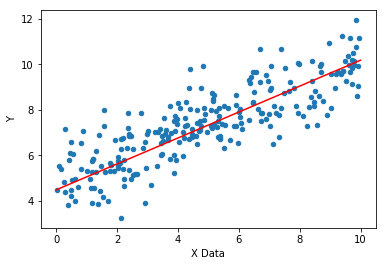

In [85]:
my_data.sample(n=250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(brand_new_data, predictions, "r")